In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1, l2
from keras.regularizers import l1_l2
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

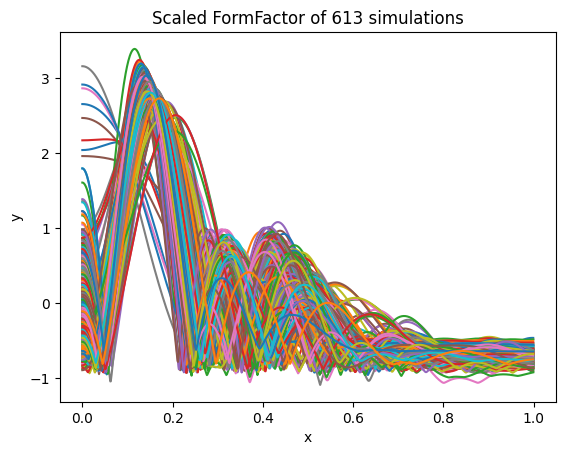

In [16]:
for i in FF_df.columns:
    plt.plot(np.arange(0,1,0.001), FF_df[i])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scaled FormFactor of 613 simulations')
plt.show()

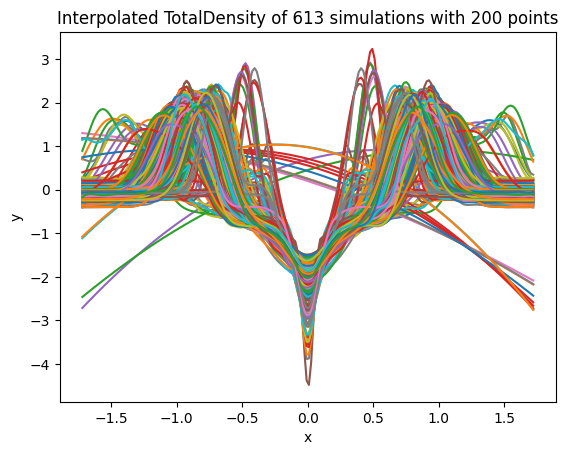

In [6]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 613 simulations with 200 points')
plt.show()

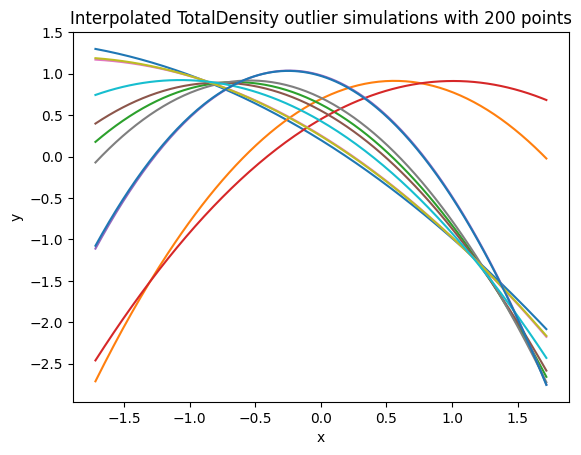

In [3]:
column_indexes = []
index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        column_indexes.append(index)
    index = index + 1
    
for index in column_indexes:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity outlier simulations with 200 points')
plt.show()

In [4]:
FF_df = FF_df.drop(column_indexes, axis=1)
TD_x_df = TD_x_df.drop(column_indexes, axis=1)
TD_y_df = TD_y_df.drop(column_indexes, axis=1)

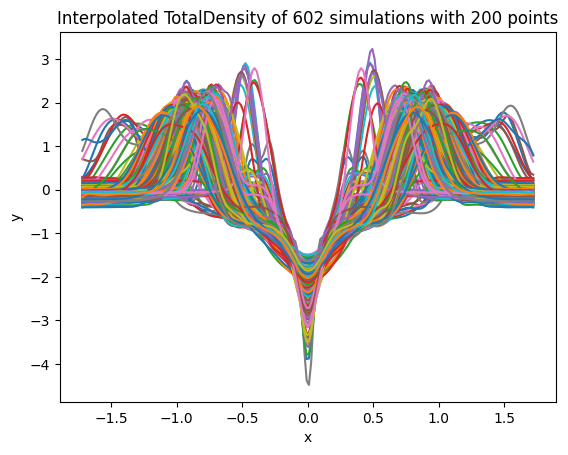

In [5]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 602 simulations with 200 points')
plt.show()

In [13]:
FF_df

0         1         2         3         4         5         6    \
0    0.980720 -0.444256  0.186761 -0.047851 -0.354703 -0.584007 -0.183981   
1    0.980030 -0.444704  0.186284 -0.048252 -0.355220 -0.584411 -0.183635   
2    0.977961 -0.446046  0.184852 -0.049453 -0.356769 -0.585624 -0.182598   
3    0.974512 -0.448282  0.182466 -0.051454 -0.359351 -0.587644 -0.180870   
4    0.969687 -0.451412  0.179127 -0.054255 -0.362964 -0.590472 -0.178453   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.637919 -0.763000 -0.775248 -0.745377 -0.664294 -0.757084 -0.752626   
996 -0.637355 -0.762537 -0.774302 -0.744959 -0.665308 -0.758153 -0.751415   
997 -0.636854 -0.762078 -0.773360 -0.744537 -0.666345 -0.759220 -0.750233   
998 -0.636415 -0.761626 -0.772425 -0.744112 -0.667403 -0.760285 -0.749080   
999 -0.636038 -0.761180 -0.771495 -0.743684 -0.668483 -0.761346 -0.747956   

          7         8         9    ...       603       604       605  \
0   -0.309006 -0.349255  0.267737  ... -0.513892 -0.299718 -0.477219   
1   -0.309460 -0.349860  0.267305  ... -0.514353 -0.299953 -0.477644   
2   -0.310820 -0.351675  0.266009  ... -0.515734 -0.300657 -0.478919   
3   -0.313086 -0.354698  0.263851  ... -0.518037 -0.301829 -0.481043   
4   -0.316257 -0.358928  0.260830  ... -0.521258 -0.303470 -0.484016   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.656961 -0.656225 -0.777161  ... -0.857844 -0.764482 -0.705293   
996 -0.656542 -0.659345 -0.777468  ... -0.857907 -0.765611 -0.704952   
997 -0.656158 -0.662494 -0.777772  ... -0.857928 -0.766756 -0.704615   
998 -0.655810 -0.665672 -0.778070  ... -0.857907 -0.767919 -0.704282   
999 -0.655498 -0.668877 -0.778360  ... -0.857847 -0.769097 -0.703954   

          606       607       608       609       610       611       612  
0    0.087297 -0.142115  0.840006 -0.459976 -0.427894  0.672328 -0.105556  
1    0.086667 -0.142717  0.839384 -0.460461 -0.428323  0.671703 -0.105924  
2    0.084776 -0.144520  0.837520 -0.461915 -0.429612  0.669829 -0.107030  
3    0.081625 -0.147525  0.834413 -0.464338 -0.431758  0.666705 -0.108872  
4    0.077216 -0.151730  0.830066 -0.467729 -0.434762  0.662335 -0.111451  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.861659 -0.689449 -0.738946 -0.677948 -0.761120 -0.640692 -0.750145  
996 -0.862931 -0.690513 -0.738721 -0.677956 -0.760901 -0.640672 -0.749707  
997 -0.864157 -0.691557 -0.738505 -0.678050 -0.760640 -0.640653 -0.749303  
998 -0.865337 -0.692583 -0.738300 -0.678230 -0.760337 -0.640635 -0.748932  
999 -0.866470 -0.693590 -0.738105 -0.678494 -0.759994 -0.640617 -0.748596  

[1000 rows x 602 columns]

In [14]:
TD_x_df

0         1         2         3         4         5         6    \
0   -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098   
1   -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821   
2   -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543   
3   -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266   
4   -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989   
196  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266   
197  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543   
198  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821   
199  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098   

          7         8         9    ...       603       604       605  \
0   -1.719098 -1.719098 -1.719098  ... -1.719098 -1.719098 -1.719098   
1   -1.701821 -1.701821 -1.701821  ... -1.701821 -1.701821 -1.701821   
2   -1.684543 -1.684543 -1.684543  ... -1.684543 -1.684543 -1.684543   
3   -1.667266 -1.667266 -1.667266  ... -1.667266 -1.667266 -1.667266   
4   -1.649989 -1.649989 -1.649989  ... -1.649989 -1.649989 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195  1.649989  1.649989  1.649989  ...  1.649989  1.649989  1.649989   
196  1.667266  1.667266  1.667266  ...  1.667266  1.667266  1.667266   
197  1.684543  1.684543  1.684543  ...  1.684543  1.684543  1.684543   
198  1.701821  1.701821  1.701821  ...  1.701821  1.701821  1.701821   
199  1.719098  1.719098  1.719098  ...  1.719098  1.719098  1.719098   

          606       607       608       609       610       611       612  
0   -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098 -1.719098  
1   -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821 -1.701821  
2   -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543 -1.684543  
3   -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266 -1.667266  
4   -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989 -1.649989  
..        ...       ...       ...       ...       ...       ...       ...  
195  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  1.649989  
196  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  1.667266  
197  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  1.684543  
198  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  1.701821  
199  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  1.719098  

[200 rows x 602 columns]

In [15]:
TD_y_df

0         1         2         3         4         5         6    \
0   -0.292967 -0.043943 -0.158113 -0.101767 -0.074313 -0.015691  0.130820   
1   -0.287719 -0.048955 -0.158903 -0.108930 -0.065830 -0.027563  0.116175   
2   -0.285331 -0.054403 -0.159960 -0.112849 -0.062805 -0.033899  0.110771   
3   -0.284011 -0.057850 -0.160734 -0.114323 -0.062832 -0.036013  0.111254   
4   -0.283050 -0.058699 -0.161087 -0.114178 -0.064223 -0.035278  0.114579   
..        ...       ...       ...       ...       ...       ...       ...   
195 -0.284641 -0.058231 -0.159933 -0.114170 -0.065815 -0.040228  0.110020   
196 -0.285351 -0.056702 -0.158876 -0.114536 -0.064869 -0.039316  0.107380   
197 -0.286225 -0.055992 -0.158280 -0.115670 -0.063731 -0.035067  0.103959   
198 -0.288039 -0.057726 -0.159393 -0.117792 -0.063152 -0.025993  0.099929   
199 -0.292285 -0.064301 -0.164136 -0.121192 -0.064547 -0.010529  0.095253   

          7         8         9    ...       603       604       605  \
0   -0.081422 -0.077652 -0.176547  ... -0.055277 -0.100642 -0.038685   
1   -0.081356 -0.076761 -0.174650  ... -0.045650 -0.097157 -0.037322   
2   -0.082830 -0.074020 -0.173992  ... -0.044475 -0.097230 -0.037047   
3   -0.084084 -0.071692 -0.173963  ... -0.047638 -0.100022 -0.037256   
4   -0.084358 -0.070750 -0.174172  ... -0.051569 -0.104700 -0.037584   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.085534 -0.071605 -0.173548  ... -0.054341 -0.099677 -0.037964   
196 -0.088656 -0.073382 -0.173128  ... -0.051663 -0.095382 -0.038246   
197 -0.089890 -0.076052 -0.173129  ... -0.051372 -0.093211 -0.038337   
198 -0.087382 -0.079193 -0.173866  ... -0.056617 -0.094425 -0.037948   
199 -0.079401 -0.081836 -0.175784  ... -0.072725 -0.100615 -0.036756   

          606       607       608       609       610       611       612  
0   -0.145616 -0.091428 -0.245502 -0.061689 -0.065606 -0.220929 -0.171157  
1   -0.147582 -0.080542 -0.245715 -0.050817 -0.060005 -0.218079 -0.128594  
2   -0.148528 -0.080141 -0.246071 -0.053721 -0.057062 -0.216923 -0.104758  
3   -0.147606 -0.082219 -0.246198 -0.060734 -0.055632 -0.216739 -0.095096  
4   -0.145384 -0.083096 -0.246001 -0.066050 -0.055196 -0.216993 -0.095194  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.144443 -0.080849 -0.246660 -0.048337 -0.057925 -0.217384 -0.111441  
196 -0.143589 -0.076135 -0.246312 -0.048564 -0.064769 -0.216985 -0.107901  
197 -0.142992 -0.073838 -0.246020 -0.052194 -0.069580 -0.216915 -0.105345  
198 -0.144643 -0.080083 -0.246297 -0.061096 -0.068880 -0.217690 -0.105507  
199 -0.152251 -0.103521 -0.248100 -0.078233 -0.059392 -0.220034 -0.110609  

[200 rows x 602 columns]

In [6]:
names = []
for i in TD_x_df.columns:
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in TD_x_df.columns:
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

0x        0y        1x        1y        2x        2y        3x  \
0   -1.719098 -0.292967 -1.719098 -0.043943 -1.719098 -0.158113 -1.719098   
1   -1.701821 -0.287719 -1.701821 -0.048955 -1.701821 -0.158903 -1.701821   
2   -1.684543 -0.285331 -1.684543 -0.054403 -1.684543 -0.159960 -1.684543   
3   -1.667266 -0.284011 -1.667266 -0.057850 -1.667266 -0.160734 -1.667266   
4   -1.649989 -0.283050 -1.649989 -0.058699 -1.649989 -0.161087 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989 -0.284641  1.649989 -0.058231  1.649989 -0.159933  1.649989   
196  1.667266 -0.285351  1.667266 -0.056702  1.667266 -0.158876  1.667266   
197  1.684543 -0.286225  1.684543 -0.055992  1.684543 -0.158280  1.684543   
198  1.701821 -0.288039  1.701821 -0.057726  1.701821 -0.159393  1.701821   
199  1.719098 -0.292285  1.719098 -0.064301  1.719098 -0.164136  1.719098   

           3y        4x        4y  ...      608x      608y      609x  \
0   -0.101767 -1.719098 -0.074313  ... -1.719098 -0.245502 -1.719098   
1   -0.108930 -1.701821 -0.065830  ... -1.701821 -0.245715 -1.701821   
2   -0.112849 -1.684543 -0.062805  ... -1.684543 -0.246071 -1.684543   
3   -0.114323 -1.667266 -0.062832  ... -1.667266 -0.246198 -1.667266   
4   -0.114178 -1.649989 -0.064223  ... -1.649989 -0.246001 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.114170  1.649989 -0.065815  ...  1.649989 -0.246660  1.649989   
196 -0.114536  1.667266 -0.064869  ...  1.667266 -0.246312  1.667266   
197 -0.115670  1.684543 -0.063731  ...  1.684543 -0.246020  1.684543   
198 -0.117792  1.701821 -0.063152  ...  1.701821 -0.246297  1.701821   
199 -0.121192  1.719098 -0.064547  ...  1.719098 -0.248100  1.719098   

         609y      610x      610y      611x      611y      612x      612y  
0   -0.061689 -1.719098 -0.065606 -1.719098 -0.220929 -1.719098 -0.171157  
1   -0.050817 -1.701821 -0.060005 -1.701821 -0.218079 -1.701821 -0.128594  
2   -0.053721 -1.684543 -0.057062 -1.684543 -0.216923 -1.684543 -0.104758  
3   -0.060734 -1.667266 -0.055632 -1.667266 -0.216739 -1.667266 -0.095096  
4   -0.066050 -1.649989 -0.055196 -1.649989 -0.216993 -1.649989 -0.095194  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.048337  1.649989 -0.057925  1.649989 -0.217384  1.649989 -0.111441  
196 -0.048564  1.667266 -0.064769  1.667266 -0.216985  1.667266 -0.107901  
197 -0.052194  1.684543 -0.069580  1.684543 -0.216915  1.684543 -0.105345  
198 -0.061096  1.701821 -0.068880  1.701821 -0.217690  1.701821 -0.105507  
199 -0.078233  1.719098 -0.059392  1.719098 -0.220034  1.719098 -0.110609  

[200 rows x 1204 columns]

In [7]:
input_data = FF_df.iloc[: , :-2]
output_data = TD_df.iloc[: , :-4]

In [8]:
input_data

0         1         2         3         4         5         6    \
0    0.980720 -0.444256  0.186761 -0.047851 -0.354703 -0.584007 -0.183981   
1    0.980030 -0.444704  0.186284 -0.048252 -0.355220 -0.584411 -0.183635   
2    0.977961 -0.446046  0.184852 -0.049453 -0.356769 -0.585624 -0.182598   
3    0.974512 -0.448282  0.182466 -0.051454 -0.359351 -0.587644 -0.180870   
4    0.969687 -0.451412  0.179127 -0.054255 -0.362964 -0.590472 -0.178453   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.637919 -0.763000 -0.775248 -0.745377 -0.664294 -0.757084 -0.752626   
996 -0.637355 -0.762537 -0.774302 -0.744959 -0.665308 -0.758153 -0.751415   
997 -0.636854 -0.762078 -0.773360 -0.744537 -0.666345 -0.759220 -0.750233   
998 -0.636415 -0.761626 -0.772425 -0.744112 -0.667403 -0.760285 -0.749080   
999 -0.636038 -0.761180 -0.771495 -0.743684 -0.668483 -0.761346 -0.747956   

          7         8         9    ...       601       602       603  \
0   -0.309006 -0.349255  0.267737  ... -0.670520 -0.250014 -0.513892   
1   -0.309460 -0.349860  0.267305  ... -0.670950 -0.250566 -0.514353   
2   -0.310820 -0.351675  0.266009  ... -0.672240 -0.252221 -0.515734   
3   -0.313086 -0.354698  0.263851  ... -0.674390 -0.254978 -0.518037   
4   -0.316257 -0.358928  0.260830  ... -0.677398 -0.258837 -0.521258   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.656961 -0.656225 -0.777161  ... -0.743381 -0.669381 -0.857844   
996 -0.656542 -0.659345 -0.777468  ... -0.743575 -0.669735 -0.857907   
997 -0.656158 -0.662494 -0.777772  ... -0.743771 -0.670089 -0.857928   
998 -0.655810 -0.665672 -0.778070  ... -0.743970 -0.670442 -0.857907   
999 -0.655498 -0.668877 -0.778360  ... -0.744172 -0.670794 -0.857847   

          604       605       606       607       608       609       610  
0   -0.299718 -0.477219  0.087297 -0.142115  0.840006 -0.459976 -0.427894  
1   -0.299953 -0.477644  0.086667 -0.142717  0.839384 -0.460461 -0.428323  
2   -0.300657 -0.478919  0.084776 -0.144520  0.837520 -0.461915 -0.429612  
3   -0.301829 -0.481043  0.081625 -0.147525  0.834413 -0.464338 -0.431758  
4   -0.303470 -0.484016  0.077216 -0.151730  0.830066 -0.467729 -0.434762  
..        ...       ...       ...       ...       ...       ...       ...  
995 -0.764482 -0.705293 -0.861659 -0.689449 -0.738946 -0.677948 -0.761120  
996 -0.765611 -0.704952 -0.862931 -0.690513 -0.738721 -0.677956 -0.760901  
997 -0.766756 -0.704615 -0.864157 -0.691557 -0.738505 -0.678050 -0.760640  
998 -0.767919 -0.704282 -0.865337 -0.692583 -0.738300 -0.678230 -0.760337  
999 -0.769097 -0.703954 -0.866470 -0.693590 -0.738105 -0.678494 -0.759994  

[1000 rows x 600 columns]

In [9]:
output_data

0x        0y        1x        1y        2x        2y        3x  \
0   -1.719098 -0.292967 -1.719098 -0.043943 -1.719098 -0.158113 -1.719098   
1   -1.701821 -0.287719 -1.701821 -0.048955 -1.701821 -0.158903 -1.701821   
2   -1.684543 -0.285331 -1.684543 -0.054403 -1.684543 -0.159960 -1.684543   
3   -1.667266 -0.284011 -1.667266 -0.057850 -1.667266 -0.160734 -1.667266   
4   -1.649989 -0.283050 -1.649989 -0.058699 -1.649989 -0.161087 -1.649989   
..        ...       ...       ...       ...       ...       ...       ...   
195  1.649989 -0.284641  1.649989 -0.058231  1.649989 -0.159933  1.649989   
196  1.667266 -0.285351  1.667266 -0.056702  1.667266 -0.158876  1.667266   
197  1.684543 -0.286225  1.684543 -0.055992  1.684543 -0.158280  1.684543   
198  1.701821 -0.288039  1.701821 -0.057726  1.701821 -0.159393  1.701821   
199  1.719098 -0.292285  1.719098 -0.064301  1.719098 -0.164136  1.719098   

           3y        4x        4y  ...      606x      606y      607x  \
0   -0.101767 -1.719098 -0.074313  ... -1.719098 -0.145616 -1.719098   
1   -0.108930 -1.701821 -0.065830  ... -1.701821 -0.147582 -1.701821   
2   -0.112849 -1.684543 -0.062805  ... -1.684543 -0.148528 -1.684543   
3   -0.114323 -1.667266 -0.062832  ... -1.667266 -0.147606 -1.667266   
4   -0.114178 -1.649989 -0.064223  ... -1.649989 -0.145384 -1.649989   
..        ...       ...       ...  ...       ...       ...       ...   
195 -0.114170  1.649989 -0.065815  ...  1.649989 -0.144443  1.649989   
196 -0.114536  1.667266 -0.064869  ...  1.667266 -0.143589  1.667266   
197 -0.115670  1.684543 -0.063731  ...  1.684543 -0.142992  1.684543   
198 -0.117792  1.701821 -0.063152  ...  1.701821 -0.144643  1.701821   
199 -0.121192  1.719098 -0.064547  ...  1.719098 -0.152251  1.719098   

         607y      608x      608y      609x      609y      610x      610y  
0   -0.091428 -1.719098 -0.245502 -1.719098 -0.061689 -1.719098 -0.065606  
1   -0.080542 -1.701821 -0.245715 -1.701821 -0.050817 -1.701821 -0.060005  
2   -0.080141 -1.684543 -0.246071 -1.684543 -0.053721 -1.684543 -0.057062  
3   -0.082219 -1.667266 -0.246198 -1.667266 -0.060734 -1.667266 -0.055632  
4   -0.083096 -1.649989 -0.246001 -1.649989 -0.066050 -1.649989 -0.055196  
..        ...       ...       ...       ...       ...       ...       ...  
195 -0.080849  1.649989 -0.246660  1.649989 -0.048337  1.649989 -0.057925  
196 -0.076135  1.667266 -0.246312  1.667266 -0.048564  1.667266 -0.064769  
197 -0.073838  1.684543 -0.246020  1.684543 -0.052194  1.684543 -0.069580  
198 -0.080083  1.701821 -0.246297  1.701821 -0.061096  1.701821 -0.068880  
199 -0.103521  1.719098 -0.248100  1.719098 -0.078233  1.719098 -0.059392  

[200 rows x 1200 columns]

In [10]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,488)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[119, 27, 286, 255, 233, 147, 109, 569, 94, 442, 34, 32, 100, 228, 243, 527, 29, 585, 208, 603, 439, 230, 469, 289, 6, 168, 601, 356, 587, 164, 225, 351, 604, 99, 398, 104, 375, 360, 275, 47, 480, 560, 132, 396, 84, 306, 378, 201, 74, 49, 238, 301, 85, 596, 108, 576, 582, 474, 381, 171, 388, 371, 219, 278, 76, 180, 607, 172, 483, 397, 281, 229, 339, 60, 239, 600, 330, 419, 279, 70, 221, 329, 222, 521, 414, 479, 151, 276, 605, 131, 390, 292, 280, 139, 391, 305, 224, 588, 304, 209, 190, 117, 73, 265, 257, 561, 395, 26, 450, 59, 81, 328, 558, 525, 583, 529, 312, 534, 202, 200, 493, 244, 572, 133, 288, 501, 5, 495, 377, 61, 357, 463, 531, 393, 141, 402, 335, 179, 536, 155, 227, 566, 237, 1, 481, 458, 376, 516, 261, 399, 96, 264, 57, 455, 327, 157, 440, 334, 464, 318, 106, 499, 196, 460, 86, 539, 407, 522, 0, 313, 170, 543, 9, 471, 509, 422, 162, 127, 31, 128, 295, 42, 46, 382, 253, 37, 555, 277, 401, 67, 68, 344, 248, 608, 88, 140, 487, 317, 494, 113, 444, 503, 552, 361, 107, 373, 581, 510

In [11]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

In [12]:
print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(488, 1000)
(488, 400, 1)
(112, 1000)
(112, 400, 1)


In [15]:
def Loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            
        distance_average_sum = distance_average_sum + distance_sum/length
        index = index + 1
        
    return (distance_average_sum)/len(prediction)

def test_loss(actual,prediction):
    row_length = int(np.shape(actual)[1]/2)
    column_length = int(np.shape(actual)[0])
    
    p_x = np.array(prediction)[:,0:row_length]
    p_y = np.array(prediction)[:,row_length:]
    t_x = np.array(actual)[:,0:row_length]
    t_y = np.array(actual)[:,row_length:]
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = np.sqrt(distance_squared)
    distance_sum = np.sum(distance, axis=1)
    distance_average = np.mean(distance_sum)
    
    return distance_average / column_length
      
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    
    return distance_average / tf.cast(tf.shape(true)[0], tf.float32)

In [112]:
true = [[1,2,3,4,5,6],[1,2,3,4,5,6],[1,2,3,4,5,6]]
pred = [[1,2,5,3,5,5],[1,10,2,4,4,6],[1,1,4,7,5,6]]
print(Loss(true,pred))
print(test_loss(true, pred))
print(custom_loss(tf.constant(true), tf.constant(pred)))

1.9220361917553712
1.922036191755371
tf.Tensor(1.922036, shape=(), dtype=float32)


In [14]:
def test_loss(actual,prediction):
    row_length = int(np.shape(actual)[1]/2)
    column_length = int(np.shape(actual)[0])
    
    p_x = np.array(prediction)[:,0:row_length]
    p_y = np.array(prediction)[:,row_length:]
    t_x = np.array(actual)[:,0:row_length]
    t_y = np.array(actual)[:,row_length:]
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = np.sqrt(distance_squared)
    distance_sum = np.sum(distance, axis=1)
    distance_average = np.mean(distance_sum)
    
    return distance_average / column_length

def plots(actual,prediction):
    random.seed(42)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()
    
def training_loss(true, pred):
    row_length = int(tf.shape(true)[1]/2)
    column_length = int(tf.shape(true)[0])
    
    p_x = tf.cast(pred[:, 0:row_length], tf.float32)
    p_y = tf.cast(pred[:, row_length:], tf.float32)
    t_x = tf.cast(true[:, 0:row_length], tf.float32)
    t_y = tf.cast(true[:, row_length:], tf.float32)
    
    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    
    return distance_average / tf.cast(tf.shape(true)[0], tf.float32)

In [118]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_24 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_25 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_26 (Dense)            (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 2s 208ms/step - loss: 2.8427 - val_loss: 1.9416
Epoch 2/500
7/7 [==============================] - 1s 83ms/step - loss: 2.2668 - v

7/7 [==============================] - 1s 74ms/step - loss: 0.9664 - val_loss: 1.1470
Epoch 157/500
7/7 [==============================] - 0s 72ms/step - loss: 0.9344 - val_loss: 1.2759
Epoch 158/500
7/7 [==============================] - 1s 79ms/step - loss: 0.8597 - val_loss: 1.1655
Epoch 159/500
7/7 [==============================] - 1s 78ms/step - loss: 0.8648 - val_loss: 1.1451
Epoch 160/500
7/7 [==============================] - 1s 75ms/step - loss: 0.8784 - val_loss: 1.1580
Epoch 161/500
7/7 [==============================] - 1s 182ms/step - loss: 0.8974 - val_loss: 1.1703
Epoch 162/500
7/7 [==============================] - 1s 77ms/step - loss: 0.8822 - val_loss: 1.2196
Epoch 163/500
7/7 [==============================] - 0s 73ms/step - loss: 0.9210 - val_loss: 1.1759
Epoch 164/500
7/7 [==============================] - 0s 73ms/step - loss: 0.8448 - val_loss: 1.1129
Epoch 165/500
7/7 [==============================] - 1s 78ms/step - loss: 0.7912 - val_loss: 1.0877
Epoch 166/500

Epoch 238/500
7/7 [==============================] - 1s 74ms/step - loss: 0.8279 - val_loss: 1.1827
Epoch 239/500
7/7 [==============================] - 1s 77ms/step - loss: 0.9308 - val_loss: 1.2739
Epoch 240/500
7/7 [==============================] - 1s 81ms/step - loss: 0.7990 - val_loss: 1.1200
Epoch 241/500
7/7 [==============================] - 1s 181ms/step - loss: 0.7369 - val_loss: 1.0724
Epoch 242/500
7/7 [==============================] - 1s 116ms/step - loss: 0.7595 - val_loss: 1.0933
Epoch 243/500
7/7 [==============================] - 1s 97ms/step - loss: 0.8039 - val_loss: 1.1453
Epoch 244/500
7/7 [==============================] - 1s 74ms/step - loss: 0.7966 - val_loss: 1.1505
Epoch 245/500
7/7 [==============================] - 1s 121ms/step - loss: 0.8062 - val_loss: 1.1904
Epoch 246/500
7/7 [==============================] - 1s 76ms/step - loss: 0.8159 - val_loss: 1.1472
Epoch 247/500
7/7 [==============================] - 1s 74ms/step - loss: 0.8341 - val_loss: 1.20

Epoch 320/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7717 - val_loss: 1.1404
Epoch 321/500
7/7 [==============================] - 1s 169ms/step - loss: 0.8791 - val_loss: 1.2471
Epoch 322/500
7/7 [==============================] - 1s 76ms/step - loss: 0.8635 - val_loss: 1.0867
Epoch 323/500
7/7 [==============================] - 1s 76ms/step - loss: 0.7615 - val_loss: 1.1284
Epoch 324/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7574 - val_loss: 1.1255
Epoch 325/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7888 - val_loss: 1.1055
Epoch 326/500
7/7 [==============================] - 1s 75ms/step - loss: 0.8703 - val_loss: 1.3755
Epoch 327/500
7/7 [==============================] - 1s 80ms/step - loss: 0.8639 - val_loss: 1.1713
Epoch 328/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7286 - val_loss: 1.1163
Epoch 329/500
7/7 [==============================] - 1s 77ms/step - loss: 0.7592 - val_loss: 1.0742

Epoch 402/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7310 - val_loss: 1.0892
Epoch 403/500
7/7 [==============================] - 1s 74ms/step - loss: 0.7615 - val_loss: 1.0932
Epoch 404/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7619 - val_loss: 1.1073
Epoch 405/500
7/7 [==============================] - 1s 77ms/step - loss: 0.7293 - val_loss: 1.0756
Epoch 406/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7326 - val_loss: 1.0974
Epoch 407/500
7/7 [==============================] - 1s 77ms/step - loss: 0.7472 - val_loss: 1.0782
Epoch 408/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7934 - val_loss: 1.1612
Epoch 409/500
7/7 [==============================] - 1s 111ms/step - loss: 0.7472 - val_loss: 1.1084
Epoch 410/500
7/7 [==============================] - 1s 195ms/step - loss: 0.7312 - val_loss: 1.1275
Epoch 411/500
7/7 [==============================] - 1s 167ms/step - loss: 0.7083 - val_loss: 1.07

Epoch 484/500
7/7 [==============================] - 1s 74ms/step - loss: 0.7715 - val_loss: 1.1138
Epoch 485/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7574 - val_loss: 1.0659
Epoch 486/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7631 - val_loss: 1.0463
Epoch 487/500
7/7 [==============================] - 0s 72ms/step - loss: 0.7300 - val_loss: 1.0601
Epoch 488/500
7/7 [==============================] - 1s 75ms/step - loss: 0.8024 - val_loss: 1.1077
Epoch 489/500
7/7 [==============================] - 1s 75ms/step - loss: 0.7956 - val_loss: 1.1913
Epoch 490/500
7/7 [==============================] - 0s 73ms/step - loss: 0.7916 - val_loss: 1.1673
Epoch 491/500
7/7 [==============================] - 1s 175ms/step - loss: 0.7280 - val_loss: 1.1011
Epoch 492/500
7/7 [==============================] - 1s 156ms/step - loss: 0.8393 - val_loss: 1.0887
Epoch 493/500
7/7 [==============================] - 1s 105ms/step - loss: 0.7642 - val_loss: 1.11

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_27 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_28 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_29 (Dense)            (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
7/7 [==============================] - 2s 228ms/step - loss: 2.8735 - val_loss: 2.0450
Epoch 2/1500
7/7 [==============================] - 1s 90ms/step - loss: 2.3157 -

7/7 [==============================] - 1s 76ms/step - loss: 0.7944 - val_loss: 1.1514
Epoch 155/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8757 - val_loss: 1.2883
Epoch 156/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8410 - val_loss: 1.2252
Epoch 157/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8144 - val_loss: 1.1759
Epoch 158/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8593 - val_loss: 1.1860
Epoch 159/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8636 - val_loss: 1.2534
Epoch 160/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8509 - val_loss: 1.1933
Epoch 161/1500
7/7 [==============================] - 1s 185ms/step - loss: 0.8521 - val_loss: 1.1197
Epoch 162/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8328 - val_loss: 1.1164
Epoch 163/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8670 - val_loss: 1.1833
Epoc

7/7 [==============================] - 1s 77ms/step - loss: 0.8714 - val_loss: 1.1114
Epoch 236/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8468 - val_loss: 1.2008
Epoch 237/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8329 - val_loss: 1.1666
Epoch 238/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8007 - val_loss: 1.1372
Epoch 239/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8098 - val_loss: 1.2212
Epoch 240/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8130 - val_loss: 1.1855
Epoch 241/1500
7/7 [==============================] - 1s 183ms/step - loss: 0.8089 - val_loss: 1.1595
Epoch 242/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8392 - val_loss: 1.2043
Epoch 243/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7691 - val_loss: 1.1448
Epoch 244/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7944 - val_loss: 1.1051
Epoc

7/7 [==============================] - 1s 76ms/step - loss: 0.7872 - val_loss: 1.1297
Epoch 317/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8646 - val_loss: 1.2231
Epoch 318/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7592 - val_loss: 1.1236
Epoch 319/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7468 - val_loss: 1.0832
Epoch 320/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7139 - val_loss: 1.0509
Epoch 321/1500
7/7 [==============================] - 1s 170ms/step - loss: 0.7394 - val_loss: 1.1440
Epoch 322/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7996 - val_loss: 1.1270
Epoch 323/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7652 - val_loss: 1.1644
Epoch 324/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8185 - val_loss: 1.1370
Epoch 325/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7922 - val_loss: 1.1558
Epoc

Epoch 478/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8045 - val_loss: 1.1216
Epoch 479/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7912 - val_loss: 1.1273
Epoch 480/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7903 - val_loss: 1.1344
Epoch 481/1500
7/7 [==============================] - 1s 175ms/step - loss: 0.7817 - val_loss: 1.1299
Epoch 482/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7175 - val_loss: 1.1149
Epoch 483/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7200 - val_loss: 1.0682
Epoch 484/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7411 - val_loss: 1.0600
Epoch 485/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6723 - val_loss: 1.0392
Epoch 486/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7300 - val_loss: 1.0968
Epoch 487/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7568 - val_lo

Epoch 559/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7386 - val_loss: 1.1440
Epoch 560/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8905 - val_loss: 1.2099
Epoch 561/1500
7/7 [==============================] - 1s 172ms/step - loss: 0.7568 - val_loss: 1.1192
Epoch 562/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7476 - val_loss: 1.1463
Epoch 563/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7334 - val_loss: 1.1214
Epoch 564/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7357 - val_loss: 1.0709
Epoch 565/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6888 - val_loss: 1.0686
Epoch 566/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7924 - val_loss: 1.1474
Epoch 567/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7697 - val_loss: 1.1658
Epoch 568/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7876 - val_lo

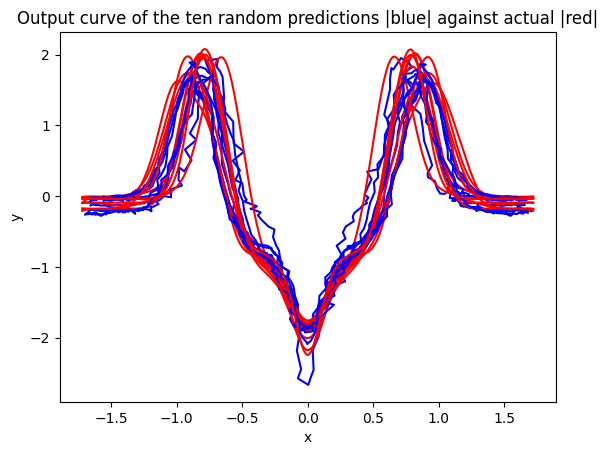

In [119]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

In [120]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=250),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_30 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_31 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_32 (Dense)            (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
7/7 [==============================] - 2s 235ms/step - loss: 2.8325 - val_loss: 2.1101
Epoch 2/1500
7/7 [==============================] - 1s 88ms/step - loss: 2.3278 

7/7 [==============================] - 1s 76ms/step - loss: 0.9380 - val_loss: 1.3446
Epoch 155/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8837 - val_loss: 1.1667
Epoch 156/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.8473 - val_loss: 1.1063
Epoch 157/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8799 - val_loss: 1.1429
Epoch 158/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8810 - val_loss: 1.2373
Epoch 159/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.9309 - val_loss: 1.2900
Epoch 160/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.9139 - val_loss: 1.2919
Epoch 161/1500
7/7 [==============================] - 2s 372ms/step - loss: 0.8376 - val_loss: 1.1472
Epoch 162/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8928 - val_loss: 1.1602
Epoch 163/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8769 - val_loss: 1.1684
Epoc

Epoch 235/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7784 - val_loss: 1.1317
Epoch 236/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7804 - val_loss: 1.1506
Epoch 237/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7819 - val_loss: 1.1037
Epoch 238/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7583 - val_loss: 1.1178
Epoch 239/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8275 - val_loss: 1.1331
Epoch 240/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.8723 - val_loss: 1.3386
Epoch 241/1500
7/7 [==============================] - 1s 179ms/step - loss: 0.7905 - val_loss: 1.0995
Epoch 242/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7799 - val_loss: 1.0844
Epoch 243/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.8085 - val_loss: 1.1179
Epoch 244/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7493 - val_lo

Epoch 316/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8066 - val_loss: 1.1075
Epoch 317/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7581 - val_loss: 1.0739
Epoch 318/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7481 - val_loss: 1.1131
Epoch 319/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7898 - val_loss: 1.0960
Epoch 320/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8415 - val_loss: 1.1304
Epoch 321/1500
7/7 [==============================] - 1s 173ms/step - loss: 0.8039 - val_loss: 1.1757
Epoch 322/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.8096 - val_loss: 1.1472
Epoch 323/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7823 - val_loss: 1.1564
Epoch 324/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.7661 - val_loss: 1.1487
Epoch 325/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.7606 - val_lo

Epoch 397/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6879 - val_loss: 1.0617
Epoch 398/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7489 - val_loss: 1.1339
Epoch 399/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7469 - val_loss: 1.1290
Epoch 400/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7884 - val_loss: 1.1875
Epoch 401/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.7379 - val_loss: 1.0638
Epoch 402/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7143 - val_loss: 1.0925
Epoch 403/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7425 - val_loss: 1.1334
Epoch 404/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.8047 - val_loss: 1.1863
Epoch 405/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7469 - val_loss: 1.0986
Epoch 406/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7077 - val_lo

Epoch 478/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7044 - val_loss: 1.1019
Epoch 479/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.7867 - val_loss: 1.1176
Epoch 480/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8095 - val_loss: 1.1835
Epoch 481/1500
7/7 [==============================] - 1s 213ms/step - loss: 0.7665 - val_loss: 1.1031
Epoch 482/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7226 - val_loss: 1.0721
Epoch 483/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7049 - val_loss: 1.0534
Epoch 484/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7024 - val_loss: 1.0413
Epoch 485/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6913 - val_loss: 1.0507
Epoch 486/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7388 - val_loss: 1.1464
Epoch 487/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.7806 - val_lo

7/7 [==============================] - 1s 74ms/step - loss: 0.7306 - val_loss: 1.0927
Epoch 560/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6625 - val_loss: 1.0321
Epoch 561/1500
7/7 [==============================] - 1s 183ms/step - loss: 0.6966 - val_loss: 1.0604
Epoch 562/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7399 - val_loss: 1.1288
Epoch 563/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7695 - val_loss: 1.0958
Epoch 564/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.7052 - val_loss: 1.0799
Epoch 565/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.7452 - val_loss: 1.1051
Epoch 566/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7462 - val_loss: 1.1162
Epoch 567/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.6991 - val_loss: 1.0717
Epoch 568/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7157 - val_loss: 1.0935
Epoc

7/7 [==============================] - 3s 486ms/step - loss: 0.7435 - val_loss: 1.0892
Epoch 641/1500
7/7 [==============================] - 3s 472ms/step - loss: 0.6947 - val_loss: 1.0861
Epoch 642/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7305 - val_loss: 1.0462
Epoch 643/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7287 - val_loss: 1.0750
Epoch 644/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7226 - val_loss: 1.0692
Epoch 645/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.6982 - val_loss: 1.0776
Epoch 646/1500
7/7 [==============================] - 1s 127ms/step - loss: 0.6777 - val_loss: 1.0861
Epoch 647/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6719 - val_loss: 1.0957
Epoch 648/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.7085 - val_loss: 1.0684
Epoch 649/1500
7/7 [==============================] - 2s 389ms/step - loss: 0.7101 - val_loss: 1.0748


7/7 [==============================] - 1s 179ms/step - loss: 0.7360 - val_loss: 1.0569
Epoch 722/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6959 - val_loss: 1.0362
Epoch 723/1500
7/7 [==============================] - 0s 71ms/step - loss: 0.6436 - val_loss: 1.0181
Epoch 724/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6736 - val_loss: 1.0700
Epoch 725/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7410 - val_loss: 1.1557
Epoch 726/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6755 - val_loss: 1.0573
Epoch 727/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6681 - val_loss: 1.0341
Epoch 728/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6571 - val_loss: 1.0232
Epoch 729/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.7412 - val_loss: 1.0905
Epoch 730/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6734 - val_loss: 1.0407
Epoc

Epoch 802/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6882 - val_loss: 1.0861
Epoch 803/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6644 - val_loss: 1.1141
Epoch 804/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6871 - val_loss: 1.0576
Epoch 805/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6740 - val_loss: 1.0408
Epoch 806/1500
7/7 [==============================] - 1s 115ms/step - loss: 0.7044 - val_loss: 1.0591
Epoch 807/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7238 - val_loss: 1.0967
Epoch 808/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7006 - val_loss: 1.1085
Epoch 809/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.6940 - val_loss: 1.0878
Epoch 810/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6835 - val_loss: 1.0755
Epoch 811/1500
7/7 [==============================] - 1s 174ms/step - loss: 0.6810 - val_l

Epoch 883/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6720 - val_loss: 1.0713
Epoch 884/1500
7/7 [==============================] - 2s 268ms/step - loss: 0.6972 - val_loss: 1.0827
Epoch 885/1500
7/7 [==============================] - 3s 503ms/step - loss: 0.7221 - val_loss: 1.0464
Epoch 886/1500
7/7 [==============================] - 1s 105ms/step - loss: 0.6564 - val_loss: 1.0280
Epoch 887/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6755 - val_loss: 1.0639
Epoch 888/1500
7/7 [==============================] - 3s 488ms/step - loss: 0.6690 - val_loss: 1.0513
Epoch 889/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7026 - val_loss: 1.0604
Epoch 890/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.6790 - val_loss: 1.0374
Epoch 891/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.6998 - val_loss: 1.0320
Epoch 892/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.7114 - va

Epoch 964/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6121 - val_loss: 1.0387
Epoch 965/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6413 - val_loss: 1.0331
Epoch 966/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7451 - val_loss: 1.1431
Epoch 967/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6916 - val_loss: 1.0421
Epoch 968/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6917 - val_loss: 1.0280
Epoch 969/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6453 - val_loss: 1.0089
Epoch 970/1500
7/7 [==============================] - 1s 112ms/step - loss: 0.6948 - val_loss: 1.0243
Epoch 971/1500
7/7 [==============================] - 2s 296ms/step - loss: 0.6248 - val_loss: 1.0228
Epoch 972/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6597 - val_loss: 1.0936
Epoch 973/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.7026 - val_l

7/7 [==============================] - 1s 75ms/step - loss: 0.6891 - val_loss: 1.0569
Epoch 1125/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6776 - val_loss: 1.0340
Epoch 1126/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6562 - val_loss: 1.0546
Epoch 1127/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.7225 - val_loss: 1.1137
Epoch 1128/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6991 - val_loss: 1.0724
Epoch 1129/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.6786 - val_loss: 1.0833
Epoch 1130/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.7305 - val_loss: 1.0597
Epoch 1131/1500
7/7 [==============================] - 1s 180ms/step - loss: 0.6811 - val_loss: 1.0246
Epoch 1132/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6907 - val_loss: 1.0252
Epoch 1133/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6602 - val_loss: 1.

7/7 [==============================] - 1s 74ms/step - loss: 0.6577 - val_loss: 1.0652
Epoch 1285/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6595 - val_loss: 1.0505
Epoch 1286/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6568 - val_loss: 1.0217
Epoch 1287/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.5917 - val_loss: 1.0048
Epoch 1288/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6574 - val_loss: 1.0284
Epoch 1289/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6252 - val_loss: 1.0144
Epoch 1290/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.6489 - val_loss: 1.0153
Epoch 1291/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.6571 - val_loss: 1.0405
Epoch 1292/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6681 - val_loss: 1.0539
Epoch 1293/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6776 - val_loss: 1.

7/7 [==============================] - 0s 73ms/step - loss: 0.6215 - val_loss: 1.0099
Epoch 1445/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6007 - val_loss: 1.0053
Epoch 1446/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.6451 - val_loss: 1.0311
Epoch 1447/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6894 - val_loss: 1.0372
Epoch 1448/1500
7/7 [==============================] - 1s 73ms/step - loss: 0.6392 - val_loss: 1.0144
Epoch 1449/1500
7/7 [==============================] - 0s 72ms/step - loss: 0.6129 - val_loss: 1.0026
Epoch 1450/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.6428 - val_loss: 1.0027
Epoch 1451/1500
7/7 [==============================] - 1s 169ms/step - loss: 0.6255 - val_loss: 1.0121
Epoch 1452/1500
7/7 [==============================] - 0s 73ms/step - loss: 0.6440 - val_loss: 1.0373
Epoch 1453/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.6238 - val_loss: 1.

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_33 (Dense)            (None, 3000)              3003000   
                                                                 
 dense_34 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_35 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_36 (Dense)            (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
7/7 [============================

7/7 [==============================] - 3s 431ms/step - loss: 0.9339 - val_loss: 1.3019
Epoch 152/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.9487 - val_loss: 1.2252
Epoch 153/1500
7/7 [==============================] - 1s 152ms/step - loss: 1.0120 - val_loss: 1.3417
Epoch 154/1500
7/7 [==============================] - 1s 154ms/step - loss: 0.9329 - val_loss: 1.2388
Epoch 155/1500
7/7 [==============================] - 1s 155ms/step - loss: 0.8679 - val_loss: 1.2005
Epoch 156/1500
7/7 [==============================] - 1s 154ms/step - loss: 0.8846 - val_loss: 1.1674
Epoch 157/1500
7/7 [==============================] - 1s 157ms/step - loss: 0.9623 - val_loss: 1.2054
Epoch 158/1500
7/7 [==============================] - 1s 158ms/step - loss: 0.9643 - val_loss: 1.2395
Epoch 159/1500
7/7 [==============================] - 1s 155ms/step - loss: 1.0046 - val_loss: 1.3582
Epoch 160/1500
7/7 [==============================] - 1s 155ms/step - loss: 0.9534 - val_loss: 1.

7/7 [==============================] - 3s 465ms/step - loss: 0.8475 - val_loss: 1.1442
Epoch 312/1500
7/7 [==============================] - 2s 239ms/step - loss: 0.8878 - val_loss: 1.2023
Epoch 313/1500
7/7 [==============================] - 1s 163ms/step - loss: 0.8531 - val_loss: 1.2143
Epoch 314/1500
7/7 [==============================] - 1s 153ms/step - loss: 0.8766 - val_loss: 1.2359
Epoch 315/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.9020 - val_loss: 1.1954
Epoch 316/1500
7/7 [==============================] - 1s 205ms/step - loss: 0.8543 - val_loss: 1.2191
Epoch 317/1500
7/7 [==============================] - 1s 148ms/step - loss: 0.8828 - val_loss: 1.1924
Epoch 318/1500
7/7 [==============================] - 1s 152ms/step - loss: 0.8000 - val_loss: 1.1844
Epoch 319/1500
7/7 [==============================] - 1s 188ms/step - loss: 0.8242 - val_loss: 1.1271
Epoch 320/1500
7/7 [==============================] - 1s 162ms/step - loss: 0.8490 - val_loss: 1.

7/7 [==============================] - 3s 436ms/step - loss: 0.7303 - val_loss: 1.0898
Epoch 472/1500
7/7 [==============================] - 1s 172ms/step - loss: 0.8158 - val_loss: 1.1743
Epoch 473/1500
7/7 [==============================] - 1s 153ms/step - loss: 0.8828 - val_loss: 1.1512
Epoch 474/1500
7/7 [==============================] - 1s 153ms/step - loss: 0.8673 - val_loss: 1.2460
Epoch 475/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.8215 - val_loss: 1.1701
Epoch 476/1500
7/7 [==============================] - 1s 152ms/step - loss: 0.7907 - val_loss: 1.1333
Epoch 477/1500
7/7 [==============================] - 1s 154ms/step - loss: 0.7896 - val_loss: 1.1044
Epoch 478/1500
7/7 [==============================] - 1s 151ms/step - loss: 0.7613 - val_loss: 1.1091
Epoch 479/1500
7/7 [==============================] - 1s 157ms/step - loss: 0.7369 - val_loss: 1.0984
Epoch 480/1500
7/7 [==============================] - 1s 157ms/step - loss: 0.7276 - val_loss: 1.

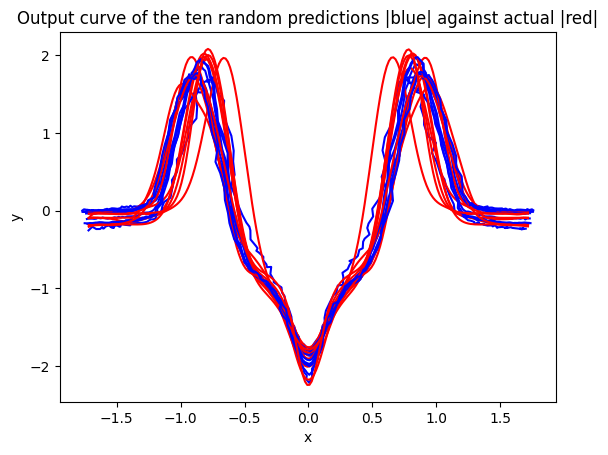

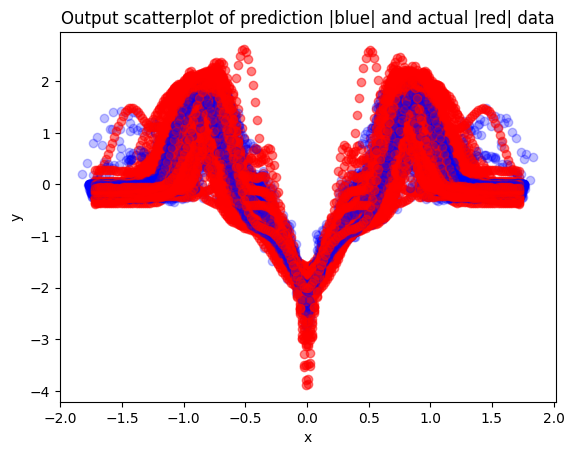

In [121]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

In [122]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_37 (Dense)            (None, 3000)              3003000   
                                                                 
 dense_38 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_39 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_40 (Dense)            (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [=============================

Epoch 72/200
7/7 [==============================] - 1s 217ms/step - loss: 2.3318 - val_loss: 2.5484
Epoch 73/200
7/7 [==============================] - 1s 219ms/step - loss: 2.3479 - val_loss: 2.6071
Epoch 74/200
7/7 [==============================] - 2s 214ms/step - loss: 2.2925 - val_loss: 2.5064
Epoch 75/200
7/7 [==============================] - 1s 209ms/step - loss: 2.2962 - val_loss: 2.5719
Epoch 76/200
7/7 [==============================] - 1s 204ms/step - loss: 2.3131 - val_loss: 2.5135
Epoch 77/200
7/7 [==============================] - 2s 367ms/step - loss: 2.3563 - val_loss: 2.6665
Epoch 78/200
7/7 [==============================] - 1s 218ms/step - loss: 2.3120 - val_loss: 2.5070
Epoch 79/200
7/7 [==============================] - 1s 204ms/step - loss: 2.2682 - val_loss: 2.5285
Epoch 80/200
7/7 [==============================] - 1s 204ms/step - loss: 2.3282 - val_loss: 2.5848
Epoch 81/200
7/7 [==============================] - 3s 473ms/step - loss: 2.2397 - val_loss: 2.5121


In [123]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.0001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.0001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_41 (Dense)            (None, 3000)              3003000   
                                                                 
 dense_42 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_43 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_44 (Dense)            (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [=============================

7/7 [==============================] - 1s 182ms/step - loss: 1.7126 - val_loss: 2.0889
Epoch 73/200
7/7 [==============================] - 1s 210ms/step - loss: 1.6296 - val_loss: 1.8560
Epoch 74/200
7/7 [==============================] - 1s 203ms/step - loss: 1.5690 - val_loss: 1.8973
Epoch 75/200
7/7 [==============================] - 1s 202ms/step - loss: 1.6464 - val_loss: 1.8959
Epoch 76/200
7/7 [==============================] - 1s 194ms/step - loss: 1.6041 - val_loss: 1.9492
Epoch 77/200
7/7 [==============================] - 2s 231ms/step - loss: 1.6092 - val_loss: 1.8907
Epoch 78/200
7/7 [==============================] - 2s 272ms/step - loss: 1.5071 - val_loss: 1.8223
Epoch 79/200
7/7 [==============================] - 1s 214ms/step - loss: 1.5087 - val_loss: 1.7603
Epoch 80/200
7/7 [==============================] - 1s 198ms/step - loss: 1.6174 - val_loss: 1.9412
Epoch 81/200
7/7 [==============================] - 3s 492ms/step - loss: 1.5082 - val_loss: 1.8243
Epoch 82/200


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 3000)              3003000   
                                                                 
 dense_1 (Dense)             (None, 2000)              6002000   
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] 

7/7 [==============================] - 1s 204ms/step - loss: 3.7794 - val_loss: 3.5138
Epoch 73/200
7/7 [==============================] - 1s 220ms/step - loss: 3.8583 - val_loss: 2.8945
Epoch 74/200
7/7 [==============================] - 1s 220ms/step - loss: 2.9813 - val_loss: 2.7265
Epoch 75/200
7/7 [==============================] - 1s 202ms/step - loss: 2.4388 - val_loss: 2.7973
Epoch 76/200
7/7 [==============================] - 2s 221ms/step - loss: 2.8164 - val_loss: 2.7277
Epoch 77/200
7/7 [==============================] - 2s 222ms/step - loss: 2.4917 - val_loss: 2.7591
Epoch 78/200
7/7 [==============================] - 2s 222ms/step - loss: 2.7087 - val_loss: 2.7880
Epoch 79/200
7/7 [==============================] - 1s 219ms/step - loss: 2.9816 - val_loss: 2.8871
Epoch 80/200
7/7 [==============================] - 1s 220ms/step - loss: 2.9581 - val_loss: 2.6095
Epoch 81/200
7/7 [==============================] - 4s 642ms/step - loss: 2.2356 - val_loss: 2.5538
Epoch 82/200


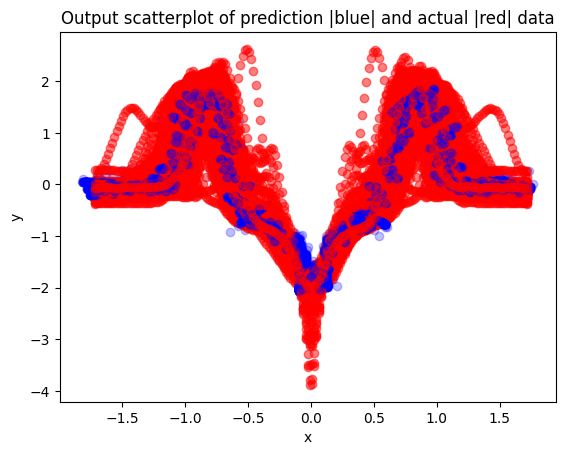

In [12]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu", kernel_regularizer=l1(0.0001))(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.0001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.0001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_4 (Dense)             (None, 3000)              3003000   
                                                                 
 dense_5 (Dense)             (None, 2000)              6002000   
                                                                 
 dense_6 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_7 (Dense)             (None, 400)               400400    
                                                                 
Total params: 11,406,400
Trainable params: 11,406,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================

7/7 [==============================] - 1s 214ms/step - loss: 1.2426 - val_loss: 1.5418
Epoch 154/200
7/7 [==============================] - 2s 224ms/step - loss: 1.1867 - val_loss: 1.5053
Epoch 155/200
7/7 [==============================] - 1s 218ms/step - loss: 1.3068 - val_loss: 1.6219
Epoch 156/200
7/7 [==============================] - 2s 229ms/step - loss: 1.6877 - val_loss: 1.9544
Epoch 157/200
7/7 [==============================] - 1s 218ms/step - loss: 1.4958 - val_loss: 1.6539
Epoch 158/200
7/7 [==============================] - 2s 225ms/step - loss: 1.4663 - val_loss: 1.6549
Epoch 159/200
7/7 [==============================] - 1s 204ms/step - loss: 1.5221 - val_loss: 1.5270
Epoch 160/200
7/7 [==============================] - 2s 224ms/step - loss: 1.6541 - val_loss: 1.8786
Epoch 161/200
7/7 [==============================] - 3s 495ms/step - loss: 1.4770 - val_loss: 1.5987
Epoch 162/200
7/7 [==============================] - 1s 217ms/step - loss: 1.5297 - val_loss: 2.0135
Epoc

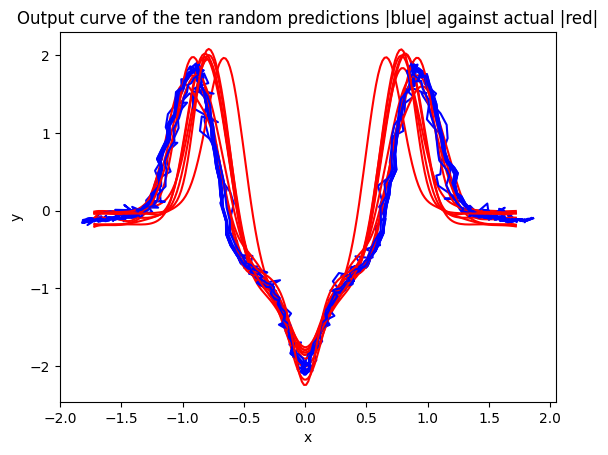

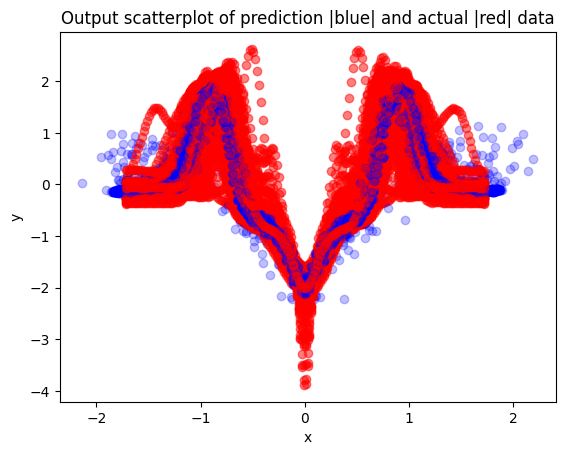

In [13]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu", kernel_regularizer=l1(0.00001))(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.00001))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.00001))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

In [14]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(3000, activation="relu")(inputs)
x = layers.Dropout(0.2, seed=42)(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dropout(0.2, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.2, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_8 (Dense)             (None, 3000)              3003000   
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_9 (Dense)             (None, 2000)              6002000   
                                                                 
 dropout_1 (Dropout)         (None, 2000)              0         
                                                                 
 dense_10 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0   

7/7 [==============================] - 1s 156ms/step - loss: 1.0624 - val_loss: 1.3074
Epoch 150/200
7/7 [==============================] - 1s 154ms/step - loss: 0.9799 - val_loss: 1.3681
Epoch 151/200
7/7 [==============================] - 3s 434ms/step - loss: 1.0493 - val_loss: 1.3882
Epoch 152/200
7/7 [==============================] - 1s 156ms/step - loss: 0.9815 - val_loss: 1.2690
Epoch 153/200
7/7 [==============================] - 1s 158ms/step - loss: 1.0386 - val_loss: 1.3326
Epoch 154/200
7/7 [==============================] - 1s 155ms/step - loss: 1.0898 - val_loss: 1.5739
Epoch 155/200
7/7 [==============================] - 1s 204ms/step - loss: 1.0723 - val_loss: 1.3167
Epoch 156/200
7/7 [==============================] - 2s 326ms/step - loss: 1.0452 - val_loss: 1.4972
Epoch 157/200
7/7 [==============================] - 1s 153ms/step - loss: 1.1005 - val_loss: 1.2564
Epoch 158/200
7/7 [==============================] - 1s 155ms/step - loss: 1.0387 - val_loss: 1.4688
Epoc

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_12 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_3 (Dropout)         (None, 2000)              0         
                                                                 
 dense_13 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0   

Epoch 69/200
7/7 [==============================] - 1s 79ms/step - loss: 1.5742 - val_loss: 2.2765
Epoch 70/200
7/7 [==============================] - 1s 79ms/step - loss: 1.4857 - val_loss: 1.3945
Epoch 71/200
7/7 [==============================] - 1s 183ms/step - loss: 1.4347 - val_loss: 1.3125
Epoch 72/200
7/7 [==============================] - 1s 79ms/step - loss: 1.4892 - val_loss: 2.2594
Epoch 73/200
7/7 [==============================] - 1s 82ms/step - loss: 1.3956 - val_loss: 1.2993
Epoch 74/200
7/7 [==============================] - 1s 80ms/step - loss: 1.1457 - val_loss: 1.4204
Epoch 75/200
7/7 [==============================] - 1s 80ms/step - loss: 1.2455 - val_loss: 1.6917
Epoch 76/200
7/7 [==============================] - 1s 80ms/step - loss: 1.2163 - val_loss: 1.2291
Epoch 77/200
7/7 [==============================] - 1s 76ms/step - loss: 1.1748 - val_loss: 1.5270
Epoch 78/200
7/7 [==============================] - 1s 80ms/step - loss: 1.1640 - val_loss: 1.3376
Epoch 79/

7/7 [==============================] - 1s 188ms/step - loss: 1.1136 - val_loss: 1.3585
Epoch 152/200
7/7 [==============================] - 1s 79ms/step - loss: 1.0585 - val_loss: 1.3298
Epoch 153/200
7/7 [==============================] - 1s 82ms/step - loss: 1.0946 - val_loss: 1.2046
Epoch 154/200
7/7 [==============================] - 1s 76ms/step - loss: 1.0115 - val_loss: 1.3176
Epoch 155/200
7/7 [==============================] - 1s 80ms/step - loss: 1.1225 - val_loss: 1.2531
Epoch 156/200
7/7 [==============================] - 1s 81ms/step - loss: 1.3482 - val_loss: 2.1138
Epoch 157/200
7/7 [==============================] - 1s 78ms/step - loss: 1.2814 - val_loss: 1.2485
Epoch 158/200
7/7 [==============================] - 1s 79ms/step - loss: 1.1088 - val_loss: 1.2209
Epoch 159/200
7/7 [==============================] - 1s 79ms/step - loss: 1.0986 - val_loss: 1.4753
Epoch 160/200
7/7 [==============================] - 1s 80ms/step - loss: 1.0568 - val_loss: 1.2235
Epoch 161/200

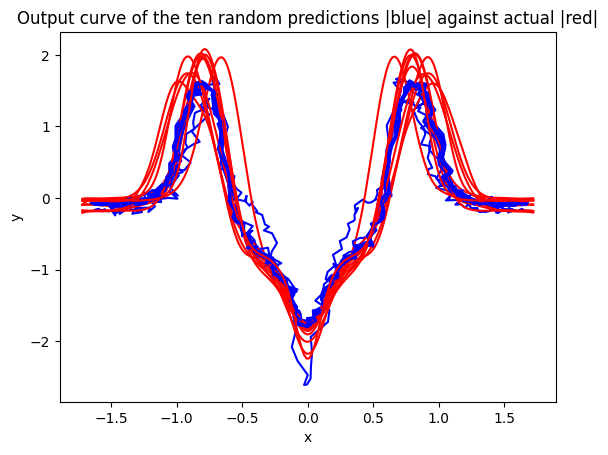

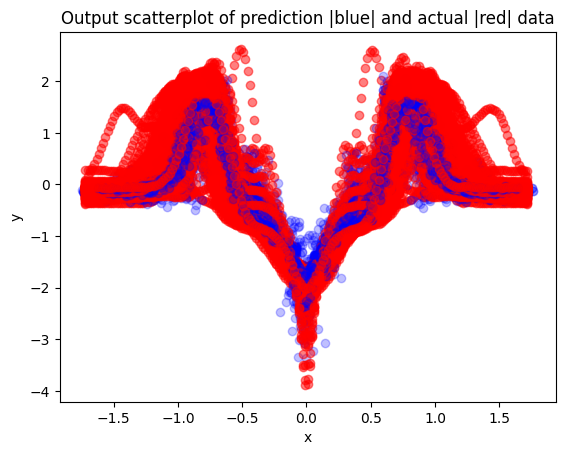

In [15]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=200, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_16 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0         
                                                                 
 dense_17 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_18 (Dense)            (None, 500)               500500    
                                                                 
 dropout_8 (Dropout)         (None, 500)               0   

7/7 [==============================] - 1s 126ms/step - loss: 1.6147 - val_loss: 1.3872
Epoch 69/1500
7/7 [==============================] - 1s 88ms/step - loss: 1.5956 - val_loss: 1.3104
Epoch 70/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.2813 - val_loss: 1.3788
Epoch 71/1500
7/7 [==============================] - 1s 190ms/step - loss: 1.2311 - val_loss: 1.3891
Epoch 72/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.2500 - val_loss: 1.4395
Epoch 73/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.2710 - val_loss: 1.5460
Epoch 74/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.2363 - val_loss: 1.4489
Epoch 75/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.1567 - val_loss: 1.3140
Epoch 76/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.1643 - val_loss: 1.4828
Epoch 77/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.0980 - val_loss: 1.2578
Epoch 78/150

7/7 [==============================] - 1s 93ms/step - loss: 1.1226 - val_loss: 1.1602
Epoch 231/1500
7/7 [==============================] - 2s 241ms/step - loss: 1.1140 - val_loss: 1.6607
Epoch 232/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.2053 - val_loss: 1.3938
Epoch 233/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.1003 - val_loss: 1.1850
Epoch 234/1500
7/7 [==============================] - 1s 92ms/step - loss: 1.0063 - val_loss: 1.3429
Epoch 235/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.9976 - val_loss: 1.1480
Epoch 236/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9894 - val_loss: 1.2791
Epoch 237/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0141 - val_loss: 1.1519
Epoch 238/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9641 - val_loss: 1.2876
Epoch 239/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9260 - val_loss: 1.2472
Epoc

7/7 [==============================] - 1s 78ms/step - loss: 0.8744 - val_loss: 1.1872
Epoch 393/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9117 - val_loss: 1.1355
Epoch 394/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.8338 - val_loss: 1.1072
Epoch 395/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8934 - val_loss: 1.1255
Epoch 396/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9390 - val_loss: 1.1183
Epoch 397/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8662 - val_loss: 1.1165
Epoch 398/1500
7/7 [==============================] - 1s 99ms/step - loss: 0.8689 - val_loss: 1.1229
Epoch 399/1500
7/7 [==============================] - 1s 99ms/step - loss: 0.8585 - val_loss: 1.1512
Epoch 400/1500
7/7 [==============================] - 1s 92ms/step - loss: 0.8714 - val_loss: 1.1645
Epoch 401/1500
7/7 [==============================] - 2s 252ms/step - loss: 0.8540 - val_loss: 1.1584
Epoc

7/7 [==============================] - 1s 80ms/step - loss: 0.8287 - val_loss: 1.1342
Epoch 555/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8121 - val_loss: 1.1383
Epoch 556/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8192 - val_loss: 1.1385
Epoch 557/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8272 - val_loss: 1.1331
Epoch 558/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8742 - val_loss: 1.1209
Epoch 559/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8394 - val_loss: 1.1229
Epoch 560/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9089 - val_loss: 1.1393
Epoch 561/1500
7/7 [==============================] - 1s 191ms/step - loss: 0.8870 - val_loss: 1.1333
Epoch 562/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8148 - val_loss: 1.1364
Epoch 563/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.8274 - val_loss: 1.1511
Epoc

7/7 [==============================] - 1s 92ms/step - loss: 0.8923 - val_loss: 1.1170
Epoch 636/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8952 - val_loss: 1.1325
Epoch 637/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8353 - val_loss: 1.1372
Epoch 638/1500
7/7 [==============================] - 4s 575ms/step - loss: 0.7977 - val_loss: 1.1336
Epoch 639/1500
7/7 [==============================] - 2s 377ms/step - loss: 0.8067 - val_loss: 1.1149
Epoch 640/1500
7/7 [==============================] - 2s 381ms/step - loss: 0.8115 - val_loss: 1.1039
Epoch 641/1500
7/7 [==============================] - 4s 657ms/step - loss: 0.8093 - val_loss: 1.1124
Epoch 642/1500
7/7 [==============================] - 4s 613ms/step - loss: 0.8160 - val_loss: 1.0802
Epoch 643/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8609 - val_loss: 1.1051
Epoch 644/1500
7/7 [==============================] - 3s 441ms/step - loss: 0.8797 - val_loss: 1.1236

Epoch 716/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8296 - val_loss: 1.1083
Epoch 717/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7692 - val_loss: 1.0863
Epoch 718/1500
7/7 [==============================] - 1s 118ms/step - loss: 0.7919 - val_loss: 1.0960
Epoch 719/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7807 - val_loss: 1.0946
Epoch 720/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.7709 - val_loss: 1.0924
Epoch 721/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.8588 - val_loss: 1.0955
Epoch 722/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8022 - val_loss: 1.0948
Epoch 723/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8080 - val_loss: 1.0846
Epoch 724/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.8138 - val_loss: 1.0895
Epoch 725/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8471 - val_l

7/7 [==============================] - 1s 80ms/step - loss: 0.8438 - val_loss: 1.1304
Epoch 798/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7990 - val_loss: 1.0860
Epoch 799/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8645 - val_loss: 1.1325
Epoch 800/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8458 - val_loss: 1.1295
Epoch 801/1500
7/7 [==============================] - 1s 188ms/step - loss: 0.9201 - val_loss: 1.1523
Epoch 802/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8470 - val_loss: 1.1316
Epoch 803/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8656 - val_loss: 1.1314
Epoch 804/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8206 - val_loss: 1.1274
Epoch 805/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8123 - val_loss: 1.1014
Epoch 806/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8557 - val_loss: 1.0919
Epoc

7/7 [==============================] - 1s 82ms/step - loss: 0.7862 - val_loss: 1.0577
Epoch 960/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7684 - val_loss: 1.0935
Epoch 961/1500
7/7 [==============================] - 1s 177ms/step - loss: 0.7768 - val_loss: 1.1041
Epoch 962/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7583 - val_loss: 1.1016
Epoch 963/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7978 - val_loss: 1.0988
Epoch 964/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7932 - val_loss: 1.0870
Epoch 965/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7786 - val_loss: 1.1114
Epoch 966/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8232 - val_loss: 1.1010
Epoch 967/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8277 - val_loss: 1.1102
Epoch 968/1500
7/7 [==============================] - 2s 267ms/step - loss: 0.8162 - val_loss: 1.0736
Epo

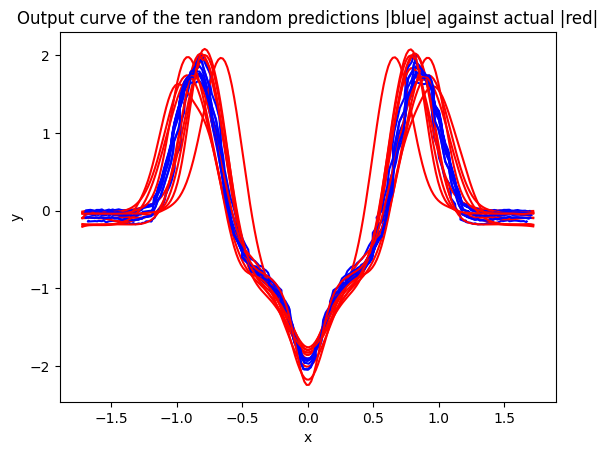

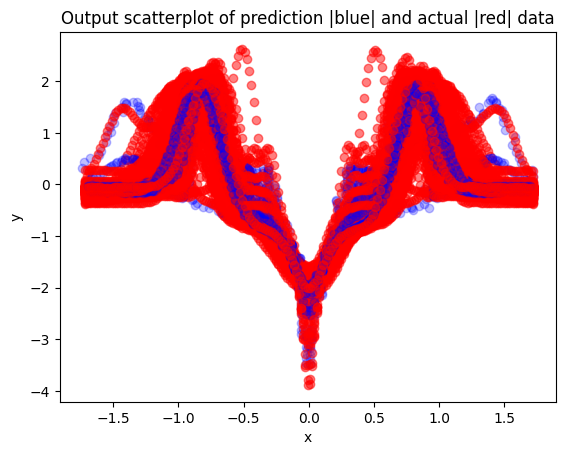

In [16]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 7ms/step


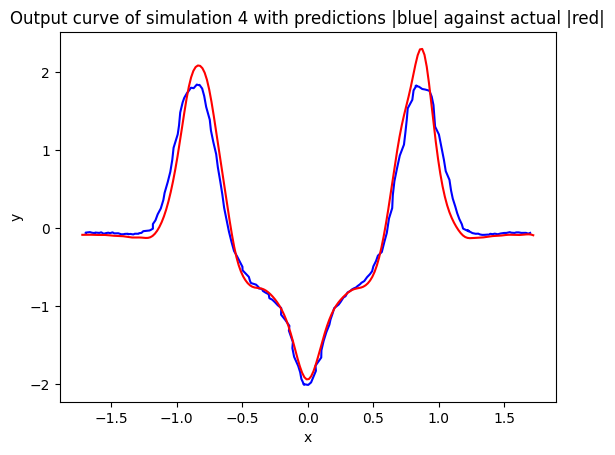

In [42]:
number = 4
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_22 (Dense)            (None, 2000)              2002000   
                                                                 
 batch_normalization_2 (Batc  (None, 2000)             8000      
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 2000)              0         
                                                                 
 dense_23 (Dense)            (None, 1000)              2001000   
                                                                 
 batch_normalization_3 (Batc  (None, 1000)             4000      
 hNormalization)                                           

7/7 [==============================] - 1s 106ms/step - loss: 1.7742 - val_loss: 1.8400
Epoch 63/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.7235 - val_loss: 2.0414
Epoch 64/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.7441 - val_loss: 1.8806
Epoch 65/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.7214 - val_loss: 1.8401
Epoch 66/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.6876 - val_loss: 1.6986
Epoch 67/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.6247 - val_loss: 1.8842
Epoch 68/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.7163 - val_loss: 1.7249
Epoch 69/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.6733 - val_loss: 1.6611
Epoch 70/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.6306 - val_loss: 1.5447
Epoch 71/1500
7/7 [==============================] - 1s 214ms/step - loss: 1.6751 - val_loss: 1.6099
Epoch 72/150

7/7 [==============================] - 1s 80ms/step - loss: 1.1890 - val_loss: 1.1842
Epoch 225/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.1697 - val_loss: 1.1916
Epoch 226/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.1999 - val_loss: 1.1866
Epoch 227/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.2064 - val_loss: 1.1824
Epoch 228/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.2351 - val_loss: 1.1688
Epoch 229/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.1871 - val_loss: 1.2078
Epoch 230/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.2001 - val_loss: 1.1989
Epoch 231/1500
7/7 [==============================] - 1s 207ms/step - loss: 1.2269 - val_loss: 1.1946
Epoch 232/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.2065 - val_loss: 1.2051
Epoch 233/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.2374 - val_loss: 1.1843
Epoc

7/7 [==============================] - 1s 82ms/step - loss: 1.0110 - val_loss: 1.1597
Epoch 387/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.0434 - val_loss: 1.1415
Epoch 388/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.0691 - val_loss: 1.1224
Epoch 389/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.0279 - val_loss: 1.1248
Epoch 390/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.1239 - val_loss: 1.1159
Epoch 391/1500
7/7 [==============================] - 1s 208ms/step - loss: 1.0117 - val_loss: 1.1529
Epoch 392/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.0164 - val_loss: 1.1555
Epoch 393/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0574 - val_loss: 1.1382
Epoch 394/1500
7/7 [==============================] - 1s 78ms/step - loss: 1.0701 - val_loss: 1.1154
Epoch 395/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0363 - val_loss: 1.1068
Epoc

7/7 [==============================] - 1s 84ms/step - loss: 0.9978 - val_loss: 1.0816
Epoch 549/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9214 - val_loss: 1.0688
Epoch 550/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.8887 - val_loss: 1.0830
Epoch 551/1500
7/7 [==============================] - 1s 217ms/step - loss: 0.9355 - val_loss: 1.0953
Epoch 552/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9739 - val_loss: 1.1199
Epoch 553/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.9421 - val_loss: 1.0797
Epoch 554/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.9459 - val_loss: 1.0608
Epoch 555/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9381 - val_loss: 1.1048
Epoch 556/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.0135 - val_loss: 1.0906
Epoch 557/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.9100 - val_loss: 1.0563
Epoc

7/7 [==============================] - 1s 83ms/step - loss: 0.8709 - val_loss: 1.0673
Epoch 711/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.8472 - val_loss: 1.0484
Epoch 712/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9550 - val_loss: 1.0618
Epoch 713/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9345 - val_loss: 1.0992
Epoch 714/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8905 - val_loss: 1.1035
Epoch 715/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8607 - val_loss: 1.1007
Epoch 716/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8974 - val_loss: 1.1238
Epoch 717/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9570 - val_loss: 1.1497
Epoch 718/1500
7/7 [==============================] - 1s 83ms/step - loss: 1.0262 - val_loss: 1.1188
Epoch 719/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9473 - val_loss: 1.0830
Epoc

7/7 [==============================] - 1s 80ms/step - loss: 0.7752 - val_loss: 1.0434
Epoch 873/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8184 - val_loss: 1.0703
Epoch 874/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.8445 - val_loss: 1.0530
Epoch 875/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7608 - val_loss: 1.0443
Epoch 876/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7950 - val_loss: 1.0755
Epoch 877/1500
7/7 [==============================] - 1s 127ms/step - loss: 0.7968 - val_loss: 1.0610
Epoch 878/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8010 - val_loss: 1.0556
Epoch 879/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7940 - val_loss: 1.0440
Epoch 880/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7686 - val_loss: 1.0392
Epoch 881/1500
7/7 [==============================] - 1s 211ms/step - loss: 0.8232 - val_loss: 1.0389
Epo

7/7 [==============================] - 1s 84ms/step - loss: 0.7553 - val_loss: 1.0117
Epoch 954/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7502 - val_loss: 1.0250
Epoch 955/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7556 - val_loss: 1.0552
Epoch 956/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7971 - val_loss: 1.0695
Epoch 957/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7758 - val_loss: 1.0505
Epoch 958/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7728 - val_loss: 0.9964
Epoch 959/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7926 - val_loss: 1.0081
Epoch 960/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8246 - val_loss: 1.0158
Epoch 961/1500
7/7 [==============================] - 1s 203ms/step - loss: 0.8109 - val_loss: 1.0135
Epoch 962/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.9351 - val_loss: 1.0301
Epoc

Epoch 1034/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7877 - val_loss: 1.0256
Epoch 1035/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7314 - val_loss: 1.0162
Epoch 1036/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7294 - val_loss: 1.0309
Epoch 1037/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7581 - val_loss: 0.9924
Epoch 1038/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7534 - val_loss: 1.0324
Epoch 1039/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7489 - val_loss: 1.0029
Epoch 1040/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7765 - val_loss: 1.0699
Epoch 1041/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.7853 - val_loss: 1.0822
Epoch 1042/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7762 - val_loss: 1.0424
Epoch 1043/1500
7/7 [==============================] - 1s 99ms/step - loss: 0.736

7/7 [==============================] - 1s 80ms/step - loss: 0.7655 - val_loss: 1.0027
Epoch 1195/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.6899 - val_loss: 1.0553
Epoch 1196/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.6908 - val_loss: 1.0695
Epoch 1197/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7832 - val_loss: 1.0302
Epoch 1198/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.7444 - val_loss: 0.9921
Epoch 1199/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7083 - val_loss: 0.9577
Epoch 1200/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7254 - val_loss: 0.9810
Epoch 1201/1500
7/7 [==============================] - 1s 213ms/step - loss: 0.7474 - val_loss: 0.9784
Epoch 1202/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7482 - val_loss: 0.9706
Epoch 1203/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7014 - val_loss: 0.

7/7 [==============================] - 1s 88ms/step - loss: 0.6906 - val_loss: 1.0080
Epoch 1355/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7517 - val_loss: 1.0214
Epoch 1356/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.7403 - val_loss: 1.0612
Epoch 1357/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7498 - val_loss: 1.0154
Epoch 1358/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.6760 - val_loss: 0.9989
Epoch 1359/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7556 - val_loss: 0.9636
Epoch 1360/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.6864 - val_loss: 0.9284
Epoch 1361/1500
7/7 [==============================] - 1s 200ms/step - loss: 0.7476 - val_loss: 0.9464
Epoch 1362/1500
7/7 [==============================] - 1s 233ms/step - loss: 0.6847 - val_loss: 0.9347
Epoch 1363/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7067 - val_loss: 0

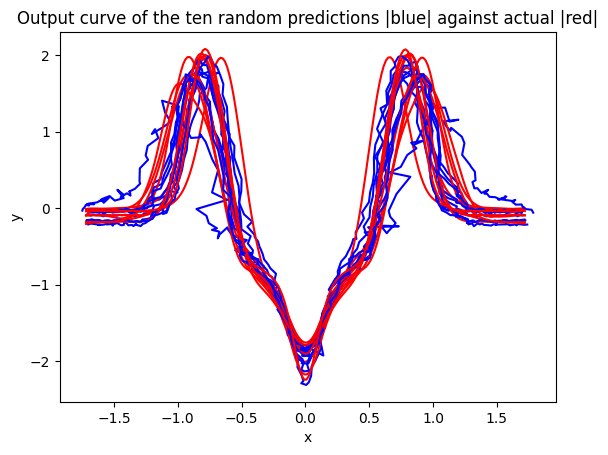

In [45]:
from keras.layers import BatchNormalization

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 7ms/step


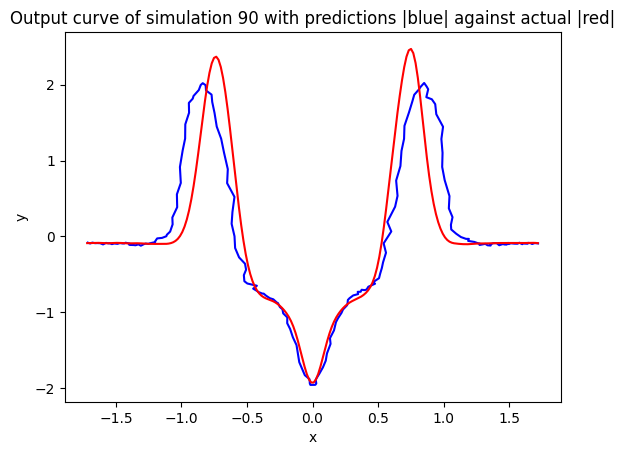

In [64]:
number = 90 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_26 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_14 (Dropout)        (None, 2000)              0         
                                                                 
 batch_normalization_5 (Batc  (None, 2000)             8000      
 hNormalization)                                                 
                                                                 
 dense_27 (Dense)            (None, 500)               1000500   
                                                                 
 batch_normalization_6 (Batc  (None, 500)              2000      
 hNormalization)                                           

7/7 [==============================] - 0s 67ms/step - loss: 1.3489 - val_loss: 1.7972
Epoch 69/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.3059 - val_loss: 1.7023
Epoch 70/1500
7/7 [==============================] - 0s 61ms/step - loss: 1.2678 - val_loss: 1.5988
Epoch 71/1500
7/7 [==============================] - 1s 148ms/step - loss: 1.3495 - val_loss: 1.6725
Epoch 72/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.3200 - val_loss: 1.6641
Epoch 73/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.3013 - val_loss: 1.6116
Epoch 74/1500
7/7 [==============================] - 0s 59ms/step - loss: 1.2609 - val_loss: 1.4516
Epoch 75/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.4224 - val_loss: 1.8941
Epoch 76/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.3330 - val_loss: 1.6413
Epoch 77/1500
7/7 [==============================] - 0s 64ms/step - loss: 1.5728 - val_loss: 2.0107
Epoch 78/1500

7/7 [==============================] - 1s 207ms/step - loss: 1.1442 - val_loss: 1.3192
Epoch 231/1500
7/7 [==============================] - 2s 390ms/step - loss: 1.1844 - val_loss: 1.4168
Epoch 232/1500
7/7 [==============================] - 0s 59ms/step - loss: 1.0762 - val_loss: 1.2694
Epoch 233/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.1178 - val_loss: 1.3922
Epoch 234/1500
7/7 [==============================] - 0s 64ms/step - loss: 1.0950 - val_loss: 1.2300
Epoch 235/1500
7/7 [==============================] - 0s 58ms/step - loss: 1.1109 - val_loss: 1.4119
Epoch 236/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0171 - val_loss: 1.1958
Epoch 237/1500
7/7 [==============================] - 3s 524ms/step - loss: 1.1437 - val_loss: 1.4070
Epoch 238/1500
7/7 [==============================] - 2s 314ms/step - loss: 1.0395 - val_loss: 1.2614
Epoch 239/1500
7/7 [==============================] - 3s 443ms/step - loss: 1.1077 - val_loss: 1.3425


Epoch 311/1500
7/7 [==============================] - 1s 147ms/step - loss: 1.0421 - val_loss: 1.2222
Epoch 312/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0389 - val_loss: 1.2920
Epoch 313/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.9839 - val_loss: 1.1889
Epoch 314/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0544 - val_loss: 1.2687
Epoch 315/1500
7/7 [==============================] - 0s 67ms/step - loss: 1.0467 - val_loss: 1.2398
Epoch 316/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0341 - val_loss: 1.3152
Epoch 317/1500
7/7 [==============================] - 0s 61ms/step - loss: 1.0826 - val_loss: 1.3241
Epoch 318/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.9778 - val_loss: 1.1735
Epoch 319/1500
7/7 [==============================] - 0s 59ms/step - loss: 1.0976 - val_loss: 1.3632
Epoch 320/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.2495 - val_lo

Epoch 392/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.0768 - val_loss: 1.2783
Epoch 393/1500
7/7 [==============================] - 1s 117ms/step - loss: 1.0096 - val_loss: 1.1977
Epoch 394/1500
7/7 [==============================] - 1s 121ms/step - loss: 0.9969 - val_loss: 1.2292
Epoch 395/1500
7/7 [==============================] - 1s 140ms/step - loss: 0.9753 - val_loss: 1.1755
Epoch 396/1500
7/7 [==============================] - 3s 445ms/step - loss: 1.0177 - val_loss: 1.2064
Epoch 397/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.9634 - val_loss: 1.2685
Epoch 398/1500
7/7 [==============================] - 2s 308ms/step - loss: 0.9702 - val_loss: 1.1944
Epoch 399/1500
7/7 [==============================] - 2s 249ms/step - loss: 0.9564 - val_loss: 1.2745
Epoch 400/1500
7/7 [==============================] - 2s 313ms/step - loss: 0.9372 - val_loss: 1.2242
Epoch 401/1500
7/7 [==============================] - 4s 721ms/step - loss: 1.0680 

Epoch 473/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9760 - val_loss: 1.2390
Epoch 474/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9454 - val_loss: 1.1642
Epoch 475/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9378 - val_loss: 1.1769
Epoch 476/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9248 - val_loss: 1.1345
Epoch 477/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9643 - val_loss: 1.1845
Epoch 478/1500
7/7 [==============================] - 0s 60ms/step - loss: 1.0124 - val_loss: 1.1907
Epoch 479/1500
7/7 [==============================] - 0s 63ms/step - loss: 1.0234 - val_loss: 1.1724
Epoch 480/1500
7/7 [==============================] - 0s 57ms/step - loss: 0.9327 - val_loss: 1.1670
Epoch 481/1500
7/7 [==============================] - 1s 222ms/step - loss: 0.9062 - val_loss: 1.1820
Epoch 482/1500
7/7 [==============================] - 1s 140ms/step - loss: 1.0342 - val_l

Epoch 554/1500
7/7 [==============================] - 3s 475ms/step - loss: 0.9689 - val_loss: 1.1646
Epoch 555/1500
7/7 [==============================] - 3s 519ms/step - loss: 0.9371 - val_loss: 1.2216
Epoch 556/1500
7/7 [==============================] - 1s 238ms/step - loss: 0.9297 - val_loss: 1.1605
Epoch 557/1500
7/7 [==============================] - 2s 303ms/step - loss: 0.9829 - val_loss: 1.1686
Epoch 558/1500
7/7 [==============================] - 2s 294ms/step - loss: 0.9716 - val_loss: 1.1984
Epoch 559/1500
7/7 [==============================] - 2s 318ms/step - loss: 0.9552 - val_loss: 1.1753
Epoch 560/1500
7/7 [==============================] - 1s 229ms/step - loss: 0.9231 - val_loss: 1.1223
Epoch 561/1500
7/7 [==============================] - 7s 1s/step - loss: 0.9227 - val_loss: 1.1580
Epoch 562/1500
7/7 [==============================] - 2s 272ms/step - loss: 0.9776 - val_loss: 1.1489
Epoch 563/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9165 - v

Epoch 635/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.8863 - val_loss: 1.1492
Epoch 636/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9338 - val_loss: 1.1307
Epoch 637/1500
7/7 [==============================] - 0s 62ms/step - loss: 1.0150 - val_loss: 1.1659
Epoch 638/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9318 - val_loss: 1.1415
Epoch 639/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9279 - val_loss: 1.1435
Epoch 640/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9246 - val_loss: 1.1689
Epoch 641/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.9451 - val_loss: 1.2374
Epoch 642/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9674 - val_loss: 1.1529
Epoch 643/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.9976 - val_loss: 1.2125
Epoch 644/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9864 - val_lo

Epoch 716/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9816 - val_loss: 1.1148
Epoch 717/1500
7/7 [==============================] - 2s 255ms/step - loss: 0.9047 - val_loss: 1.1037
Epoch 718/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.9690 - val_loss: 1.1003
Epoch 719/1500
7/7 [==============================] - 1s 162ms/step - loss: 0.8606 - val_loss: 1.0870
Epoch 720/1500
7/7 [==============================] - 3s 492ms/step - loss: 0.8511 - val_loss: 1.1144
Epoch 721/1500
7/7 [==============================] - 4s 586ms/step - loss: 0.8836 - val_loss: 1.1023
Epoch 722/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9356 - val_loss: 1.0995
Epoch 723/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.9166 - val_loss: 1.0983
Epoch 724/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.8706 - val_loss: 1.1282
Epoch 725/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.8528 - va

Epoch 797/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.9178 - val_loss: 1.1404
Epoch 798/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.8953 - val_loss: 1.1276
Epoch 799/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.8641 - val_loss: 1.0787
Epoch 800/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.8695 - val_loss: 1.1168
Epoch 801/1500
7/7 [==============================] - 1s 142ms/step - loss: 0.8966 - val_loss: 1.1475
Epoch 802/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9110 - val_loss: 1.0987
Epoch 803/1500
7/7 [==============================] - 0s 66ms/step - loss: 0.8493 - val_loss: 1.1025
Epoch 804/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.8842 - val_loss: 1.1544
Epoch 805/1500
7/7 [==============================] - 0s 62ms/step - loss: 0.9435 - val_loss: 1.1227
Epoch 806/1500
7/7 [==============================] - 0s 61ms/step - loss: 0.9279 - val_lo

7/7 [==============================] - 1s 192ms/step - loss: 0.8647 - val_loss: 1.0989
Epoch 879/1500
7/7 [==============================] - 1s 199ms/step - loss: 0.8407 - val_loss: 1.1083
Epoch 880/1500
7/7 [==============================] - 2s 279ms/step - loss: 0.8859 - val_loss: 1.1841
Epoch 881/1500
7/7 [==============================] - 3s 521ms/step - loss: 0.9231 - val_loss: 1.1964
Epoch 882/1500
7/7 [==============================] - 1s 242ms/step - loss: 0.8930 - val_loss: 1.1585
Epoch 883/1500
7/7 [==============================] - 3s 538ms/step - loss: 0.8645 - val_loss: 1.1166
Epoch 884/1500
7/7 [==============================] - 2s 299ms/step - loss: 0.8417 - val_loss: 1.0983
Epoch 885/1500
7/7 [==============================] - 2s 339ms/step - loss: 0.8892 - val_loss: 1.1012
Epoch 886/1500
7/7 [==============================] - 2s 395ms/step - loss: 0.8199 - val_loss: 1.1048
Epoch 887/1500
7/7 [==============================] - 3s 425ms/step - loss: 0.8965 - val_loss: 1.

7/7 [==============================] - 0s 73ms/step - loss: 0.8354 - val_loss: 1.0610
Epoch 960/1500
7/7 [==============================] - 0s 69ms/step - loss: 0.8045 - val_loss: 1.0692
Epoch 961/1500
7/7 [==============================] - 1s 186ms/step - loss: 0.8099 - val_loss: 1.0849
Epoch 962/1500
7/7 [==============================] - 0s 67ms/step - loss: 0.8425 - val_loss: 1.0846
Epoch 963/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.7990 - val_loss: 1.1167
Epoch 964/1500
7/7 [==============================] - 0s 69ms/step - loss: 0.8474 - val_loss: 1.0689
Epoch 965/1500
7/7 [==============================] - 0s 66ms/step - loss: 0.8442 - val_loss: 1.0869
Epoch 966/1500
7/7 [==============================] - 0s 65ms/step - loss: 0.8280 - val_loss: 1.0759
Epoch 967/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.8143 - val_loss: 1.0521
Epoch 968/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8549 - val_loss: 1.0878
Epoc

7/7 [==============================] - 0s 65ms/step - loss: 0.7468 - val_loss: 1.1984
Epoch 1120/1500
7/7 [==============================] - 0s 64ms/step - loss: 0.8082 - val_loss: 1.1985
Epoch 1121/1500
7/7 [==============================] - 1s 166ms/step - loss: 0.7875 - val_loss: 1.1301
Epoch 1122/1500
7/7 [==============================] - 0s 66ms/step - loss: 0.7721 - val_loss: 1.0778
Epoch 1123/1500
7/7 [==============================] - 0s 75ms/step - loss: 0.7232 - val_loss: 1.0638
Epoch 1124/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.7279 - val_loss: 1.0762
Epoch 1125/1500
7/7 [==============================] - 0s 70ms/step - loss: 0.7770 - val_loss: 1.0723
Epoch 1126/1500
7/7 [==============================] - 0s 68ms/step - loss: 0.7887 - val_loss: 1.0584
Epoch 1127/1500
7/7 [==============================] - 0s 60ms/step - loss: 0.8088 - val_loss: 1.0753
Epoch 1128/1500
7/7 [==============================] - 0s 63ms/step - loss: 0.7716 - val_loss: 1.

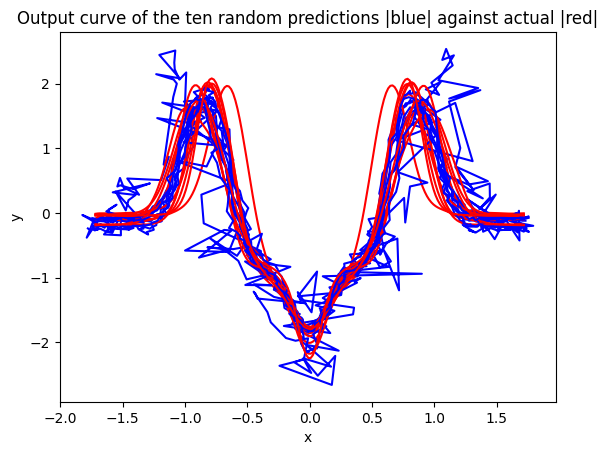

In [65]:
from keras.layers import BatchNormalization

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
#x = layers.Dense(1000, activation="relu")(x)
x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 6ms/step


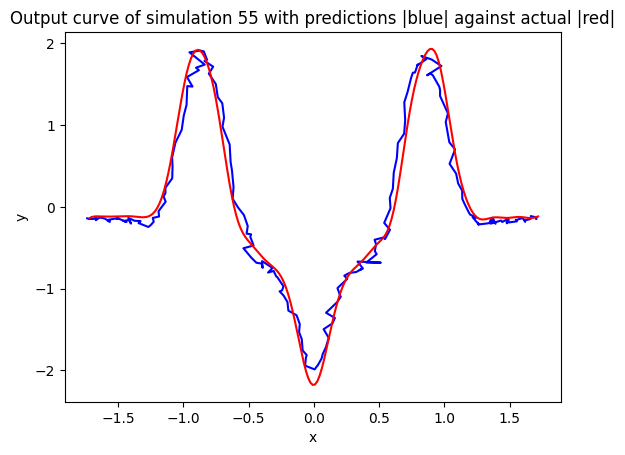

In [70]:
number = 55 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              2002000   
                                                                 
 batch_normalization (BatchN  (None, 2000)             8000      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 2000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              2001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                             

7/7 [==============================] - 3s 488ms/step - loss: 2.7945 - val_loss: 2.8143
Epoch 62/1500
7/7 [==============================] - 1s 107ms/step - loss: 2.7139 - val_loss: 3.0811
Epoch 63/1500
7/7 [==============================] - 2s 261ms/step - loss: 2.5139 - val_loss: 2.7564
Epoch 64/1500
7/7 [==============================] - 1s 172ms/step - loss: 2.5731 - val_loss: 3.0115
Epoch 65/1500
7/7 [==============================] - 1s 107ms/step - loss: 2.6436 - val_loss: 2.9093
Epoch 66/1500
7/7 [==============================] - 1s 106ms/step - loss: 2.5882 - val_loss: 2.7733
Epoch 67/1500
7/7 [==============================] - 1s 228ms/step - loss: 2.6084 - val_loss: 2.6222
Epoch 68/1500
7/7 [==============================] - 1s 109ms/step - loss: 2.5789 - val_loss: 2.6927
Epoch 69/1500
7/7 [==============================] - 1s 171ms/step - loss: 2.6471 - val_loss: 2.6595
Epoch 70/1500
7/7 [==============================] - 1s 217ms/step - loss: 2.6724 - val_loss: 2.7356
Epoc

Epoch 142/1500
7/7 [==============================] - 2s 305ms/step - loss: 2.2870 - val_loss: 2.1346
Epoch 143/1500
7/7 [==============================] - 1s 100ms/step - loss: 2.2174 - val_loss: 2.0810
Epoch 144/1500
7/7 [==============================] - 1s 220ms/step - loss: 2.2381 - val_loss: 2.1231
Epoch 145/1500
7/7 [==============================] - 1s 102ms/step - loss: 2.2152 - val_loss: 2.1213
Epoch 146/1500
7/7 [==============================] - 2s 242ms/step - loss: 2.2416 - val_loss: 2.1419
Epoch 147/1500
7/7 [==============================] - 1s 100ms/step - loss: 2.2666 - val_loss: 2.1462
Epoch 148/1500
7/7 [==============================] - 1s 108ms/step - loss: 2.2708 - val_loss: 2.1005
Epoch 149/1500
7/7 [==============================] - 1s 101ms/step - loss: 2.2289 - val_loss: 2.1069
Epoch 150/1500
7/7 [==============================] - 1s 100ms/step - loss: 2.1806 - val_loss: 2.0464
Epoch 151/1500
7/7 [==============================] - 1s 230ms/step - loss: 2.1560

7/7 [==============================] - 1s 104ms/step - loss: 2.1381 - val_loss: 2.1159
Epoch 223/1500
7/7 [==============================] - 1s 105ms/step - loss: 2.1084 - val_loss: 2.0849
Epoch 224/1500
7/7 [==============================] - 1s 105ms/step - loss: 2.1556 - val_loss: 2.0975
Epoch 225/1500
7/7 [==============================] - 1s 156ms/step - loss: 2.1304 - val_loss: 2.1329
Epoch 226/1500
7/7 [==============================] - 1s 122ms/step - loss: 2.0439 - val_loss: 2.0473
Epoch 227/1500
7/7 [==============================] - 1s 147ms/step - loss: 2.0779 - val_loss: 2.0748
Epoch 228/1500
7/7 [==============================] - 1s 106ms/step - loss: 2.1290 - val_loss: 2.0780
Epoch 229/1500
7/7 [==============================] - 1s 145ms/step - loss: 2.0181 - val_loss: 2.0496
Epoch 230/1500
7/7 [==============================] - 2s 270ms/step - loss: 2.0855 - val_loss: 2.0648
Epoch 231/1500
7/7 [==============================] - 2s 295ms/step - loss: 2.0673 - val_loss: 2.

7/7 [==============================] - 1s 99ms/step - loss: 1.9718 - val_loss: 2.0191
Epoch 303/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.9294 - val_loss: 2.0035
Epoch 304/1500
7/7 [==============================] - 1s 102ms/step - loss: 1.9201 - val_loss: 2.0109
Epoch 305/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.9478 - val_loss: 1.9967
Epoch 306/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.9720 - val_loss: 2.0034
Epoch 307/1500
7/7 [==============================] - 1s 105ms/step - loss: 2.0766 - val_loss: 2.0201
Epoch 308/1500
7/7 [==============================] - 1s 98ms/step - loss: 2.0122 - val_loss: 2.0389
Epoch 309/1500
7/7 [==============================] - 1s 99ms/step - loss: 1.9626 - val_loss: 2.0649
Epoch 310/1500
7/7 [==============================] - 1s 98ms/step - loss: 2.0168 - val_loss: 2.0354
Epoch 311/1500
7/7 [==============================] - 1s 224ms/step - loss: 1.9494 - val_loss: 2.0256
Ep

Epoch 383/1500
7/7 [==============================] - 2s 244ms/step - loss: 1.9726 - val_loss: 2.0312
Epoch 384/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.9375 - val_loss: 2.0355
Epoch 385/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.9523 - val_loss: 2.0181
Epoch 386/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.9308 - val_loss: 2.0086
Epoch 387/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.9240 - val_loss: 2.0060
Epoch 388/1500
7/7 [==============================] - 1s 206ms/step - loss: 1.9901 - val_loss: 2.0038
Epoch 389/1500
7/7 [==============================] - 1s 202ms/step - loss: 1.9450 - val_loss: 2.0275
Epoch 390/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.9902 - val_loss: 2.0020
Epoch 391/1500
7/7 [==============================] - 1s 227ms/step - loss: 1.9614 - val_loss: 2.0142
Epoch 392/1500
7/7 [==============================] - 1s 95ms/step - loss: 2.0496 - val

Epoch 464/1500
7/7 [==============================] - 1s 93ms/step - loss: 1.9138 - val_loss: 2.0396
Epoch 465/1500
7/7 [==============================] - 1s 92ms/step - loss: 1.9022 - val_loss: 2.0473
Epoch 466/1500
7/7 [==============================] - 1s 93ms/step - loss: 1.8812 - val_loss: 2.0145
Epoch 467/1500
7/7 [==============================] - 1s 109ms/step - loss: 1.8516 - val_loss: 2.0200
Epoch 468/1500
7/7 [==============================] - 1s 118ms/step - loss: 1.8489 - val_loss: 1.9830
Epoch 469/1500
7/7 [==============================] - 1s 101ms/step - loss: 1.8492 - val_loss: 1.9817
Epoch 470/1500
7/7 [==============================] - 1s 111ms/step - loss: 1.9429 - val_loss: 1.9845
Epoch 471/1500
7/7 [==============================] - 2s 243ms/step - loss: 1.9227 - val_loss: 2.0241
Epoch 472/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.8577 - val_loss: 2.0386
Epoch 473/1500
7/7 [==============================] - 1s 109ms/step - loss: 1.8667 - 

7/7 [==============================] - 1s 94ms/step - loss: 1.7084 - val_loss: 1.8606
Epoch 545/1500
7/7 [==============================] - 1s 101ms/step - loss: 1.7338 - val_loss: 1.8563
Epoch 546/1500
7/7 [==============================] - 1s 136ms/step - loss: 1.7020 - val_loss: 1.8681
Epoch 547/1500
7/7 [==============================] - 1s 93ms/step - loss: 1.7375 - val_loss: 1.8960
Epoch 548/1500
7/7 [==============================] - 2s 244ms/step - loss: 1.7232 - val_loss: 1.8799
Epoch 549/1500
7/7 [==============================] - 1s 90ms/step - loss: 1.7787 - val_loss: 1.8895
Epoch 550/1500
7/7 [==============================] - 1s 99ms/step - loss: 1.7943 - val_loss: 1.9113
Epoch 551/1500
7/7 [==============================] - 2s 318ms/step - loss: 1.7898 - val_loss: 1.9155
Epoch 552/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.7071 - val_loss: 1.8710
Epoch 553/1500
7/7 [==============================] - 1s 102ms/step - loss: 1.7095 - val_loss: 1.8624


Epoch 625/1500
7/7 [==============================] - 1s 90ms/step - loss: 1.6873 - val_loss: 1.8808
Epoch 626/1500
7/7 [==============================] - 1s 105ms/step - loss: 1.7016 - val_loss: 1.8507
Epoch 627/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.7028 - val_loss: 1.8711
Epoch 628/1500
7/7 [==============================] - 1s 99ms/step - loss: 1.7297 - val_loss: 1.9191
Epoch 629/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.7188 - val_loss: 1.9260
Epoch 630/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.7511 - val_loss: 1.9167
Epoch 631/1500
7/7 [==============================] - 1s 227ms/step - loss: 1.6593 - val_loss: 1.9128
Epoch 632/1500
7/7 [==============================] - 1s 104ms/step - loss: 1.6719 - val_loss: 1.9028
Epoch 633/1500
7/7 [==============================] - 1s 101ms/step - loss: 1.7728 - val_loss: 1.9198
Epoch 634/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.7236 - val

7/7 [==============================] - 1s 103ms/step - loss: 1.7185 - val_loss: 1.9221
Epoch 706/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.7457 - val_loss: 1.9152
Epoch 707/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.7028 - val_loss: 1.8844
Epoch 708/1500
7/7 [==============================] - 1s 147ms/step - loss: 1.7399 - val_loss: 1.8683
Epoch 709/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.6796 - val_loss: 1.9052
Epoch 710/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.7824 - val_loss: 1.9423
Epoch 711/1500
7/7 [==============================] - 1s 225ms/step - loss: 1.7453 - val_loss: 2.0043
Epoch 712/1500
7/7 [==============================] - 1s 102ms/step - loss: 1.8249 - val_loss: 1.9640
Epoch 713/1500
7/7 [==============================] - 1s 99ms/step - loss: 1.7232 - val_loss: 1.9839
Epoch 714/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.8578 - val_loss: 1.9862


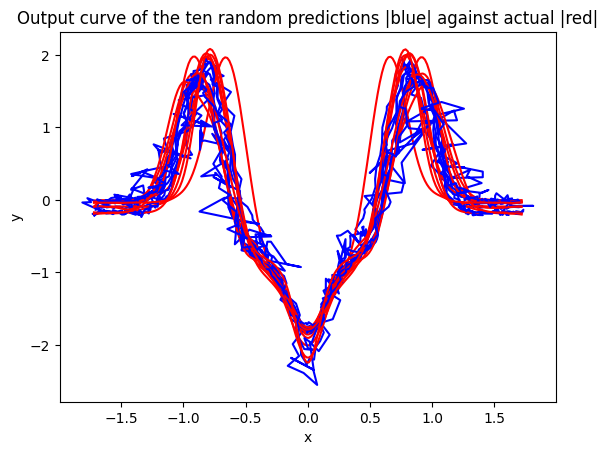

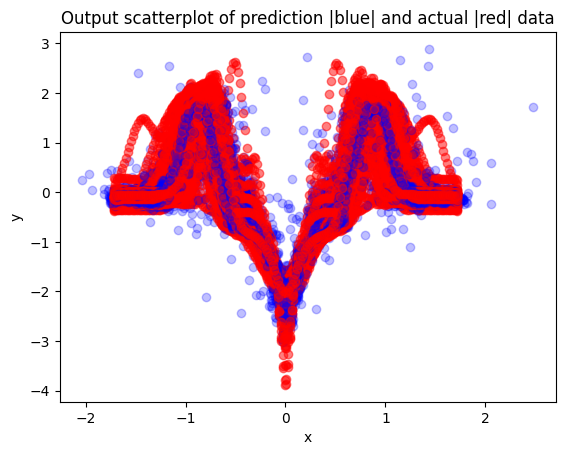

In [16]:
from keras.layers import BatchNormalization

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu",kernel_regularizer=l1(0.00001))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu",kernel_regularizer=l1(0.00001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu", kernel_regularizer=l1(0.00001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 9ms/step


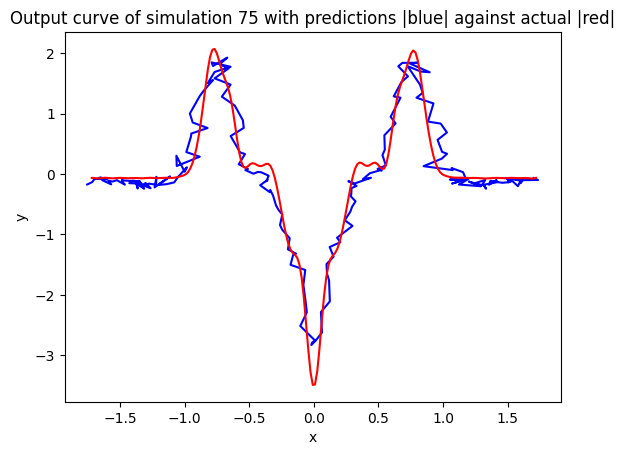

In [22]:
number = 75 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_4 (Dense)             (None, 2000)              2002000   
                                                                 
 dropout_3 (Dropout)         (None, 2000)              0         
                                                                 
 dense_5 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 500)               500500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0   

Epoch 68/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.5146 - val_loss: 1.6813
Epoch 69/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.6576 - val_loss: 1.6931
Epoch 70/1500
7/7 [==============================] - 1s 101ms/step - loss: 1.6188 - val_loss: 1.5886
Epoch 71/1500
7/7 [==============================] - 1s 205ms/step - loss: 1.6362 - val_loss: 1.6406
Epoch 72/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.5333 - val_loss: 1.5785
Epoch 73/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.5174 - val_loss: 1.6648
Epoch 74/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.5542 - val_loss: 1.9483
Epoch 75/1500
7/7 [==============================] - 1s 95ms/step - loss: 2.5372 - val_loss: 2.7462
Epoch 76/1500
7/7 [==============================] - 1s 98ms/step - loss: 2.1180 - val_loss: 1.6896
Epoch 77/1500
7/7 [==============================] - 1s 105ms/step - loss: 2.3720 - val_loss: 3.1

7/7 [==============================] - 1s 104ms/step - loss: 1.6889 - val_loss: 1.4742
Epoch 150/1500
7/7 [==============================] - 1s 98ms/step - loss: 2.0951 - val_loss: 2.3873
Epoch 151/1500
7/7 [==============================] - 1s 216ms/step - loss: 1.6396 - val_loss: 1.4841
Epoch 152/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.4844 - val_loss: 1.7519
Epoch 153/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.5497 - val_loss: 1.5390
Epoch 154/1500
7/7 [==============================] - 1s 105ms/step - loss: 1.5021 - val_loss: 1.5337
Epoch 155/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.6195 - val_loss: 1.4932
Epoch 156/1500
7/7 [==============================] - 1s 101ms/step - loss: 1.6206 - val_loss: 1.8854
Epoch 157/1500
7/7 [==============================] - 1s 99ms/step - loss: 1.4894 - val_loss: 1.5307
Epoch 158/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.4557 - val_loss: 1.7251
E

Epoch 230/1500
7/7 [==============================] - 1s 93ms/step - loss: 1.3426 - val_loss: 1.5558
Epoch 231/1500
7/7 [==============================] - 1s 213ms/step - loss: 1.3410 - val_loss: 1.5868
Epoch 232/1500
7/7 [==============================] - 1s 102ms/step - loss: 1.3384 - val_loss: 1.4925
Epoch 233/1500
7/7 [==============================] - 1s 112ms/step - loss: 1.2415 - val_loss: 1.3926
Epoch 234/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.2777 - val_loss: 1.5151
Epoch 235/1500
7/7 [==============================] - 1s 107ms/step - loss: 1.3057 - val_loss: 1.3980
Epoch 236/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.2809 - val_loss: 1.3918
Epoch 237/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.3507 - val_loss: 1.3921
Epoch 238/1500
7/7 [==============================] - 1s 104ms/step - loss: 1.4233 - val_loss: 1.6755
Epoch 239/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.2962 - va

7/7 [==============================] - 1s 107ms/step - loss: 1.2910 - val_loss: 1.3395
Epoch 311/1500
7/7 [==============================] - 1s 222ms/step - loss: 1.3413 - val_loss: 1.5934
Epoch 312/1500
7/7 [==============================] - 1s 105ms/step - loss: 1.2910 - val_loss: 1.3801
Epoch 313/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.2069 - val_loss: 1.4697
Epoch 314/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.1618 - val_loss: 1.3504
Epoch 315/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.1831 - val_loss: 1.4955
Epoch 316/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.2168 - val_loss: 1.3624
Epoch 317/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.1127 - val_loss: 1.3534
Epoch 318/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.1522 - val_loss: 1.3388
Epoch 319/1500
7/7 [==============================] - 1s 99ms/step - loss: 1.1763 - val_loss: 1.4391

Epoch 391/1500
7/7 [==============================] - 1s 216ms/step - loss: 1.0996 - val_loss: 1.4431
Epoch 392/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.1149 - val_loss: 1.3057
Epoch 393/1500
7/7 [==============================] - 1s 93ms/step - loss: 1.1131 - val_loss: 1.3521
Epoch 394/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.0723 - val_loss: 1.3505
Epoch 395/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.0996 - val_loss: 1.3486
Epoch 396/1500
7/7 [==============================] - 1s 93ms/step - loss: 1.1292 - val_loss: 1.3159
Epoch 397/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.1485 - val_loss: 1.3379
Epoch 398/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.2076 - val_loss: 1.3502
Epoch 399/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.1570 - val_loss: 1.3914
Epoch 400/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.1843 - val_lo

Epoch 472/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.0411 - val_loss: 1.3170
Epoch 473/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.0577 - val_loss: 1.3498
Epoch 474/1500
7/7 [==============================] - 1s 103ms/step - loss: 1.1190 - val_loss: 1.4830
Epoch 475/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.3161 - val_loss: 1.4240
Epoch 476/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.4892 - val_loss: 1.3410
Epoch 477/1500
7/7 [==============================] - 1s 102ms/step - loss: 1.0896 - val_loss: 1.3372
Epoch 478/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.1203 - val_loss: 1.2955
Epoch 479/1500
7/7 [==============================] - 1s 92ms/step - loss: 1.0547 - val_loss: 1.2892
Epoch 480/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.1008 - val_loss: 1.3083
Epoch 481/1500
7/7 [==============================] - 1s 194ms/step - loss: 1.1396 - val

Epoch 553/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.0420 - val_loss: 1.2725
Epoch 554/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.0405 - val_loss: 1.3161
Epoch 555/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.0956 - val_loss: 1.2569
Epoch 556/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.1043 - val_loss: 1.3000
Epoch 557/1500
7/7 [==============================] - 1s 97ms/step - loss: 1.0650 - val_loss: 1.2990
Epoch 558/1500
7/7 [==============================] - 1s 101ms/step - loss: 1.0681 - val_loss: 1.2944
Epoch 559/1500
7/7 [==============================] - 1s 96ms/step - loss: 1.0807 - val_loss: 1.3018
Epoch 560/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.0216 - val_loss: 1.2522
Epoch 561/1500
7/7 [==============================] - 1s 202ms/step - loss: 1.0032 - val_loss: 1.2554
Epoch 562/1500
7/7 [==============================] - 1s 100ms/step - loss: 1.0464 - val_

Epoch 634/1500
7/7 [==============================] - 1s 103ms/step - loss: 0.9275 - val_loss: 1.1922
Epoch 635/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.9665 - val_loss: 1.2165
Epoch 636/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.9382 - val_loss: 1.1936
Epoch 637/1500
7/7 [==============================] - 1s 105ms/step - loss: 0.9618 - val_loss: 1.1972
Epoch 638/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.9600 - val_loss: 1.2504
Epoch 639/1500
7/7 [==============================] - 1s 137ms/step - loss: 0.9599 - val_loss: 1.2350
Epoch 640/1500
7/7 [==============================] - 1s 211ms/step - loss: 0.9295 - val_loss: 1.2500
Epoch 641/1500
7/7 [==============================] - 1s 206ms/step - loss: 0.9567 - val_loss: 1.2573
Epoch 642/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.0141 - val_loss: 1.3050
Epoch 643/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.9358 - va

Epoch 715/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.9771 - val_loss: 1.1766
Epoch 716/1500
7/7 [==============================] - 1s 100ms/step - loss: 0.9689 - val_loss: 1.2065
Epoch 717/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.9276 - val_loss: 1.1893
Epoch 718/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.9336 - val_loss: 1.1763
Epoch 719/1500
7/7 [==============================] - 2s 255ms/step - loss: 0.9012 - val_loss: 1.1948
Epoch 720/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.9742 - val_loss: 1.1894
Epoch 721/1500
7/7 [==============================] - 1s 214ms/step - loss: 1.0686 - val_loss: 1.1739
Epoch 722/1500
7/7 [==============================] - 1s 95ms/step - loss: 1.0157 - val_loss: 1.2002
Epoch 723/1500
7/7 [==============================] - 1s 101ms/step - loss: 1.0418 - val_loss: 1.4863
Epoch 724/1500
7/7 [==============================] - 1s 94ms/step - loss: 1.3617 - val

Epoch 796/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.9023 - val_loss: 1.1978
Epoch 797/1500
7/7 [==============================] - 1s 101ms/step - loss: 0.9194 - val_loss: 1.1888
Epoch 798/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.9416 - val_loss: 1.1978
Epoch 799/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.9135 - val_loss: 1.1816
Epoch 800/1500
7/7 [==============================] - 1s 101ms/step - loss: 0.9120 - val_loss: 1.1998
Epoch 801/1500
7/7 [==============================] - 1s 203ms/step - loss: 0.9419 - val_loss: 1.1896
Epoch 802/1500
7/7 [==============================] - 1s 98ms/step - loss: 0.9096 - val_loss: 1.1782
Epoch 803/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.9283 - val_loss: 1.1777
Epoch 804/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.8949 - val_loss: 1.1700
Epoch 805/1500
7/7 [==============================] - 1s 100ms/step - loss: 0.8928 - val

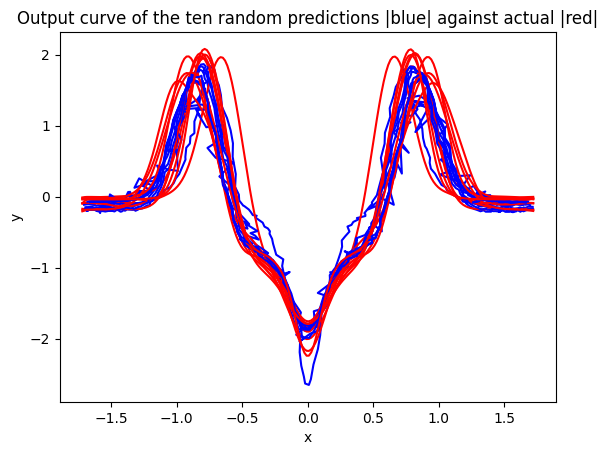

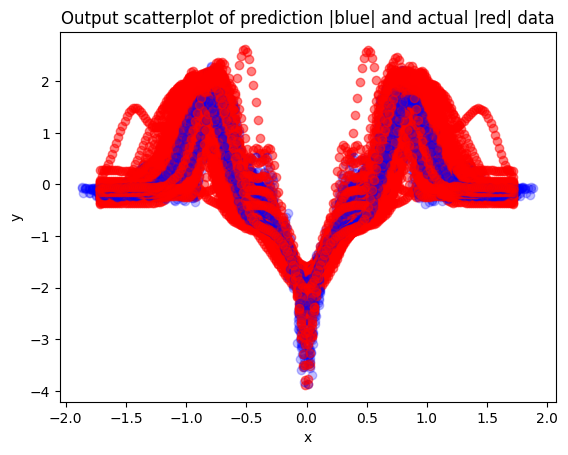

In [23]:
from keras.layers import BatchNormalization

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu",kernel_regularizer=l1(0.00001))(inputs)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu",kernel_regularizer=l1(0.00001))(x)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu", kernel_regularizer=l1(0.00001))(x)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 6ms/step


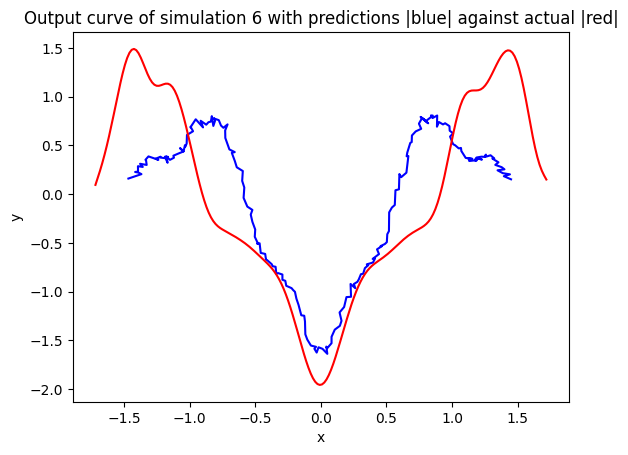

In [27]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_8 (Dense)             (None, 2000)              2002000   
                                                                 
 dropout_6 (Dropout)         (None, 2000)              0         
                                                                 
 dense_9 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_7 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 500)               500500    
                                                                 
 dropout_8 (Dropout)         (None, 500)               0   

7/7 [==============================] - 1s 99ms/step - loss: 1.2965 - val_loss: 1.2861
Epoch 69/1500
7/7 [==============================] - 1s 88ms/step - loss: 1.2950 - val_loss: 1.7963
Epoch 70/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.2776 - val_loss: 1.3721
Epoch 71/1500
7/7 [==============================] - 1s 205ms/step - loss: 1.2754 - val_loss: 1.5547
Epoch 72/1500
7/7 [==============================] - 1s 92ms/step - loss: 1.2011 - val_loss: 1.3893
Epoch 73/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.2877 - val_loss: 1.7656
Epoch 74/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.2564 - val_loss: 1.4816
Epoch 75/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.1222 - val_loss: 1.3654
Epoch 76/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.1201 - val_loss: 1.4873
Epoch 77/1500
7/7 [==============================] - 1s 90ms/step - loss: 1.2000 - val_loss: 1.4520
Epoch 78/1500

7/7 [==============================] - 3s 438ms/step - loss: 1.0138 - val_loss: 1.3908
Epoch 150/1500
7/7 [==============================] - 3s 569ms/step - loss: 1.0446 - val_loss: 1.2099
Epoch 151/1500
7/7 [==============================] - 4s 706ms/step - loss: 1.0239 - val_loss: 1.4380
Epoch 152/1500
7/7 [==============================] - 4s 627ms/step - loss: 1.0998 - val_loss: 1.2003
Epoch 153/1500
7/7 [==============================] - 3s 551ms/step - loss: 1.1032 - val_loss: 1.5460
Epoch 154/1500
7/7 [==============================] - 5s 748ms/step - loss: 1.0270 - val_loss: 1.1980
Epoch 155/1500
7/7 [==============================] - 2s 262ms/step - loss: 1.0043 - val_loss: 1.3298
Epoch 156/1500
7/7 [==============================] - 3s 516ms/step - loss: 0.9970 - val_loss: 1.3066
Epoch 157/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.0430 - val_loss: 1.2459
Epoch 158/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.0359 - val_loss: 1.38

7/7 [==============================] - 1s 78ms/step - loss: 1.0249 - val_loss: 1.1827
Epoch 231/1500
7/7 [==============================] - 1s 195ms/step - loss: 1.0797 - val_loss: 1.3596
Epoch 232/1500
7/7 [==============================] - 2s 242ms/step - loss: 1.0850 - val_loss: 1.2344
Epoch 233/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9695 - val_loss: 1.2112
Epoch 234/1500
7/7 [==============================] - 1s 83ms/step - loss: 1.0801 - val_loss: 1.4290
Epoch 235/1500
7/7 [==============================] - 1s 77ms/step - loss: 1.0243 - val_loss: 1.2707
Epoch 236/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9978 - val_loss: 1.2670
Epoch 237/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9729 - val_loss: 1.2338
Epoch 238/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.0028 - val_loss: 1.2157
Epoch 239/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.9946 - val_loss: 1.2424
Epo

7/7 [==============================] - 3s 496ms/step - loss: 0.8715 - val_loss: 1.1696
Epoch 312/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8711 - val_loss: 1.1594
Epoch 313/1500
7/7 [==============================] - 2s 285ms/step - loss: 0.9082 - val_loss: 1.1919
Epoch 314/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8837 - val_loss: 1.1656
Epoch 315/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.9054 - val_loss: 1.1673
Epoch 316/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9241 - val_loss: 1.1887
Epoch 317/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9717 - val_loss: 1.1832
Epoch 318/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.9835 - val_loss: 1.1987
Epoch 319/1500
7/7 [==============================] - 2s 369ms/step - loss: 0.8900 - val_loss: 1.1429
Epoch 320/1500
7/7 [==============================] - 1s 133ms/step - loss: 0.9070 - val_loss: 1.1355
E

7/7 [==============================] - 1s 86ms/step - loss: 0.9286 - val_loss: 1.1854
Epoch 393/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9121 - val_loss: 1.1722
Epoch 394/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8435 - val_loss: 1.1959
Epoch 395/1500
7/7 [==============================] - 1s 116ms/step - loss: 0.9630 - val_loss: 1.1619
Epoch 396/1500
7/7 [==============================] - 1s 203ms/step - loss: 0.9230 - val_loss: 1.1730
Epoch 397/1500
7/7 [==============================] - 3s 463ms/step - loss: 0.9579 - val_loss: 1.1619
Epoch 398/1500
7/7 [==============================] - 1s 236ms/step - loss: 0.9048 - val_loss: 1.1933
Epoch 399/1500
7/7 [==============================] - 4s 583ms/step - loss: 0.9040 - val_loss: 1.1630
Epoch 400/1500
7/7 [==============================] - 3s 443ms/step - loss: 0.8814 - val_loss: 1.1424
Epoch 401/1500
7/7 [==============================] - 3s 455ms/step - loss: 0.9200 - val_loss: 1.148

Epoch 473/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.8484 - val_loss: 1.1352
Epoch 474/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.8450 - val_loss: 1.1463
Epoch 475/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8668 - val_loss: 1.1750
Epoch 476/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8560 - val_loss: 1.1551
Epoch 477/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9106 - val_loss: 1.1262
Epoch 478/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.8616 - val_loss: 1.1336
Epoch 479/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8351 - val_loss: 1.1399
Epoch 480/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.9129 - val_loss: 1.1436
Epoch 481/1500
7/7 [==============================] - 1s 205ms/step - loss: 0.9079 - val_loss: 1.1621
Epoch 482/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8964 - val_lo

Epoch 554/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8271 - val_loss: 1.1136
Epoch 555/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.8069 - val_loss: 1.1096
Epoch 556/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8248 - val_loss: 1.1012
Epoch 557/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8994 - val_loss: 1.1424
Epoch 558/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8291 - val_loss: 1.1217
Epoch 559/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.8488 - val_loss: 1.1602
Epoch 560/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8695 - val_loss: 1.1543
Epoch 561/1500
7/7 [==============================] - 1s 201ms/step - loss: 0.8962 - val_loss: 1.1555
Epoch 562/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8461 - val_loss: 1.1881
Epoch 563/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9023 - val_lo

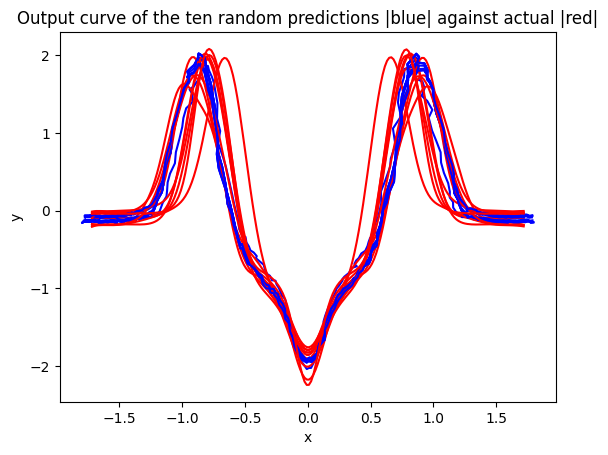

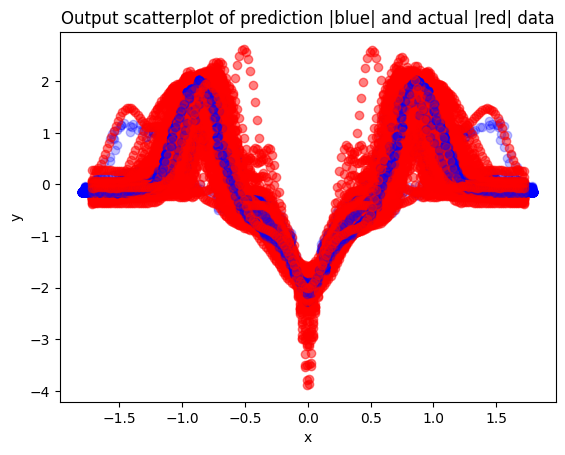

In [28]:
from keras.layers import BatchNormalization

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu",activity_regularizer=l1(0.00001))(inputs)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(1000, activation="relu",activity_regularizer=l1(0.00001))(x)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
x = layers.Dense(500, activation="relu", activity_regularizer=l1(0.00001))(x)
#x = layers.BatchNormalization()(x)
x = layers.Dropout(0.1, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 8ms/step


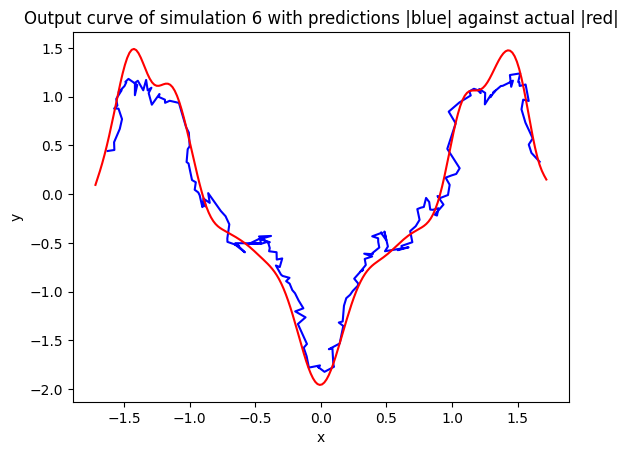

In [33]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_12 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_9 (Dropout)         (None, 2000)              0         
                                                                 
 dense_13 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 dense_14 (Dense)            (None, 500)               500500    
                                                                 
 dropout_11 (Dropout)        (None, 500)               0   

7/7 [==============================] - 1s 231ms/step - loss: 1.4033 - val_loss: 1.2984
Epoch 69/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.1952 - val_loss: 1.3337
Epoch 70/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.1645 - val_loss: 1.2966
Epoch 71/1500
7/7 [==============================] - 1s 201ms/step - loss: 1.0829 - val_loss: 1.2574
Epoch 72/1500
7/7 [==============================] - 1s 81ms/step - loss: 1.3010 - val_loss: 1.2812
Epoch 73/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.2392 - val_loss: 1.5456
Epoch 74/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.4334 - val_loss: 1.3422
Epoch 75/1500
7/7 [==============================] - 1s 84ms/step - loss: 1.5598 - val_loss: 2.1627
Epoch 76/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.3989 - val_loss: 1.3509
Epoch 77/1500
7/7 [==============================] - 1s 83ms/step - loss: 1.3977 - val_loss: 1.2914
Epoch 78/150

7/7 [==============================] - 1s 84ms/step - loss: 1.0975 - val_loss: 1.2094
Epoch 150/1500
7/7 [==============================] - 1s 77ms/step - loss: 1.0530 - val_loss: 1.1924
Epoch 151/1500
7/7 [==============================] - 1s 199ms/step - loss: 1.0430 - val_loss: 1.3285
Epoch 152/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.0144 - val_loss: 1.2007
Epoch 153/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.0483 - val_loss: 1.2917
Epoch 154/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9734 - val_loss: 1.1652
Epoch 155/1500
7/7 [==============================] - 1s 88ms/step - loss: 1.0807 - val_loss: 1.1721
Epoch 156/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.1173 - val_loss: 1.5907
Epoch 157/1500
7/7 [==============================] - 1s 85ms/step - loss: 1.0704 - val_loss: 1.1668
Epoch 158/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.1120 - val_loss: 1.5038
Epoc

Epoch 230/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.9618 - val_loss: 1.1582
Epoch 231/1500
7/7 [==============================] - 1s 220ms/step - loss: 0.9758 - val_loss: 1.3564
Epoch 232/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.9299 - val_loss: 1.1563
Epoch 233/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.9050 - val_loss: 1.2723
Epoch 234/1500
7/7 [==============================] - 1s 100ms/step - loss: 0.9388 - val_loss: 1.1425
Epoch 235/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.9645 - val_loss: 1.3910
Epoch 236/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.9547 - val_loss: 1.1553
Epoch 237/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9183 - val_loss: 1.2589
Epoch 238/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9066 - val_loss: 1.2053
Epoch 239/1500
7/7 [==============================] - 1s 92ms/step - loss: 0.9130 - val_l

7/7 [==============================] - 1s 203ms/step - loss: 0.8378 - val_loss: 1.1762
Epoch 312/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8412 - val_loss: 1.0937
Epoch 313/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8667 - val_loss: 1.1592
Epoch 314/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8454 - val_loss: 1.1955
Epoch 315/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8660 - val_loss: 1.1023
Epoch 316/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8050 - val_loss: 1.1347
Epoch 317/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8275 - val_loss: 1.1122
Epoch 318/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8224 - val_loss: 1.1748
Epoch 319/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8563 - val_loss: 1.1362
Epoch 320/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.9314 - val_loss: 1.3586
Epoc

7/7 [==============================] - 1s 84ms/step - loss: 0.9262 - val_loss: 1.0837
Epoch 393/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.8817 - val_loss: 1.2587
Epoch 394/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8407 - val_loss: 1.0984
Epoch 395/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.8745 - val_loss: 1.1237
Epoch 396/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8156 - val_loss: 1.1268
Epoch 397/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.9390 - val_loss: 1.1328
Epoch 398/1500
7/7 [==============================] - 1s 124ms/step - loss: 0.9692 - val_loss: 1.2286
Epoch 399/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.9725 - val_loss: 1.1749
Epoch 400/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.8959 - val_loss: 1.1745
Epoch 401/1500
7/7 [==============================] - 1s 201ms/step - loss: 0.8588 - val_loss: 1.1168
Epo

7/7 [==============================] - 1s 80ms/step - loss: 0.8141 - val_loss: 1.1050
Epoch 474/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7948 - val_loss: 1.0761
Epoch 475/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8495 - val_loss: 1.1423
Epoch 476/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7808 - val_loss: 1.0800
Epoch 477/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7917 - val_loss: 1.0797
Epoch 478/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8117 - val_loss: 1.1446
Epoch 479/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.8259 - val_loss: 1.1795
Epoch 480/1500
7/7 [==============================] - 2s 342ms/step - loss: 0.8470 - val_loss: 1.0922
Epoch 481/1500
7/7 [==============================] - 4s 589ms/step - loss: 0.8681 - val_loss: 1.2232
Epoch 482/1500
7/7 [==============================] - 2s 358ms/step - loss: 0.8343 - val_loss: 1.1072
Ep

Epoch 554/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.7648 - val_loss: 1.0819
Epoch 555/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7462 - val_loss: 1.0871
Epoch 556/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.7878 - val_loss: 1.0967
Epoch 557/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7557 - val_loss: 1.1038
Epoch 558/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7683 - val_loss: 1.1083
Epoch 559/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.8331 - val_loss: 1.1401
Epoch 560/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7468 - val_loss: 1.1270
Epoch 561/1500
7/7 [==============================] - 1s 200ms/step - loss: 0.8255 - val_loss: 1.1138
Epoch 562/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7712 - val_loss: 1.1201
Epoch 563/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7982 - val_lo

Epoch 635/1500
7/7 [==============================] - 3s 442ms/step - loss: 0.7973 - val_loss: 1.0766
Epoch 636/1500
7/7 [==============================] - 2s 274ms/step - loss: 0.7863 - val_loss: 1.0925
Epoch 637/1500
7/7 [==============================] - 2s 345ms/step - loss: 0.7442 - val_loss: 1.0588
Epoch 638/1500
7/7 [==============================] - 1s 104ms/step - loss: 0.7459 - val_loss: 1.0755
Epoch 639/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.8178 - val_loss: 1.0986
Epoch 640/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7606 - val_loss: 1.0764
Epoch 641/1500
7/7 [==============================] - 1s 230ms/step - loss: 0.8015 - val_loss: 1.0752
Epoch 642/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.7754 - val_loss: 1.0795
Epoch 643/1500
7/7 [==============================] - 1s 98ms/step - loss: 0.8128 - val_loss: 1.1039
Epoch 644/1500
7/7 [==============================] - 1s 92ms/step - loss: 0.8093 - va

Epoch 716/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7136 - val_loss: 1.0920
Epoch 717/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7558 - val_loss: 1.0646
Epoch 718/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7484 - val_loss: 1.0900
Epoch 719/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8134 - val_loss: 1.0675
Epoch 720/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8364 - val_loss: 1.0981
Epoch 721/1500
7/7 [==============================] - 1s 198ms/step - loss: 0.7802 - val_loss: 1.0973
Epoch 722/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7455 - val_loss: 1.0690
Epoch 723/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7615 - val_loss: 1.0815
Epoch 724/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7318 - val_loss: 1.0707
Epoch 725/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7487 - val_lo

Epoch 797/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.7296 - val_loss: 1.0787
Epoch 798/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7577 - val_loss: 1.0736
Epoch 799/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8435 - val_loss: 1.0771
Epoch 800/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7317 - val_loss: 1.0616
Epoch 801/1500
7/7 [==============================] - 1s 197ms/step - loss: 0.7372 - val_loss: 1.0693
Epoch 802/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7564 - val_loss: 1.0652
Epoch 803/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.7499 - val_loss: 1.0800
Epoch 804/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.8040 - val_loss: 1.0855
Epoch 805/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.7611 - val_loss: 1.0672
Epoch 806/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.8030 - val_lo

Epoch 878/1500
7/7 [==============================] - 2s 403ms/step - loss: 0.7251 - val_loss: 1.0375
Epoch 879/1500
7/7 [==============================] - 2s 396ms/step - loss: 0.7362 - val_loss: 1.0420
Epoch 880/1500
7/7 [==============================] - 2s 406ms/step - loss: 0.7625 - val_loss: 1.0594
Epoch 881/1500
7/7 [==============================] - 5s 807ms/step - loss: 0.7441 - val_loss: 1.0592
Epoch 882/1500
7/7 [==============================] - 3s 518ms/step - loss: 0.7284 - val_loss: 1.0570
Epoch 883/1500
7/7 [==============================] - 2s 381ms/step - loss: 0.7459 - val_loss: 1.0583
Epoch 884/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.6998 - val_loss: 1.0313
Epoch 885/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7353 - val_loss: 1.0386
Epoch 886/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7184 - val_loss: 1.0474
Epoch 887/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7527 - v

Epoch 959/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7296 - val_loss: 1.0747
Epoch 960/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.7581 - val_loss: 1.0659
Epoch 961/1500
7/7 [==============================] - 1s 199ms/step - loss: 0.7222 - val_loss: 1.0408
Epoch 962/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.6983 - val_loss: 1.0446
Epoch 963/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7650 - val_loss: 1.0724
Epoch 964/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7883 - val_loss: 1.0702
Epoch 965/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7592 - val_loss: 1.1133
Epoch 966/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.8368 - val_loss: 1.0976
Epoch 967/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7652 - val_loss: 1.1282
Epoch 968/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7888 - val_lo

7/7 [==============================] - 1s 80ms/step - loss: 0.7631 - val_loss: 1.0522
Epoch 1040/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7360 - val_loss: 1.0429
Epoch 1041/1500
7/7 [==============================] - 2s 247ms/step - loss: 0.7626 - val_loss: 1.0361
Epoch 1042/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7344 - val_loss: 1.0536
Epoch 1043/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.7482 - val_loss: 1.0488
Epoch 1044/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7501 - val_loss: 1.0312
Epoch 1045/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.7447 - val_loss: 1.0350
Epoch 1046/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.7171 - val_loss: 1.0450
Epoch 1047/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7592 - val_loss: 1.0981
Epoch 1048/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7754 - val_loss: 1.

7/7 [==============================] - 1s 79ms/step - loss: 0.8146 - val_loss: 1.0910
Epoch 1120/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.7789 - val_loss: 1.0630
Epoch 1121/1500
7/7 [==============================] - 1s 199ms/step - loss: 0.7523 - val_loss: 1.0437
Epoch 1122/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.7601 - val_loss: 1.0608
Epoch 1123/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.7520 - val_loss: 1.0509
Epoch 1124/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8141 - val_loss: 1.0393
Epoch 1125/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.7479 - val_loss: 1.0290
Epoch 1126/1500
7/7 [==============================] - 1s 163ms/step - loss: 0.7289 - val_loss: 1.0280
Epoch 1127/1500
7/7 [==============================] - 1s 158ms/step - loss: 0.7126 - val_loss: 1.0394
Epoch 1128/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.7323 - val_loss: 

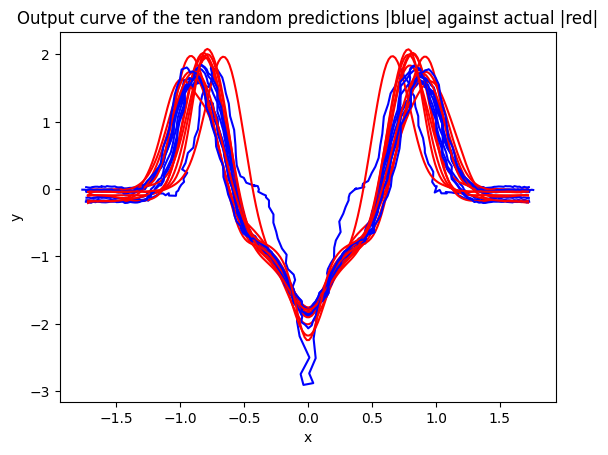

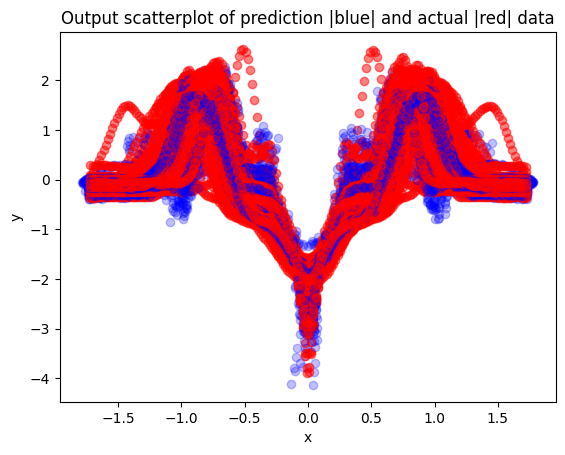

In [34]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.05, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.05, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.05, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 7ms/step


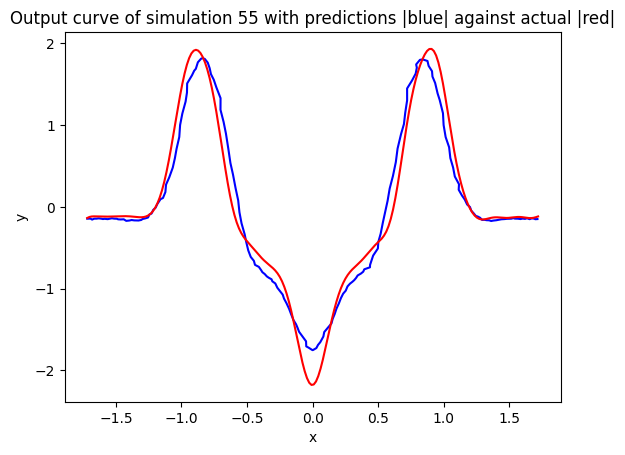

In [37]:
number = 55 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_16 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_12 (Dropout)        (None, 2000)              0         
                                                                 
 dense_17 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_13 (Dropout)        (None, 1000)              0         
                                                                 
 dense_18 (Dense)            (None, 500)               500500    
                                                                 
 dropout_14 (Dropout)        (None, 500)               0   

Epoch 68/1500
7/7 [==============================] - 1s 115ms/step - loss: 1.2943 - val_loss: 1.2565
Epoch 69/1500
7/7 [==============================] - 1s 93ms/step - loss: 1.3251 - val_loss: 1.6884
Epoch 70/1500
7/7 [==============================] - 1s 98ms/step - loss: 1.2524 - val_loss: 1.2892
Epoch 71/1500
7/7 [==============================] - 1s 215ms/step - loss: 1.2200 - val_loss: 1.5525
Epoch 72/1500
7/7 [==============================] - 1s 83ms/step - loss: 1.2674 - val_loss: 1.2728
Epoch 73/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.2658 - val_loss: 1.5669
Epoch 74/1500
7/7 [==============================] - 1s 80ms/step - loss: 1.2593 - val_loss: 1.5468
Epoch 75/1500
7/7 [==============================] - 1s 86ms/step - loss: 1.3906 - val_loss: 1.9522
Epoch 76/1500
7/7 [==============================] - 1s 82ms/step - loss: 1.2824 - val_loss: 1.2538
Epoch 77/1500
7/7 [==============================] - 1s 91ms/step - loss: 1.2375 - val_loss: 1.730

7/7 [==============================] - 1s 166ms/step - loss: 1.1624 - val_loss: 1.9780
Epoch 150/1500
7/7 [==============================] - 2s 257ms/step - loss: 1.4477 - val_loss: 1.6646
Epoch 151/1500
7/7 [==============================] - 3s 511ms/step - loss: 1.2325 - val_loss: 1.1811
Epoch 152/1500
7/7 [==============================] - 2s 370ms/step - loss: 1.1550 - val_loss: 1.5382
Epoch 153/1500
7/7 [==============================] - 2s 314ms/step - loss: 1.5961 - val_loss: 1.2118
Epoch 154/1500
7/7 [==============================] - 1s 128ms/step - loss: 1.3632 - val_loss: 1.8434
Epoch 155/1500
7/7 [==============================] - 3s 442ms/step - loss: 1.3014 - val_loss: 1.2671
Epoch 156/1500
7/7 [==============================] - 3s 427ms/step - loss: 1.2791 - val_loss: 1.9189
Epoch 157/1500
7/7 [==============================] - 1s 220ms/step - loss: 1.3483 - val_loss: 1.3847
Epoch 158/1500
7/7 [==============================] - 3s 464ms/step - loss: 1.3123 - val_loss: 1.

Epoch 230/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.9911 - val_loss: 1.2343
Epoch 231/1500
7/7 [==============================] - 1s 204ms/step - loss: 0.9793 - val_loss: 1.2090
Epoch 232/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9180 - val_loss: 1.1797
Epoch 233/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9253 - val_loss: 1.2758
Epoch 234/1500
7/7 [==============================] - 1s 79ms/step - loss: 1.0496 - val_loss: 1.4221
Epoch 235/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.9526 - val_loss: 1.2064
Epoch 236/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9710 - val_loss: 1.3374
Epoch 237/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.9671 - val_loss: 1.2023
Epoch 238/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.9697 - val_loss: 1.2296
Epoch 239/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.9434 - val_lo

Epoch 311/1500
7/7 [==============================] - 5s 893ms/step - loss: 0.9526 - val_loss: 1.1563
Epoch 312/1500
7/7 [==============================] - 1s 233ms/step - loss: 0.8786 - val_loss: 1.1549
Epoch 313/1500
7/7 [==============================] - 1s 233ms/step - loss: 0.9211 - val_loss: 1.1386
Epoch 314/1500
7/7 [==============================] - 1s 98ms/step - loss: 0.9051 - val_loss: 1.1291
Epoch 315/1500
7/7 [==============================] - 1s 92ms/step - loss: 0.9706 - val_loss: 1.1642
Epoch 316/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8827 - val_loss: 1.1336
Epoch 317/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.9055 - val_loss: 1.1145
Epoch 318/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.9305 - val_loss: 1.1995
Epoch 319/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.8757 - val_loss: 1.1381
Epoch 320/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.9198 - val_

Epoch 392/1500
7/7 [==============================] - 3s 478ms/step - loss: 0.8608 - val_loss: 1.1065
Epoch 393/1500
7/7 [==============================] - 2s 341ms/step - loss: 0.8160 - val_loss: 1.1231
Epoch 394/1500
7/7 [==============================] - 3s 551ms/step - loss: 0.8777 - val_loss: 1.1037
Epoch 395/1500
7/7 [==============================] - 1s 159ms/step - loss: 0.8186 - val_loss: 1.1193
Epoch 396/1500
7/7 [==============================] - 2s 374ms/step - loss: 0.8694 - val_loss: 1.1464
Epoch 397/1500
7/7 [==============================] - 3s 440ms/step - loss: 0.8971 - val_loss: 1.1754
Epoch 398/1500
7/7 [==============================] - 3s 416ms/step - loss: 0.8517 - val_loss: 1.1273
Epoch 399/1500
7/7 [==============================] - 3s 507ms/step - loss: 0.8276 - val_loss: 1.1356
Epoch 400/1500
7/7 [==============================] - 4s 574ms/step - loss: 0.8926 - val_loss: 1.1822
Epoch 401/1500
7/7 [==============================] - 3s 546ms/step - loss: 0.9466

Epoch 473/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8520 - val_loss: 1.1107
Epoch 474/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.8927 - val_loss: 1.0926
Epoch 475/1500
7/7 [==============================] - 1s 103ms/step - loss: 0.9088 - val_loss: 1.1320
Epoch 476/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.9030 - val_loss: 1.1078
Epoch 477/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.9484 - val_loss: 1.1375
Epoch 478/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.8877 - val_loss: 1.1917
Epoch 479/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.8766 - val_loss: 1.1392
Epoch 480/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.8506 - val_loss: 1.1791
Epoch 481/1500
7/7 [==============================] - 1s 224ms/step - loss: 0.8540 - val_loss: 1.1385
Epoch 482/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.8693 - val_l

Epoch 554/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.8542 - val_loss: 1.1153
Epoch 555/1500
7/7 [==============================] - 1s 92ms/step - loss: 0.8816 - val_loss: 1.1022
Epoch 556/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.8355 - val_loss: 1.1362
Epoch 557/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.8270 - val_loss: 1.1203
Epoch 558/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.8413 - val_loss: 1.1408
Epoch 559/1500
7/7 [==============================] - 1s 98ms/step - loss: 0.8655 - val_loss: 1.1760
Epoch 560/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.8499 - val_loss: 1.1316
Epoch 561/1500
7/7 [==============================] - 1s 235ms/step - loss: 0.8252 - val_loss: 1.1393
Epoch 562/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.8750 - val_loss: 1.1254
Epoch 563/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.8113 - val_lo

Epoch 635/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.8276 - val_loss: 1.1426
Epoch 636/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.8236 - val_loss: 1.1289
Epoch 637/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.9061 - val_loss: 1.1664
Epoch 638/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.8839 - val_loss: 1.1369
Epoch 639/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.8250 - val_loss: 1.1333
Epoch 640/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.8579 - val_loss: 1.1209
Epoch 641/1500
7/7 [==============================] - 1s 200ms/step - loss: 0.8407 - val_loss: 1.1271
Epoch 642/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.8601 - val_loss: 1.1663
Epoch 643/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.8865 - val_loss: 1.1760
Epoch 644/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.9450 - val_lo

7/7 [==============================] - 1s 95ms/step - loss: 0.9339 - val_loss: 1.1818
Epoch 717/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.8718 - val_loss: 1.1376
Epoch 718/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.9294 - val_loss: 1.1582
Epoch 719/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8335 - val_loss: 1.1157
Epoch 720/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.8021 - val_loss: 1.1328
Epoch 721/1500
7/7 [==============================] - 1s 190ms/step - loss: 0.8804 - val_loss: 1.1457
Epoch 722/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.9024 - val_loss: 1.1519
Epoch 723/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.8072 - val_loss: 1.1305
Epoch 724/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.8131 - val_loss: 1.1491
Epoch 725/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.8615 - val_loss: 1.1191
Epoc

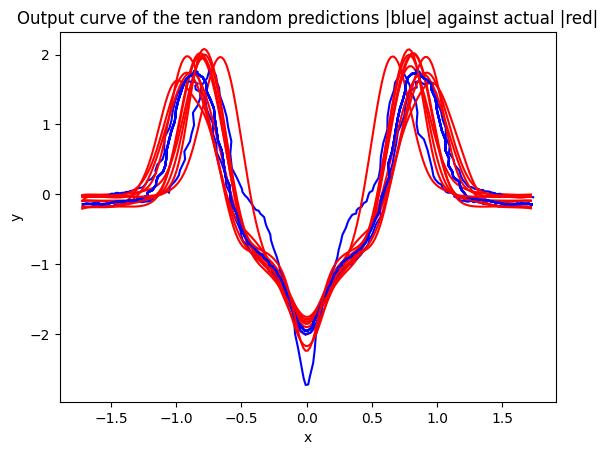

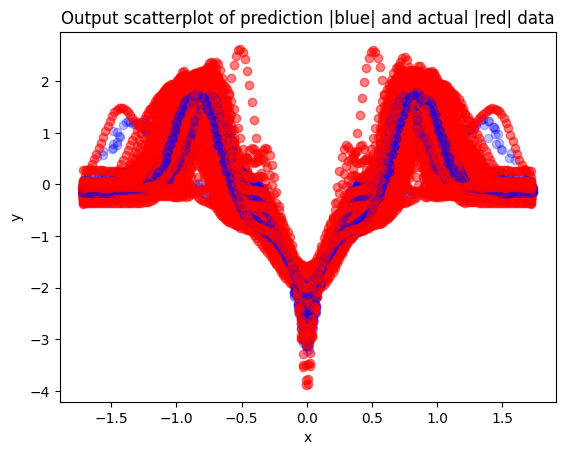

In [38]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.15, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=training_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 8ms/step


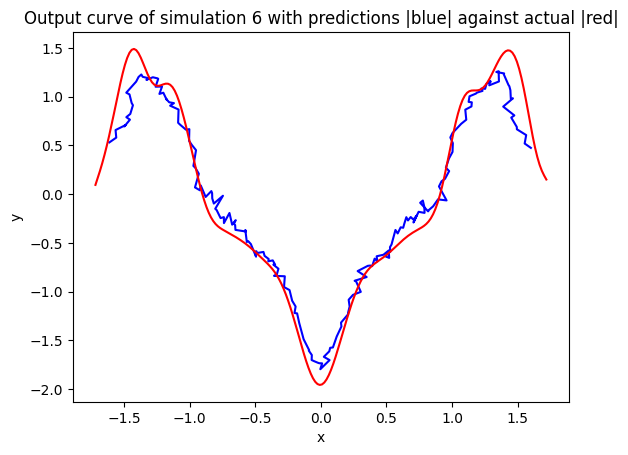

In [42]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_20 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_15 (Dropout)        (None, 2000)              0         
                                                                 
 dense_21 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_16 (Dropout)        (None, 1000)              0         
                                                                 
 dense_22 (Dense)            (None, 500)               500500    
                                                                 
 dropout_17 (Dropout)        (None, 500)               0   

7/7 [==============================] - 1s 89ms/step - loss: 0.0634 - val_loss: 0.0934
Epoch 69/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0616 - val_loss: 0.0916
Epoch 70/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.0616 - val_loss: 0.0897
Epoch 71/1500
7/7 [==============================] - 1s 197ms/step - loss: 0.0606 - val_loss: 0.0884
Epoch 72/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0582 - val_loss: 0.0896
Epoch 73/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0591 - val_loss: 0.0869
Epoch 74/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0599 - val_loss: 0.0883
Epoch 75/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0580 - val_loss: 0.0906
Epoch 76/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0565 - val_loss: 0.0926
Epoch 77/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0605 - val_loss: 0.0903
Epoch 78/1500

7/7 [==============================] - 1s 83ms/step - loss: 0.0493 - val_loss: 0.0797
Epoch 150/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0478 - val_loss: 0.0834
Epoch 151/1500
7/7 [==============================] - 1s 187ms/step - loss: 0.0506 - val_loss: 0.0811
Epoch 152/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0496 - val_loss: 0.0822
Epoch 153/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0484 - val_loss: 0.0773
Epoch 154/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0479 - val_loss: 0.0841
Epoch 155/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0492 - val_loss: 0.0802
Epoch 156/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0490 - val_loss: 0.0837
Epoch 157/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0491 - val_loss: 0.0946
Epoch 158/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0512 - val_loss: 0.0879
Epoc

Epoch 230/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0509 - val_loss: 0.0835
Epoch 231/1500
7/7 [==============================] - 1s 198ms/step - loss: 0.0545 - val_loss: 0.0868
Epoch 232/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0513 - val_loss: 0.0852
Epoch 233/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0489 - val_loss: 0.0867
Epoch 234/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0460 - val_loss: 0.0821
Epoch 235/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0466 - val_loss: 0.0832
Epoch 236/1500
7/7 [==============================] - 1s 122ms/step - loss: 0.0455 - val_loss: 0.0877
Epoch 237/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0459 - val_loss: 0.0828
Epoch 238/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0444 - val_loss: 0.0809
Epoch 239/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0431 - val_l

7/7 [==============================] - 1s 81ms/step - loss: 0.0412 - val_loss: 0.0768
Epoch 311/1500
7/7 [==============================] - 1s 196ms/step - loss: 0.0410 - val_loss: 0.0801
Epoch 312/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0466 - val_loss: 0.0825
Epoch 313/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0455 - val_loss: 0.0816
Epoch 314/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0439 - val_loss: 0.0785
Epoch 315/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0422 - val_loss: 0.0794
Epoch 316/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0396 - val_loss: 0.0776
Epoch 317/1500
7/7 [==============================] - 1s 113ms/step - loss: 0.0377 - val_loss: 0.0770
Epoch 318/1500
7/7 [==============================] - 1s 142ms/step - loss: 0.0401 - val_loss: 0.0759
Epoch 319/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0387 - val_loss: 0.0747
Ep

7/7 [==============================] - 1s 195ms/step - loss: 0.0396 - val_loss: 0.0764
Epoch 392/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0387 - val_loss: 0.0785
Epoch 393/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0371 - val_loss: 0.0803
Epoch 394/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0380 - val_loss: 0.0810
Epoch 395/1500
7/7 [==============================] - 1s 89ms/step - loss: 0.0376 - val_loss: 0.0797
Epoch 396/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0356 - val_loss: 0.0774
Epoch 397/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0351 - val_loss: 0.0783
Epoch 398/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0356 - val_loss: 0.0809
Epoch 399/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0349 - val_loss: 0.0784
Epoch 400/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0339 - val_loss: 0.0752
Epoc

7/7 [==============================] - 1s 87ms/step - loss: 0.0414 - val_loss: 0.0709
Epoch 473/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0369 - val_loss: 0.0766
Epoch 474/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0366 - val_loss: 0.0758
Epoch 475/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0340 - val_loss: 0.0796
Epoch 476/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0351 - val_loss: 0.0800
Epoch 477/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0453 - val_loss: 0.0784
Epoch 478/1500
7/7 [==============================] - 1s 127ms/step - loss: 0.0449 - val_loss: 0.0803
Epoch 479/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.0433 - val_loss: 0.0755
Epoch 480/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0366 - val_loss: 0.0750
Epoch 481/1500
7/7 [==============================] - 1s 195ms/step - loss: 0.0359 - val_loss: 0.0727
Epo

7/7 [==============================] - 1s 81ms/step - loss: 0.0299 - val_loss: 0.0763
Epoch 554/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0294 - val_loss: 0.0716
Epoch 555/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0294 - val_loss: 0.0722
Epoch 556/1500
7/7 [==============================] - 1s 101ms/step - loss: 0.0281 - val_loss: 0.0717
Epoch 557/1500
7/7 [==============================] - 2s 318ms/step - loss: 0.0292 - val_loss: 0.0761
Epoch 558/1500
7/7 [==============================] - 2s 263ms/step - loss: 0.0315 - val_loss: 0.0789
Epoch 559/1500
7/7 [==============================] - 1s 230ms/step - loss: 0.0312 - val_loss: 0.0730
Epoch 560/1500
7/7 [==============================] - 1s 234ms/step - loss: 0.0347 - val_loss: 0.0697
Epoch 561/1500
7/7 [==============================] - 5s 816ms/step - loss: 0.0322 - val_loss: 0.0754
Epoch 562/1500
7/7 [==============================] - 1s 134ms/step - loss: 0.0279 - val_loss: 0.074

Epoch 634/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0337 - val_loss: 0.0807
Epoch 635/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0324 - val_loss: 0.0744
Epoch 636/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0308 - val_loss: 0.0777
Epoch 637/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0298 - val_loss: 0.0776
Epoch 638/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0317 - val_loss: 0.0728
Epoch 639/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0320 - val_loss: 0.0758
Epoch 640/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0303 - val_loss: 0.0792
Epoch 641/1500
7/7 [==============================] - 1s 197ms/step - loss: 0.0285 - val_loss: 0.0735
Epoch 642/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0277 - val_loss: 0.0731
Epoch 643/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0279 - val_lo

Epoch 715/1500
7/7 [==============================] - 1s 163ms/step - loss: 0.0277 - val_loss: 0.0840
Epoch 716/1500
7/7 [==============================] - 2s 287ms/step - loss: 0.0289 - val_loss: 0.0798
Epoch 717/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0264 - val_loss: 0.0790
Epoch 718/1500
7/7 [==============================] - 1s 150ms/step - loss: 0.0309 - val_loss: 0.0792
Epoch 719/1500
7/7 [==============================] - 1s 162ms/step - loss: 0.0259 - val_loss: 0.0800
Epoch 720/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.0269 - val_loss: 0.0831
Epoch 721/1500
7/7 [==============================] - 1s 200ms/step - loss: 0.0280 - val_loss: 0.0782
Epoch 722/1500
7/7 [==============================] - 2s 297ms/step - loss: 0.0283 - val_loss: 0.0805
Epoch 723/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0251 - val_loss: 0.0739
Epoch 724/1500
7/7 [==============================] - 2s 289ms/step - loss: 0.0255 - 

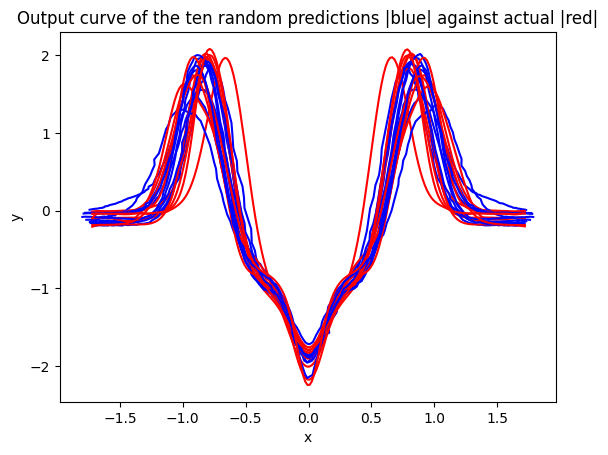

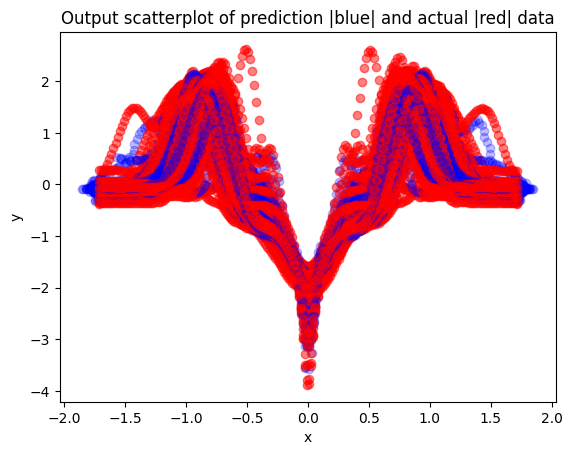

In [43]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 9ms/step


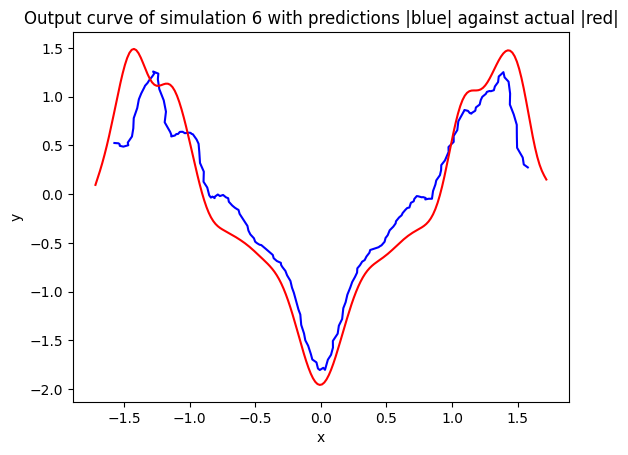

In [52]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_24 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_18 (Dropout)        (None, 2000)              0         
                                                                 
 dense_25 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_19 (Dropout)        (None, 1000)              0         
                                                                 
 dense_26 (Dense)            (None, 500)               500500    
                                                                 
 dropout_20 (Dropout)        (None, 500)               0   

7/7 [==============================] - 1s 79ms/step - loss: 0.1244 - val_loss: 0.1902
Epoch 69/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.1437 - val_loss: 0.1355
Epoch 70/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.1273 - val_loss: 0.1345
Epoch 71/1500
7/7 [==============================] - 1s 190ms/step - loss: 0.1329 - val_loss: 0.1473
Epoch 72/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.1301 - val_loss: 0.1297
Epoch 73/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.1237 - val_loss: 0.1538
Epoch 74/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.1262 - val_loss: 0.1344
Epoch 75/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.1216 - val_loss: 0.1229
Epoch 76/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.1203 - val_loss: 0.1375
Epoch 77/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.1234 - val_loss: 0.1286
Epoch 78/1500

7/7 [==============================] - 1s 79ms/step - loss: 0.0998 - val_loss: 0.1260
Epoch 150/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0992 - val_loss: 0.1137
Epoch 151/1500
7/7 [==============================] - 1s 188ms/step - loss: 0.1001 - val_loss: 0.1142
Epoch 152/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0992 - val_loss: 0.1146
Epoch 153/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0977 - val_loss: 0.1137
Epoch 154/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.1013 - val_loss: 0.1162
Epoch 155/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0999 - val_loss: 0.1129
Epoch 156/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0983 - val_loss: 0.1148
Epoch 157/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.1019 - val_loss: 0.1147
Epoch 158/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0994 - val_loss: 0.1113
Epoc

Epoch 230/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.0926 - val_loss: 0.1070
Epoch 231/1500
7/7 [==============================] - 1s 200ms/step - loss: 0.0979 - val_loss: 0.1067
Epoch 232/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.0966 - val_loss: 0.1081
Epoch 233/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.0997 - val_loss: 0.1088
Epoch 234/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.1006 - val_loss: 0.1097
Epoch 235/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0970 - val_loss: 0.1114
Epoch 236/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0980 - val_loss: 0.1106
Epoch 237/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0969 - val_loss: 0.1083
Epoch 238/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0965 - val_loss: 0.1089
Epoch 239/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0961 - val_lo

Epoch 311/1500
7/7 [==============================] - 3s 562ms/step - loss: 0.0908 - val_loss: 0.1049
Epoch 312/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0929 - val_loss: 0.1027
Epoch 313/1500
7/7 [==============================] - 3s 418ms/step - loss: 0.0887 - val_loss: 0.1068
Epoch 314/1500
7/7 [==============================] - 1s 195ms/step - loss: 0.0897 - val_loss: 0.1073
Epoch 315/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.0879 - val_loss: 0.1015
Epoch 316/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0912 - val_loss: 0.1010
Epoch 317/1500
7/7 [==============================] - 1s 102ms/step - loss: 0.0906 - val_loss: 0.1053
Epoch 318/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0893 - val_loss: 0.1087
Epoch 319/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.0901 - val_loss: 0.1060
Epoch 320/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.0940 - val

Epoch 392/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0874 - val_loss: 0.1015
Epoch 393/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0861 - val_loss: 0.1016
Epoch 394/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0882 - val_loss: 0.1042
Epoch 395/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0870 - val_loss: 0.1076
Epoch 396/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.0856 - val_loss: 0.0988
Epoch 397/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0847 - val_loss: 0.1023
Epoch 398/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0886 - val_loss: 0.1077
Epoch 399/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0861 - val_loss: 0.1037
Epoch 400/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0844 - val_loss: 0.1023
Epoch 401/1500
7/7 [==============================] - 1s 192ms/step - loss: 0.0873 - val_lo

Epoch 473/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0793 - val_loss: 0.0976
Epoch 474/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0852 - val_loss: 0.1018
Epoch 475/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0850 - val_loss: 0.1060
Epoch 476/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0856 - val_loss: 0.1068
Epoch 477/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0853 - val_loss: 0.1034
Epoch 478/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.0841 - val_loss: 0.1031
Epoch 479/1500
7/7 [==============================] - 1s 159ms/step - loss: 0.0855 - val_loss: 0.1023
Epoch 480/1500
7/7 [==============================] - 3s 534ms/step - loss: 0.0836 - val_loss: 0.1049
Epoch 481/1500
7/7 [==============================] - 3s 461ms/step - loss: 0.0850 - val_loss: 0.1014
Epoch 482/1500
7/7 [==============================] - 1s 153ms/step - loss: 0.0830 - val

Epoch 554/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.0789 - val_loss: 0.0997
Epoch 555/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0809 - val_loss: 0.0971
Epoch 556/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0795 - val_loss: 0.0992
Epoch 557/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0783 - val_loss: 0.1041
Epoch 558/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0801 - val_loss: 0.1021
Epoch 559/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0824 - val_loss: 0.1010
Epoch 560/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0861 - val_loss: 0.0951
Epoch 561/1500
7/7 [==============================] - 1s 190ms/step - loss: 0.0841 - val_loss: 0.0976
Epoch 562/1500
7/7 [==============================] - 1s 76ms/step - loss: 0.0829 - val_loss: 0.0957
Epoch 563/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0806 - val_lo

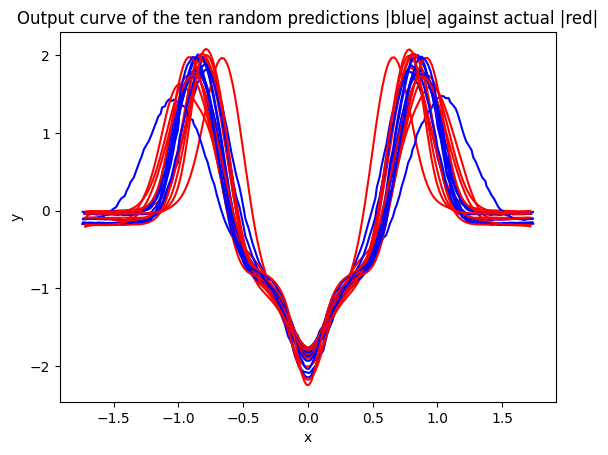

In [53]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 6ms/step


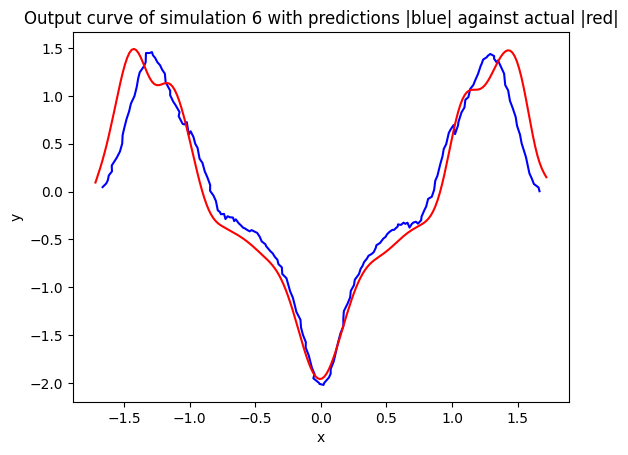

In [60]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_28 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_21 (Dropout)        (None, 2000)              0         
                                                                 
 dense_29 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_22 (Dropout)        (None, 1000)              0         
                                                                 
 dense_30 (Dense)            (None, 500)               500500    
                                                                 
 dropout_23 (Dropout)        (None, 500)               0   

7/7 [==============================] - 1s 86ms/step - loss: 0.0151 - val_loss: 0.0235
Epoch 69/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.0151 - val_loss: 0.0234
Epoch 70/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0145 - val_loss: 0.0227
Epoch 71/1500
7/7 [==============================] - 1s 195ms/step - loss: 0.0144 - val_loss: 0.0234
Epoch 72/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0144 - val_loss: 0.0226
Epoch 73/1500
7/7 [==============================] - 1s 75ms/step - loss: 0.0144 - val_loss: 0.0228
Epoch 74/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0147 - val_loss: 0.0235
Epoch 75/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0147 - val_loss: 0.0256
Epoch 76/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0149 - val_loss: 0.0233
Epoch 77/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0144 - val_loss: 0.0217
Epoch 78/1500

7/7 [==============================] - 1s 77ms/step - loss: 0.0126 - val_loss: 0.0212
Epoch 150/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0133 - val_loss: 0.0208
Epoch 151/1500
7/7 [==============================] - 1s 186ms/step - loss: 0.0133 - val_loss: 0.0214
Epoch 152/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0127 - val_loss: 0.0223
Epoch 153/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0120 - val_loss: 0.0211
Epoch 154/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0121 - val_loss: 0.0201
Epoch 155/1500
7/7 [==============================] - 1s 74ms/step - loss: 0.0122 - val_loss: 0.0204
Epoch 156/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0123 - val_loss: 0.0226
Epoch 157/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0132 - val_loss: 0.0217
Epoch 158/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0124 - val_loss: 0.0211
Epoc

7/7 [==============================] - 1s 86ms/step - loss: 0.0113 - val_loss: 0.0209
Epoch 231/1500
7/7 [==============================] - 1s 212ms/step - loss: 0.0112 - val_loss: 0.0194
Epoch 232/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0111 - val_loss: 0.0204
Epoch 233/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.0108 - val_loss: 0.0202
Epoch 234/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.0110 - val_loss: 0.0216
Epoch 235/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.0106 - val_loss: 0.0206
Epoch 236/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.0102 - val_loss: 0.0218
Epoch 237/1500
7/7 [==============================] - 1s 92ms/step - loss: 0.0116 - val_loss: 0.0219
Epoch 238/1500
7/7 [==============================] - 1s 97ms/step - loss: 0.0118 - val_loss: 0.0210
Epoch 239/1500
7/7 [==============================] - 3s 468ms/step - loss: 0.0112 - val_loss: 0.0204
Epo

7/7 [==============================] - 1s 194ms/step - loss: 0.0102 - val_loss: 0.0219
Epoch 312/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0115 - val_loss: 0.0226
Epoch 313/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0119 - val_loss: 0.0230
Epoch 314/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0119 - val_loss: 0.0229
Epoch 315/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0112 - val_loss: 0.0213
Epoch 316/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0107 - val_loss: 0.0231
Epoch 317/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0116 - val_loss: 0.0230
Epoch 318/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0120 - val_loss: 0.0228
Epoch 319/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0117 - val_loss: 0.0217
Epoch 320/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0110 - val_loss: 0.0216
Epoc

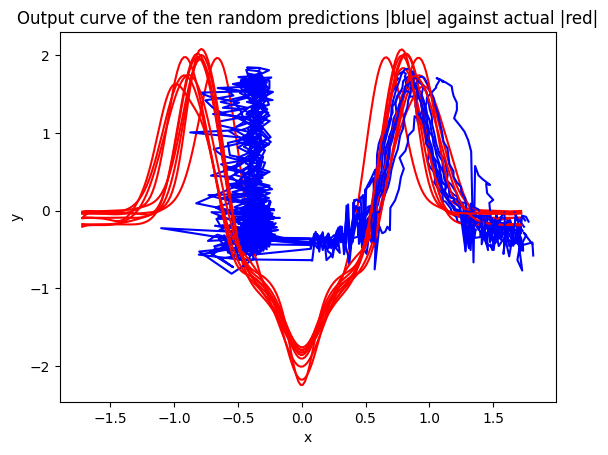

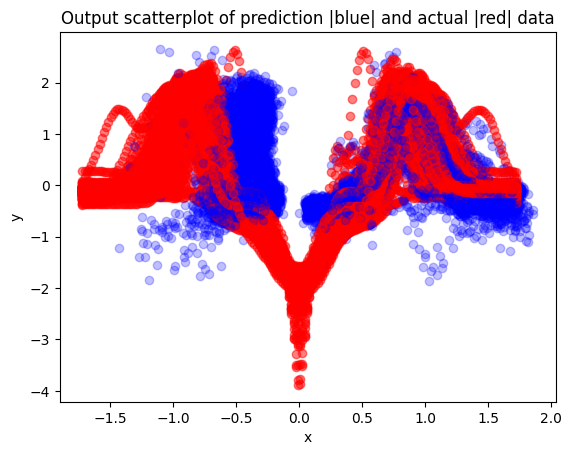

In [61]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

4/4 [==============================] - 0s 9ms/step


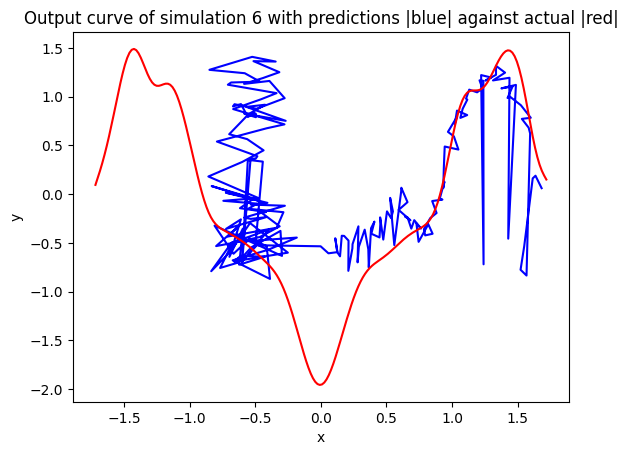

In [62]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_32 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_24 (Dropout)        (None, 2000)              0         
                                                                 
 dense_33 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_25 (Dropout)        (None, 1000)              0         
                                                                 
 dense_34 (Dense)            (None, 500)               500500    
                                                                 
 dropout_26 (Dropout)        (None, 500)               0   

7/7 [==============================] - 1s 80ms/step - loss: 46.2295 - val_loss: 46.7308
Epoch 67/1500
7/7 [==============================] - 1s 85ms/step - loss: 48.5721 - val_loss: 47.6029
Epoch 68/1500
7/7 [==============================] - 1s 77ms/step - loss: 45.6369 - val_loss: 47.9324
Epoch 69/1500
7/7 [==============================] - 1s 84ms/step - loss: 47.6288 - val_loss: 47.5618
Epoch 70/1500
7/7 [==============================] - 1s 79ms/step - loss: 47.5419 - val_loss: 47.4099
Epoch 71/1500
7/7 [==============================] - 1s 199ms/step - loss: 46.4806 - val_loss: 48.2656
Epoch 72/1500
7/7 [==============================] - 1s 79ms/step - loss: 47.2140 - val_loss: 46.9218
Epoch 73/1500
7/7 [==============================] - 1s 86ms/step - loss: 46.3936 - val_loss: 49.0332
Epoch 74/1500
7/7 [==============================] - 1s 80ms/step - loss: 47.0444 - val_loss: 49.2095
Epoch 75/1500
7/7 [==============================] - 1s 84ms/step - loss: 47.3992 - val_loss: 4

Epoch 146/1500
7/7 [==============================] - 1s 85ms/step - loss: 43.8223 - val_loss: 45.9504
Epoch 147/1500
7/7 [==============================] - 1s 79ms/step - loss: 43.8393 - val_loss: 46.1035
Epoch 148/1500
7/7 [==============================] - 1s 79ms/step - loss: 43.8888 - val_loss: 46.5750
Epoch 149/1500
7/7 [==============================] - 1s 82ms/step - loss: 43.9718 - val_loss: 46.7155
Epoch 150/1500
7/7 [==============================] - 1s 86ms/step - loss: 44.4491 - val_loss: 44.7166
Epoch 151/1500
7/7 [==============================] - 1s 200ms/step - loss: 43.8413 - val_loss: 45.0234
Epoch 152/1500
7/7 [==============================] - 1s 84ms/step - loss: 43.1042 - val_loss: 44.9383
Epoch 153/1500
7/7 [==============================] - 1s 77ms/step - loss: 42.8889 - val_loss: 45.7226
Epoch 154/1500
7/7 [==============================] - 1s 83ms/step - loss: 42.8261 - val_loss: 45.0821
Epoch 155/1500
7/7 [==============================] - 1s 79ms/step - los

7/7 [==============================] - 1s 87ms/step - loss: 41.7844 - val_loss: 44.7104
Epoch 226/1500
7/7 [==============================] - 1s 81ms/step - loss: 41.6537 - val_loss: 44.2139
Epoch 227/1500
7/7 [==============================] - 1s 79ms/step - loss: 41.2120 - val_loss: 43.7801
Epoch 228/1500
7/7 [==============================] - 1s 86ms/step - loss: 41.3844 - val_loss: 44.5604
Epoch 229/1500
7/7 [==============================] - 1s 77ms/step - loss: 41.6701 - val_loss: 44.2728
Epoch 230/1500
7/7 [==============================] - 1s 81ms/step - loss: 41.7123 - val_loss: 44.0405
Epoch 231/1500
7/7 [==============================] - 1s 233ms/step - loss: 41.5959 - val_loss: 44.4750
Epoch 232/1500
7/7 [==============================] - 1s 93ms/step - loss: 41.6327 - val_loss: 44.1323
Epoch 233/1500
7/7 [==============================] - 1s 82ms/step - loss: 42.4046 - val_loss: 44.7468
Epoch 234/1500
7/7 [==============================] - 1s 105ms/step - loss: 41.4343 - v

7/7 [==============================] - 1s 97ms/step - loss: 41.7997 - val_loss: 42.4395
Epoch 305/1500
7/7 [==============================] - 1s 141ms/step - loss: 41.2502 - val_loss: 41.5969
Epoch 306/1500
7/7 [==============================] - 1s 92ms/step - loss: 40.9841 - val_loss: 42.0836
Epoch 307/1500
7/7 [==============================] - 1s 98ms/step - loss: 40.5721 - val_loss: 42.6693
Epoch 308/1500
7/7 [==============================] - 1s 87ms/step - loss: 40.5533 - val_loss: 43.3102
Epoch 309/1500
7/7 [==============================] - 1s 84ms/step - loss: 40.7441 - val_loss: 44.6731
Epoch 310/1500
7/7 [==============================] - 1s 92ms/step - loss: 40.7054 - val_loss: 44.4619
Epoch 311/1500
7/7 [==============================] - 1s 197ms/step - loss: 40.7375 - val_loss: 43.5430
Epoch 312/1500
7/7 [==============================] - 1s 140ms/step - loss: 40.0224 - val_loss: 42.6316
Epoch 313/1500
7/7 [==============================] - 1s 78ms/step - loss: 40.1945 - 

7/7 [==============================] - 1s 80ms/step - loss: 39.3400 - val_loss: 42.1059
Epoch 384/1500
7/7 [==============================] - 1s 83ms/step - loss: 39.0578 - val_loss: 43.3591
Epoch 385/1500
7/7 [==============================] - 1s 78ms/step - loss: 39.0992 - val_loss: 42.3781
Epoch 386/1500
7/7 [==============================] - 1s 82ms/step - loss: 39.5534 - val_loss: 41.2860
Epoch 387/1500
7/7 [==============================] - 1s 78ms/step - loss: 39.6241 - val_loss: 42.3140
Epoch 388/1500
7/7 [==============================] - 1s 84ms/step - loss: 39.0330 - val_loss: 42.0587
Epoch 389/1500
7/7 [==============================] - 1s 82ms/step - loss: 39.1426 - val_loss: 42.3986
Epoch 390/1500
7/7 [==============================] - 1s 104ms/step - loss: 39.4305 - val_loss: 43.0799
Epoch 391/1500
7/7 [==============================] - 1s 209ms/step - loss: 39.3774 - val_loss: 43.0875
Epoch 392/1500
7/7 [==============================] - 1s 81ms/step - loss: 39.3035 - v

7/7 [==============================] - 1s 84ms/step - loss: 38.4504 - val_loss: 41.8800
Epoch 463/1500
7/7 [==============================] - 1s 125ms/step - loss: 38.5244 - val_loss: 41.7916
Epoch 464/1500
7/7 [==============================] - 1s 80ms/step - loss: 38.3698 - val_loss: 42.4639
Epoch 465/1500
7/7 [==============================] - 1s 81ms/step - loss: 38.7112 - val_loss: 41.6940
Epoch 466/1500
7/7 [==============================] - 1s 86ms/step - loss: 38.5275 - val_loss: 42.1257
Epoch 467/1500
7/7 [==============================] - 1s 78ms/step - loss: 38.1973 - val_loss: 43.2081
Epoch 468/1500
7/7 [==============================] - 1s 84ms/step - loss: 38.3520 - val_loss: 40.7265
Epoch 469/1500
7/7 [==============================] - 1s 77ms/step - loss: 38.4841 - val_loss: 41.6817
Epoch 470/1500
7/7 [==============================] - 1s 82ms/step - loss: 38.4871 - val_loss: 43.3759
Epoch 471/1500
7/7 [==============================] - 1s 198ms/step - loss: 38.0836 - v

7/7 [==============================] - 1s 196ms/step - loss: 34.1892 - val_loss: 39.2125
Epoch 542/1500
7/7 [==============================] - 1s 83ms/step - loss: 37.2719 - val_loss: 40.3183
Epoch 543/1500
7/7 [==============================] - 1s 82ms/step - loss: 37.6661 - val_loss: 39.3478
Epoch 544/1500
7/7 [==============================] - 1s 82ms/step - loss: 35.8296 - val_loss: 39.6408
Epoch 545/1500
7/7 [==============================] - 1s 78ms/step - loss: 35.4032 - val_loss: 38.4196
Epoch 546/1500
7/7 [==============================] - 1s 87ms/step - loss: 34.7347 - val_loss: 38.4686
Epoch 547/1500
7/7 [==============================] - 1s 171ms/step - loss: 34.0061 - val_loss: 38.8675
Epoch 548/1500
7/7 [==============================] - 2s 381ms/step - loss: 33.8840 - val_loss: 39.0742
Epoch 549/1500
7/7 [==============================] - 2s 371ms/step - loss: 34.7819 - val_loss: 38.8263
Epoch 550/1500
7/7 [==============================] - 3s 436ms/step - loss: 35.3653 

7/7 [==============================] - 1s 85ms/step - loss: 32.4573 - val_loss: 37.8027
Epoch 621/1500
7/7 [==============================] - 1s 199ms/step - loss: 33.1125 - val_loss: 38.0699
Epoch 622/1500
7/7 [==============================] - 1s 84ms/step - loss: 33.0376 - val_loss: 38.1119
Epoch 623/1500
7/7 [==============================] - 1s 79ms/step - loss: 33.1739 - val_loss: 37.7842
Epoch 624/1500
7/7 [==============================] - 1s 85ms/step - loss: 32.0348 - val_loss: 38.1156
Epoch 625/1500
7/7 [==============================] - 1s 79ms/step - loss: 33.0289 - val_loss: 37.3472
Epoch 626/1500
7/7 [==============================] - 1s 127ms/step - loss: 32.6951 - val_loss: 38.2308
Epoch 627/1500
7/7 [==============================] - 1s 79ms/step - loss: 32.6953 - val_loss: 38.9235
Epoch 628/1500
7/7 [==============================] - 1s 81ms/step - loss: 32.9659 - val_loss: 38.5842
Epoch 629/1500
7/7 [==============================] - 1s 79ms/step - loss: 33.3913 - v

7/7 [==============================] - 1s 93ms/step - loss: 32.3081 - val_loss: 36.7334
Epoch 700/1500
7/7 [==============================] - 1s 90ms/step - loss: 32.2577 - val_loss: 37.5334
Epoch 701/1500
7/7 [==============================] - 1s 214ms/step - loss: 33.3879 - val_loss: 37.6186
Epoch 702/1500
7/7 [==============================] - 1s 93ms/step - loss: 33.1745 - val_loss: 37.2966
Epoch 703/1500
7/7 [==============================] - 1s 93ms/step - loss: 32.4440 - val_loss: 37.0536
Epoch 704/1500
7/7 [==============================] - 1s 87ms/step - loss: 32.2821 - val_loss: 36.7965
Epoch 705/1500
7/7 [==============================] - 1s 90ms/step - loss: 33.1931 - val_loss: 37.7803
Epoch 706/1500
7/7 [==============================] - 1s 92ms/step - loss: 32.9445 - val_loss: 37.3998
Epoch 707/1500
7/7 [==============================] - 1s 90ms/step - loss: 32.6840 - val_loss: 36.3331
Epoch 708/1500
7/7 [==============================] - 1s 96ms/step - loss: 33.3880 - va

7/7 [==============================] - 1s 79ms/step - loss: 33.8341 - val_loss: 39.4822
Epoch 779/1500
7/7 [==============================] - 1s 109ms/step - loss: 34.2114 - val_loss: 38.7510
Epoch 780/1500
7/7 [==============================] - 1s 204ms/step - loss: 33.9811 - val_loss: 38.9238
Epoch 781/1500
7/7 [==============================] - 1s 196ms/step - loss: 34.0578 - val_loss: 38.8425
Epoch 782/1500
7/7 [==============================] - 1s 83ms/step - loss: 34.4964 - val_loss: 39.0959
Epoch 783/1500
7/7 [==============================] - 1s 80ms/step - loss: 33.6915 - val_loss: 41.4338
Epoch 784/1500
7/7 [==============================] - 1s 83ms/step - loss: 33.3962 - val_loss: 39.3397
Epoch 785/1500
7/7 [==============================] - 1s 79ms/step - loss: 34.0682 - val_loss: 37.9572
Epoch 786/1500
7/7 [==============================] - 1s 79ms/step - loss: 33.6890 - val_loss: 37.4069
Epoch 787/1500
7/7 [==============================] - 1s 85ms/step - loss: 33.1879 - 

7/7 [==============================] - 1s 82ms/step - loss: 33.1643 - val_loss: 37.8326
Epoch 858/1500
7/7 [==============================] - 1s 118ms/step - loss: 32.8613 - val_loss: 38.9472
Epoch 859/1500
7/7 [==============================] - 1s 216ms/step - loss: 32.6250 - val_loss: 37.3322
Epoch 860/1500
7/7 [==============================] - 1s 91ms/step - loss: 32.8663 - val_loss: 37.7092
Epoch 861/1500
7/7 [==============================] - 1s 221ms/step - loss: 33.3539 - val_loss: 37.3538
Epoch 862/1500
7/7 [==============================] - 1s 92ms/step - loss: 32.8168 - val_loss: 36.5761
Epoch 863/1500
7/7 [==============================] - 1s 80ms/step - loss: 33.4443 - val_loss: 37.3127
Epoch 864/1500
7/7 [==============================] - 1s 84ms/step - loss: 33.3415 - val_loss: 37.2769
Epoch 865/1500
7/7 [==============================] - 1s 83ms/step - loss: 33.2508 - val_loss: 37.4840
Epoch 866/1500
7/7 [==============================] - 1s 87ms/step - loss: 33.1243 - 

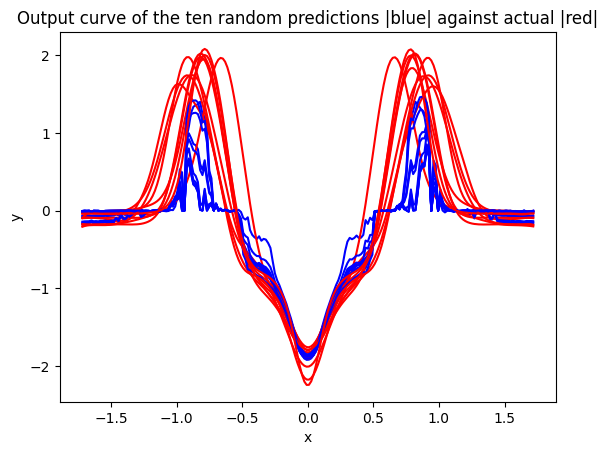

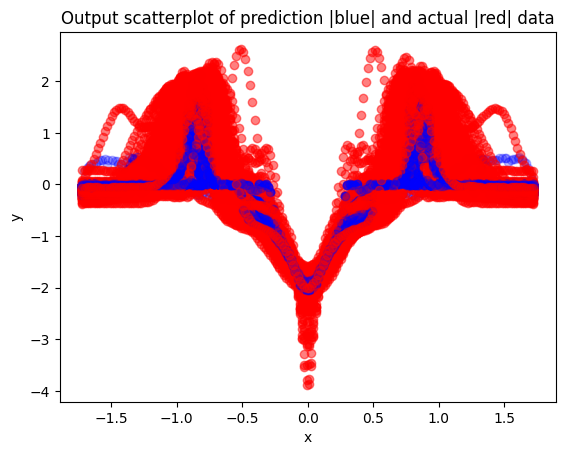

In [63]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

In [64]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

4/4 [==============================] - 0s 8ms/step


In [65]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='huber_loss')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_36 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_27 (Dropout)        (None, 2000)              0         
                                                                 
 dense_37 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_28 (Dropout)        (None, 1000)              0         
                                                                 
 dense_38 (Dense)            (None, 500)               500500    
                                                                 
 dropout_29 (Dropout)        (None, 500)               0   

7/7 [==============================] - 1s 81ms/step - loss: 0.0328 - val_loss: 0.0418
Epoch 69/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0325 - val_loss: 0.0448
Epoch 70/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0311 - val_loss: 0.0508
Epoch 71/1500
7/7 [==============================] - 1s 195ms/step - loss: 0.0330 - val_loss: 0.0405
Epoch 72/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0292 - val_loss: 0.0410
Epoch 73/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0279 - val_loss: 0.0422
Epoch 74/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0283 - val_loss: 0.0430
Epoch 75/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.0294 - val_loss: 0.0425
Epoch 76/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0281 - val_loss: 0.0416
Epoch 77/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0290 - val_loss: 0.0424
Epoch 78/1500

7/7 [==============================] - 1s 79ms/step - loss: 0.0239 - val_loss: 0.0352
Epoch 150/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0237 - val_loss: 0.0367
Epoch 151/1500
7/7 [==============================] - 1s 196ms/step - loss: 0.0233 - val_loss: 0.0362
Epoch 152/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0228 - val_loss: 0.0368
Epoch 153/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0226 - val_loss: 0.0366
Epoch 154/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0221 - val_loss: 0.0345
Epoch 155/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0229 - val_loss: 0.0355
Epoch 156/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0219 - val_loss: 0.0355
Epoch 157/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0235 - val_loss: 0.0355
Epoch 158/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.0223 - val_loss: 0.0375
Epoc

Epoch 230/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.0203 - val_loss: 0.0351
Epoch 231/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.0203 - val_loss: 0.0350
Epoch 232/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.0212 - val_loss: 0.0355
Epoch 233/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.0198 - val_loss: 0.0344
Epoch 234/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0194 - val_loss: 0.0343
Epoch 235/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.0216 - val_loss: 0.0343
Epoch 236/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.0203 - val_loss: 0.0356
Epoch 237/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0205 - val_loss: 0.0389
Epoch 238/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.0207 - val_loss: 0.0354
Epoch 239/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0196 - val_lo

Epoch 311/1500
7/7 [==============================] - 1s 196ms/step - loss: 0.0195 - val_loss: 0.0387
Epoch 312/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0198 - val_loss: 0.0346
Epoch 313/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0185 - val_loss: 0.0344
Epoch 314/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0180 - val_loss: 0.0336
Epoch 315/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0171 - val_loss: 0.0339
Epoch 316/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0194 - val_loss: 0.0355
Epoch 317/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0194 - val_loss: 0.0351
Epoch 318/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0188 - val_loss: 0.0348
Epoch 319/1500
7/7 [==============================] - 1s 115ms/step - loss: 0.0180 - val_loss: 0.0341
Epoch 320/1500
7/7 [==============================] - 1s 200ms/step - loss: 0.0174 - val_

Epoch 392/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.0193 - val_loss: 0.0328
Epoch 393/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.0191 - val_loss: 0.0332
Epoch 394/1500
7/7 [==============================] - 1s 90ms/step - loss: 0.0183 - val_loss: 0.0327
Epoch 395/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0182 - val_loss: 0.0325
Epoch 396/1500
7/7 [==============================] - 1s 94ms/step - loss: 0.0195 - val_loss: 0.0343
Epoch 397/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.0194 - val_loss: 0.0353
Epoch 398/1500
7/7 [==============================] - 1s 95ms/step - loss: 0.0222 - val_loss: 0.0354
Epoch 399/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0176 - val_loss: 0.0356
Epoch 400/1500
7/7 [==============================] - 1s 91ms/step - loss: 0.0174 - val_loss: 0.0335
Epoch 401/1500
7/7 [==============================] - 1s 204ms/step - loss: 0.0161 - val_lo

Epoch 473/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0165 - val_loss: 0.0323
Epoch 474/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0177 - val_loss: 0.0316
Epoch 475/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0157 - val_loss: 0.0327
Epoch 476/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0155 - val_loss: 0.0318
Epoch 477/1500
7/7 [==============================] - 1s 79ms/step - loss: 0.0150 - val_loss: 0.0322
Epoch 478/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0153 - val_loss: 0.0307
Epoch 479/1500
7/7 [==============================] - 1s 80ms/step - loss: 0.0148 - val_loss: 0.0305
Epoch 480/1500
7/7 [==============================] - 1s 86ms/step - loss: 0.0151 - val_loss: 0.0310
Epoch 481/1500
7/7 [==============================] - 1s 202ms/step - loss: 0.0149 - val_loss: 0.0333
Epoch 482/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0149 - val_lo

Epoch 554/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0145 - val_loss: 0.0324
Epoch 555/1500
7/7 [==============================] - 1s 87ms/step - loss: 0.0148 - val_loss: 0.0322
Epoch 556/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.0124 - val_loss: 0.0316
Epoch 557/1500
7/7 [==============================] - 1s 81ms/step - loss: 0.0148 - val_loss: 0.0310
Epoch 558/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0161 - val_loss: 0.0358
Epoch 559/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0161 - val_loss: 0.0350
Epoch 560/1500
7/7 [==============================] - 2s 239ms/step - loss: 0.0170 - val_loss: 0.0327
Epoch 561/1500
7/7 [==============================] - 1s 198ms/step - loss: 0.0169 - val_loss: 0.0320
Epoch 562/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0174 - val_loss: 0.0344
Epoch 563/1500
7/7 [==============================] - 1s 85ms/step - loss: 0.0174 - val_l

Epoch 635/1500
7/7 [==============================] - 2s 322ms/step - loss: 0.0143 - val_loss: 0.0365
Epoch 636/1500
7/7 [==============================] - 2s 354ms/step - loss: 0.0139 - val_loss: 0.0338
Epoch 637/1500
7/7 [==============================] - 1s 189ms/step - loss: 0.0145 - val_loss: 0.0337
Epoch 638/1500
7/7 [==============================] - 2s 240ms/step - loss: 0.0132 - val_loss: 0.0346
Epoch 639/1500
7/7 [==============================] - 3s 537ms/step - loss: 0.0151 - val_loss: 0.0322
Epoch 640/1500
7/7 [==============================] - 1s 231ms/step - loss: 0.0150 - val_loss: 0.0334
Epoch 641/1500
7/7 [==============================] - 1s 210ms/step - loss: 0.0153 - val_loss: 0.0333
Epoch 642/1500
7/7 [==============================] - 1s 101ms/step - loss: 0.0157 - val_loss: 0.0371
Epoch 643/1500
7/7 [==============================] - 1s 96ms/step - loss: 0.0145 - val_loss: 0.0346
Epoch 644/1500
7/7 [==============================] - 1s 93ms/step - loss: 0.0146 -

Epoch 716/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0130 - val_loss: 0.0320
Epoch 717/1500
7/7 [==============================] - 1s 88ms/step - loss: 0.0141 - val_loss: 0.0314
Epoch 718/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0147 - val_loss: 0.0334
Epoch 719/1500
7/7 [==============================] - 1s 83ms/step - loss: 0.0133 - val_loss: 0.0320
Epoch 720/1500
7/7 [==============================] - 1s 78ms/step - loss: 0.0155 - val_loss: 0.0342
Epoch 721/1500
7/7 [==============================] - 1s 194ms/step - loss: 0.0137 - val_loss: 0.0332
Epoch 722/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0146 - val_loss: 0.0307
Epoch 723/1500
7/7 [==============================] - 1s 82ms/step - loss: 0.0144 - val_loss: 0.0336
Epoch 724/1500
7/7 [==============================] - 1s 77ms/step - loss: 0.0155 - val_loss: 0.0327
Epoch 725/1500
7/7 [==============================] - 1s 84ms/step - loss: 0.0128 - val_lo

4/4 [==============================] - 0s 7ms/step


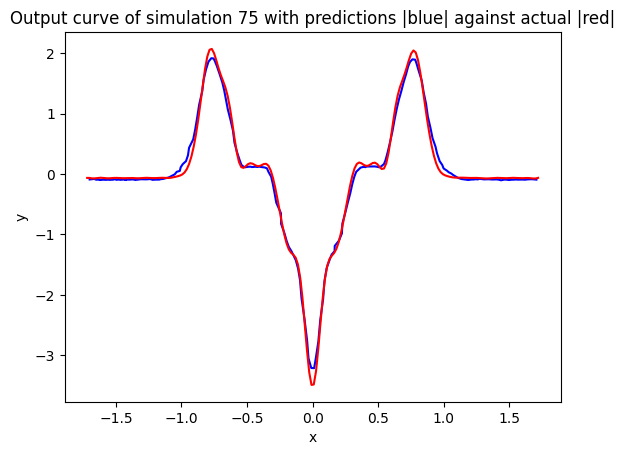

In [67]:
number = 75 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

4/4 [==============================] - 0s 7ms/step


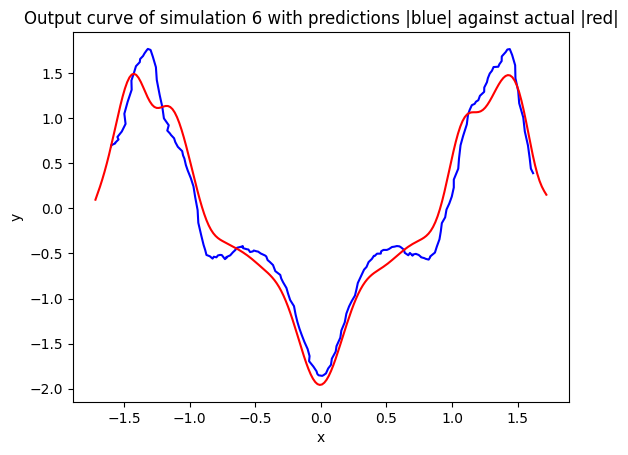

In [72]:
number = 6 # Number six is broken
prediction = model.predict(test_input_values)
length = int(len(prediction[0])/2)
x_1 = prediction[number][0:length]
y_1 = prediction[number][length:]
plt.plot(x_1,y_1,c='b')

x_2 = test_output_values[number][0:length]
y_2 = test_output_values[number][length:]
plt.plot(x_2,y_2,c='r')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Output curve of simulation ' + str(number) + ' with predictions |blue| against actual |red|')
plt.show() 

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_40 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_30 (Dropout)        (None, 2000)              0         
                                                                 
 dense_41 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_31 (Dropout)        (None, 1000)              0         
                                                                 
 dense_42 (Dense)            (None, 500)               500500    
                                                                 
 dropout_32 (Dropout)        (None, 500)               0  

Epoch 67/1500
7/7 [==============================] - 1s 92ms/step - loss: -0.9722 - val_loss: -0.9546
Epoch 68/1500
7/7 [==============================] - 1s 103ms/step - loss: -0.9724 - val_loss: -0.9536
Epoch 69/1500
7/7 [==============================] - 1s 102ms/step - loss: -0.9721 - val_loss: -0.9542
Epoch 70/1500
7/7 [==============================] - 1s 83ms/step - loss: -0.9720 - val_loss: -0.9537
Epoch 71/1500
7/7 [==============================] - 1s 207ms/step - loss: -0.9716 - val_loss: -0.9537
Epoch 72/1500
7/7 [==============================] - 1s 103ms/step - loss: -0.9709 - val_loss: -0.9545
Epoch 73/1500
7/7 [==============================] - 1s 94ms/step - loss: -0.9707 - val_loss: -0.9543
Epoch 74/1500
7/7 [==============================] - 1s 87ms/step - loss: -0.9721 - val_loss: -0.9543
Epoch 75/1500
7/7 [==============================] - 1s 95ms/step - loss: -0.9725 - val_loss: -0.9548
Epoch 76/1500
7/7 [==============================] - 1s 82ms/step - loss: -0.9

7/7 [==============================] - 1s 78ms/step - loss: -0.9754 - val_loss: -0.9536
Epoch 147/1500
7/7 [==============================] - 1s 85ms/step - loss: -0.9754 - val_loss: -0.9536
Epoch 148/1500
7/7 [==============================] - 1s 81ms/step - loss: -0.9751 - val_loss: -0.9542
Epoch 149/1500
7/7 [==============================] - 1s 88ms/step - loss: -0.9748 - val_loss: -0.9554
Epoch 150/1500
7/7 [==============================] - 1s 79ms/step - loss: -0.9757 - val_loss: -0.9543
Epoch 151/1500
7/7 [==============================] - 1s 199ms/step - loss: -0.9762 - val_loss: -0.9548
Epoch 152/1500
7/7 [==============================] - 1s 78ms/step - loss: -0.9759 - val_loss: -0.9563
Epoch 153/1500
7/7 [==============================] - 1s 80ms/step - loss: -0.9756 - val_loss: -0.9564
Epoch 154/1500
7/7 [==============================] - 1s 76ms/step - loss: -0.9759 - val_loss: -0.9558
Epoch 155/1500
7/7 [==============================] - 1s 85ms/step - loss: -0.9770 - va

7/7 [==============================] - 1s 85ms/step - loss: -0.9786 - val_loss: -0.9554
Epoch 226/1500
7/7 [==============================] - 1s 79ms/step - loss: -0.9790 - val_loss: -0.9571
Epoch 227/1500
7/7 [==============================] - 1s 85ms/step - loss: -0.9797 - val_loss: -0.9556
Epoch 228/1500
7/7 [==============================] - 1s 78ms/step - loss: -0.9795 - val_loss: -0.9556
Epoch 229/1500
7/7 [==============================] - 1s 82ms/step - loss: -0.9782 - val_loss: -0.9562
Epoch 230/1500
7/7 [==============================] - 1s 81ms/step - loss: -0.9783 - val_loss: -0.9568
Epoch 231/1500
7/7 [==============================] - 1s 192ms/step - loss: -0.9783 - val_loss: -0.9563
Epoch 232/1500
7/7 [==============================] - 1s 120ms/step - loss: -0.9804 - val_loss: -0.9564
Epoch 233/1500
7/7 [==============================] - 1s 85ms/step - loss: -0.9811 - val_loss: -0.9573
Epoch 234/1500
7/7 [==============================] - 1s 79ms/step - loss: -0.9807 - v

7/7 [==============================] - 1s 92ms/step - loss: -0.9867 - val_loss: -0.9568
Epoch 305/1500
7/7 [==============================] - 1s 83ms/step - loss: -0.9828 - val_loss: -0.9604
Epoch 306/1500
7/7 [==============================] - 1s 84ms/step - loss: -0.9842 - val_loss: -0.9590
Epoch 307/1500
7/7 [==============================] - 1s 96ms/step - loss: -0.9840 - val_loss: -0.9592
Epoch 308/1500
7/7 [==============================] - 1s 89ms/step - loss: -0.9854 - val_loss: -0.9590
Epoch 309/1500
7/7 [==============================] - 1s 88ms/step - loss: -0.9852 - val_loss: -0.9590
Epoch 310/1500
7/7 [==============================] - 1s 83ms/step - loss: -0.9860 - val_loss: -0.9577
Epoch 311/1500
7/7 [==============================] - 1s 204ms/step - loss: -0.9863 - val_loss: -0.9576
Epoch 312/1500
7/7 [==============================] - 1s 87ms/step - loss: -0.9862 - val_loss: -0.9563
Epoch 313/1500
7/7 [==============================] - 1s 86ms/step - loss: -0.9854 - va

7/7 [==============================] - 1s 89ms/step - loss: -0.9856 - val_loss: -0.9579
Epoch 384/1500
7/7 [==============================] - 1s 115ms/step - loss: -0.9852 - val_loss: -0.9601
Epoch 385/1500
7/7 [==============================] - 1s 84ms/step - loss: -0.9842 - val_loss: -0.9575
Epoch 386/1500
7/7 [==============================] - 1s 95ms/step - loss: -0.9849 - val_loss: -0.9584
Epoch 387/1500
7/7 [==============================] - 1s 99ms/step - loss: -0.9861 - val_loss: -0.9581
Epoch 388/1500
7/7 [==============================] - 1s 91ms/step - loss: -0.9855 - val_loss: -0.9580
Epoch 389/1500
7/7 [==============================] - 1s 101ms/step - loss: -0.9873 - val_loss: -0.9573
Epoch 390/1500
7/7 [==============================] - 1s 92ms/step - loss: -0.9881 - val_loss: -0.9566
Epoch 391/1500
7/7 [==============================] - 1s 227ms/step - loss: -0.9879 - val_loss: -0.9566
Epoch 392/1500
7/7 [==============================] - 1s 87ms/step - loss: -0.9875 - 

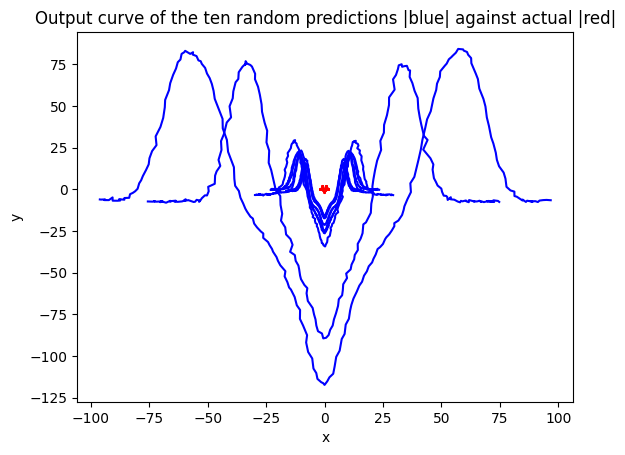

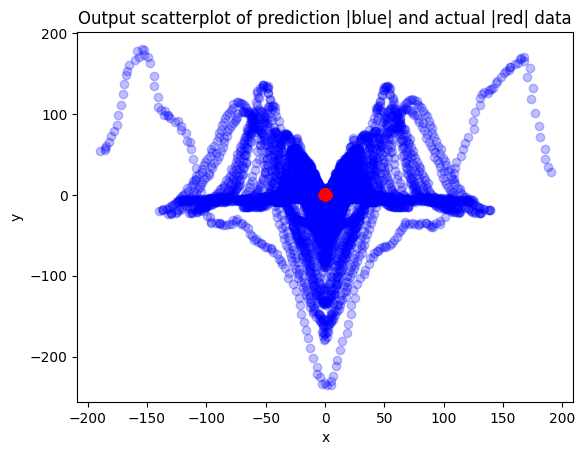

In [73]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='cosine_similarity')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))

In [ ]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dropout(0.10, seed=42)(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='cosine_similarity')
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=150),
             TensorBoard(log_dir='model_3_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
plots(test_output_values,model.predict(test_input_values))